In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import datetime

In [2]:
def EITNoMotion_ss(Omega_p, Omega_c, Delta0, Delta1, Delta2, gammaSP, tlist = np.linspace(0,10,100)):
     #Hamiltonian
    Hhalf = Omega_p*basis(3,1)*basis(3,0).dag() + Omega_c*basis(3,2)*basis(3,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(3,0)*basis(3,0).dag() \
        + Delta1*basis(3,1)*basis(3,1).dag() \
        + Delta2*basis(3,2)*basis(3,2).dag() 
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*basis(3,1)*basis(3,0).dag(), np.sqrt(gammaSP)*basis(3,1)*basis(3,2).dag()]
    rho_ss = steadystate(H, c_ops, method='svd')

    return rho_ss

def EITNoMotion_time(Omega_p, Omega_c, Delta0, Delta1, Delta2, gammaSP, tlist = np.linspace(0,10,100)):
     #Hamiltonian
    Hhalf = Omega_p*basis(3,1)*basis(3,0).dag() + Omega_c*basis(3,2)*basis(3,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(3,0)*basis(3,0).dag() \
        + Delta1*basis(3,1)*basis(3,1).dag() \
        + Delta2*basis(3,2)*basis(3,2).dag() 
    
    #solve the time evolution
    c_ops = [np.sqrt(gammaSP)*basis(3,1)*basis(3,0).dag(), np.sqrt(gammaSP)*basis(3,1)*basis(3,2).dag()]
    
    s_init = basis(3,1)
    e_ops = [basis(3,0)*basis(3,0).dag(), basis(3,1)*basis(3,1).dag(), basis(3,2)*basis(3,2).dag()]
    state = mesolve(H, s_init, tlist, c_ops = c_ops, e_ops = e_ops)
    return state

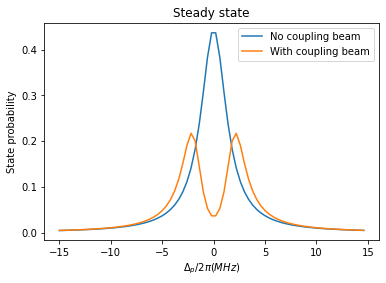

In [3]:
gammaSP = 1 #Linewith
Omega_p = 1 # Rabi frequency
Omega_cs = [0, 2]
Delta0 = 0
Delta1 = 0
Delta2 = 0

label = ['No coupling beam', 'With coupling beam']
cnt = 0
for Omega_c in Omega_cs:
    DeltaList = np.arange(-15,15,0.4)
    ExcitedStatePopulation = [expect(basis(3,0)*basis(3,0).dag(),EITNoMotion_ss(Omega_p, Omega_c, Delta0, Delta, Delta2, gammaSP)) for Delta in DeltaList]

    plt.plot(DeltaList, ExcitedStatePopulation, label=label[cnt])
    cnt+=1
    
plt.legend()
plt.xlabel('$\Delta_p/2\pi (MHz)$')
plt.ylabel('State probability')
plt.title('Steady state');

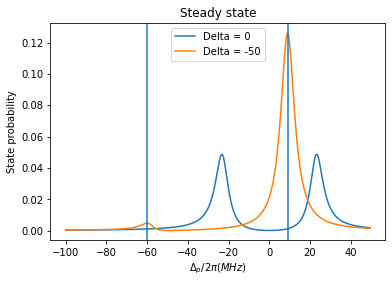

In [5]:
gammaSP = 7 #Linewith
Omega_p = 1.7 # Rabi frequency
Omega_c = 23
Delta0 = 0
Delta1 = 0
Delta2s = [0,-50]

cnt = 0
for Delta2 in Delta2s:
    DeltaList = np.arange(-100,50,0.5)
    ExcitedStatePopulation = [expect(basis(3,0)*basis(3,0).dag(),EITNoMotion_ss(Omega_p, Omega_c, Delta0, Delta, Delta2, gammaSP)) for Delta in DeltaList]

    label = 'Delta = '+str(Delta2)
    plt.plot(DeltaList, ExcitedStatePopulation, label=label)
    cnt+=1
plt.axvline(x = -60)
plt.axvline(x = 9)
plt.legend()
plt.xlabel('$\Delta_p/2\pi (MHz)$')
plt.ylabel('State probability')
plt.title('Steady state');

### Time evolution 

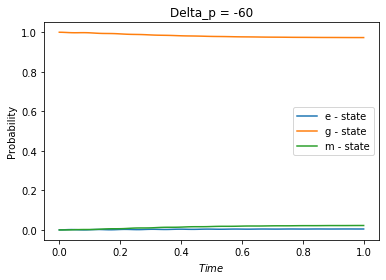

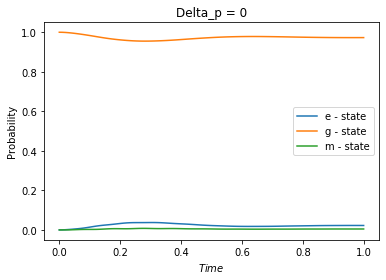

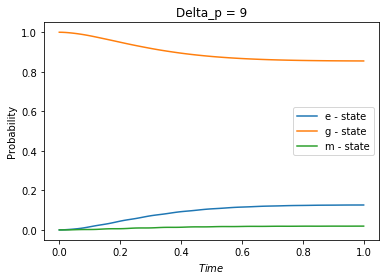

In [35]:
gammaSP = 7 #Linewith
Omega_p = 1.7 # Rabi frequency
Omega_c = 23
Delta0 = 0
Delta1s = [-60, 0, 9]
Delta2 = -50

for Delta1 in Delta1s:
    tlist = np.linspace(0,1,100)
    states = EITNoMotion_time(Omega_p, Omega_c, Delta0, Delta1, Delta2, gammaSP, tlist)
    plt.figure()
    plt.plot(tlist, states.expect[0], label = 'e - state')
    plt.plot(tlist, states.expect[1], label = 'g - state')
    plt.plot(tlist, states.expect[2], label = 'm - state')
    plt.xlabel('$Time$')
    plt.ylabel('Probability')
    plt.title('Delta_p = '+str(Delta1))
    plt.legend()

## Double EIT

In [8]:
def DoubleEITNoMotion_ss(Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta3, gammaSP):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()\
            - OmegaPi*basis(4,2)*basis(4,0).dag()\
            + Omega_Plus*basis(4,3)*basis(4,0).dag()
    H0 = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() \
        + Delta1*basis(4,1)*basis(4,1).dag() \
        + Delta2*basis(4,2)*basis(4,2).dag() \
        + Delta3*basis(4,3)*basis(4,3).dag() 
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]

    rho_ss = steadystate(H0, c_ops, method='svd')
    return rho_ss

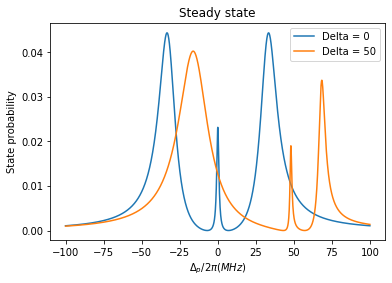

In [9]:
gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta2s = [0, 50]

cnt = 0
for Delta_d in Delta2s:
    Delta_Minus = Delta_d-Zeeman # Delta_d is pumping beam detuning
    Delta_Plus = Delta_d+Zeeman
    DeltaList = np.arange(-100,100,0.1)
    ExcitedStatePopulation = [expect(basis(4,0)*basis(4,0).dag(),
        DoubleEITNoMotion_ss(Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta_Minus, Delta, Delta_Plus, gammaSP)) 
                              for Delta in DeltaList]
    label = 'Delta = '+str(Delta_d)
    plt.plot(DeltaList, ExcitedStatePopulation , label=label)
    cnt+=1
plt.legend()
plt.xlabel('$\Delta_p/2\pi (MHz)$')
plt.ylabel('State probability')
plt.title('Steady state');

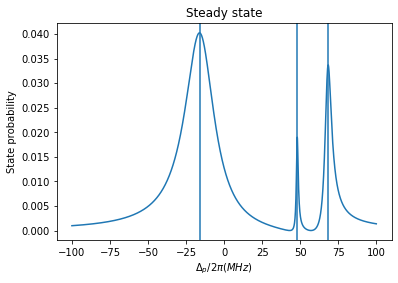

In [10]:
plt.plot(DeltaList, ExcitedStatePopulation)
plt.axvline(x = -16)
plt.axvline(x = 48)
plt.axvline(x = 68)
plt.xlabel('$\Delta_p/2\pi (MHz)$')
plt.ylabel('State probability')
plt.title('Steady state');

In [11]:
### The steady_state of the cryo case is exactly the same as normal, since the time evolution part is not allowed 
### in the steadystate function.
def DoubleEITNoMotion_cryo_steadystate(Omega_Plus, OmegaPi, Omega_Minus, 
                                       Delta0, Delta1, Delta2, Delta_3, gammaSP):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()- OmegaPi*basis(4,2)*basis(4,0).dag()+Omega_Plus*basis(4,3)*basis(4,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() + Delta1*basis(4,1)*basis(4,1).dag() \
        + Delta2*basis(4,2)*basis(4,2).dag()+ Delta_3*basis(4,3)*basis(4,3).dag() 
    
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]

    rho_ss = steadystate(H, c_ops, method='svd')
    return rho_ss

In [72]:
gammaSP = 7 #Linewith
Omega_Plus = 2*gammaSP # Rabi frequency
Omega_Minus = 2*gammaSP

OmegaPi = 0.1*Omega_Plus

Delta_c = 50 # coupling beam detuning
Zeeman = 7 # Zeeman shift
Delta_Minus = Delta_c+Zeeman
Delta_Plus = Delta_c-Zeeman

DeltaList = np.arange(-50,80,0.2)

StatePopulation_e = []
for Delta in DeltaList:
    rho_ss = DoubleEITNoMotion_cryo_steadystate(Omega_Plus, OmegaPi, Omega_Minus, 
                                        Delta0, Delta_Minus, Delta, Delta_Plus, gammaSP)
    StatePopulation_e.append(rho_ss.full()[0,0])

In [68]:
rho_ss

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 4.40546795e-03+0.j          3.16908115e-04-0.0006704j
  -3.58765162e-02+0.00907008j  8.49833554e-03-0.0006704j ]
 [ 3.16908115e-04+0.0006704j   1.62409023e-02+0.j
  -3.64876606e-02+0.00928104j -1.34409165e-02+0.00220273j]
 [-3.58765162e-02-0.00907008j -3.64876606e-02-0.00928104j
   9.46950222e-01+0.j         -2.21506203e-02-0.00573092j]
 [ 8.49833554e-03+0.0006704j  -1.34409165e-02-0.00220273j
  -2.21506203e-02+0.00573092j  3.24034081e-02+0.j        ]]

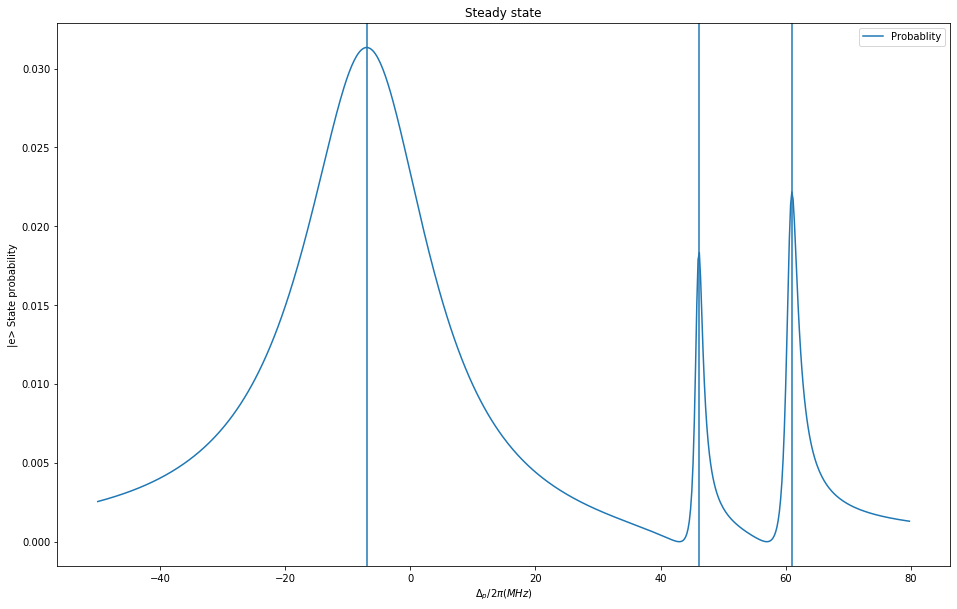

In [80]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.plot(DeltaList, StatePopulation_e, label="Probablity")
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('|e> State probability')
ax.set_title('Steady state')
ax.axvline(x = 46.1)
ax.axvline(x = 61)
ax.axvline(x = -7)

In [81]:
gammaSP = 7 #Linewith
Omega_Plus = 2*gammaSP # Rabi frequency
Omega_Minus = 2*gammaSP

OmegaPi = 0.1*Omega_Plus

Delta_c = 200 # coupling beam detuning
Zeeman = 7 # Zeeman shift
Delta_Minus = Delta_c+Zeeman
Delta_Plus = Delta_c-Zeeman

DeltaList = np.arange(-50,220,0.2)

StatePopulation_e = []
for Delta in DeltaList:
    rho_ss = DoubleEITNoMotion_cryo_steadystate(Omega_Plus, OmegaPi, Omega_Minus, 
                                        Delta0, Delta_Minus, Delta, Delta_Plus, gammaSP)
    StatePopulation_e.append(rho_ss.full()[0,0])

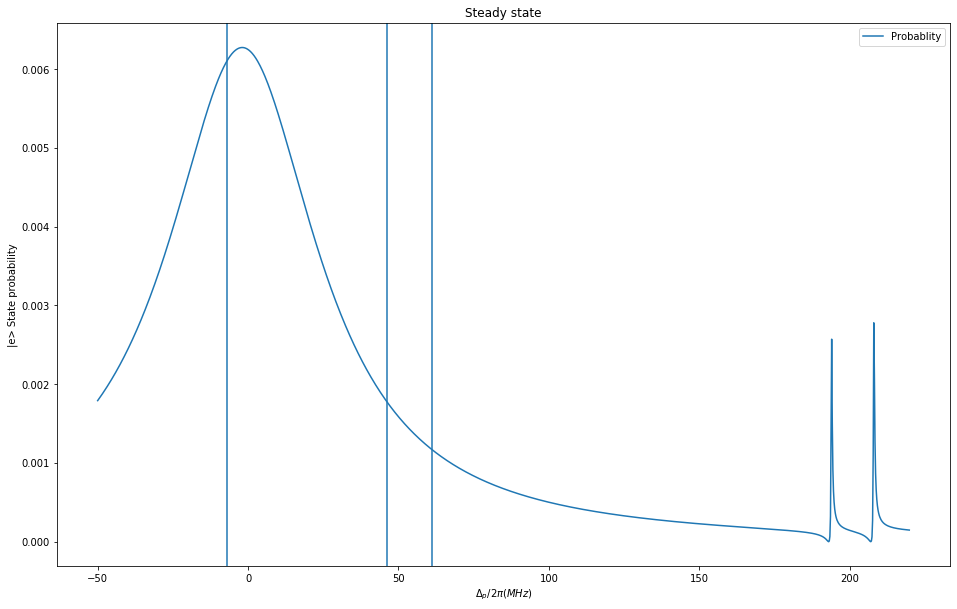

In [82]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.plot(DeltaList, StatePopulation_e, label="Probablity")
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('|e> State probability')
ax.set_title('Steady state')
ax.axvline(x = 46.1)
ax.axvline(x = 61)
ax.axvline(x = -7)

### Consider Motion

In [6]:
tau_m = 3000 # motional decoherence time (us)

def DoubleEITWithIonMotion_mesolve(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, nu, eta_pi, eta_sigma, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
        - OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
        + Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) \
        + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) \
        + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) \
        + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) \
        + nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon)),
            np.sqrt(2/(tau_m))*tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))]
    e_ops = [tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon)),
            tensor(basis(4,0)*basis(4,0).dag(), qeye(MaxPhonon)),
            tensor(basis(4,1)*basis(4,1).dag(), qeye(MaxPhonon)),
            tensor(basis(4,2)*basis(4,2).dag(), qeye(MaxPhonon)),
            tensor(basis(4,3)*basis(4,3).dag(), qeye(MaxPhonon))]
    opts = Options(store_states=True)
    output = mesolve(H, rho0, t, c_ops, e_ops, options=opts)
    return output

def DoubleEITSimulationWithIonMotion_cryo_mesolve(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta1, Delta2, Delta_3, nu, eta_pi, eta_sigma, delta_dp, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            - OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            +Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) +\
    nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    H_time1 = Omega_Minus2*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time1_coeff(t, args):
        return np.exp(-1j * delta_dp * t) ## delta_dp should be negative
    H_time2 = Omega_Minus2*tensor(basis(4,0)*basis(4,1).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time2_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    H_time3 = Omega_Plus2*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time3_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time4 = Omega_Plus2*tensor(basis(4,0)*basis(4,3).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time4_coeff(t, args):
        return np.exp(1j * delta_dp * t)
    
    #solve the final state
    H_full = [H,[H_time1, H_time1_coeff],[H_time2, H_time2_coeff],[H_time3, H_time3_coeff],[H_time4, H_time4_coeff]]
    
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon)),
            np.sqrt(2/(tau_m))*tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))]
    e_ops = [tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon)),
            tensor(basis(4,0)*basis(4,0).dag(), qeye(MaxPhonon)),
            tensor(basis(4,1)*basis(4,1).dag(), qeye(MaxPhonon)),
            tensor(basis(4,2)*basis(4,2).dag(), qeye(MaxPhonon)),
            tensor(basis(4,3)*basis(4,3).dag(), qeye(MaxPhonon))]
    opts = Options(store_states=True)
    output = mesolve(H_full, rho0, t, c_ops, e_ops, options=opts)
    return output



## Delta_c = 50MHz

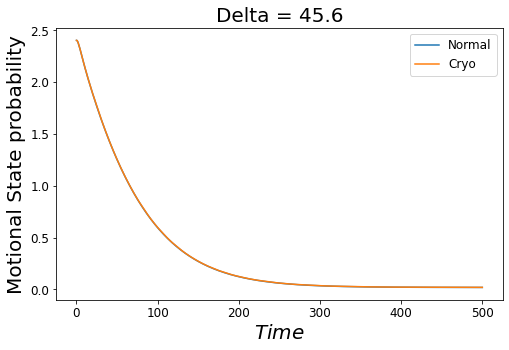

Fianl motional mode = 0.017967236797600906


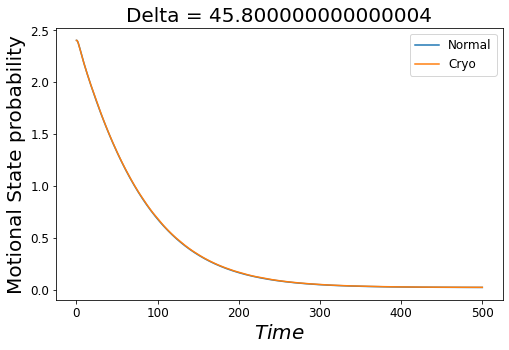

Fianl motional mode = 0.02476400864347159


In [100]:
MaxPhonon = 10

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
Omega_Minus = 23
OmegaPi = 1.7

Omega_Plus2 = 0.85
Omega_Minus2 = 0.85


Delta_c = 50 # coupling beam detuning
Zeeman = 7 # Zeeman shift
Delta_Minus = Delta_c-Zeeman
Delta_Plus = Delta_c+Zeeman

Delta0 = 0
nu = 2.4 # mode frequency
eta = 0.1
eta_pi = eta
eta_sigma = -eta

# cooling_detuning_list1 = np.arange(45,47,0.2)
# tlist = np.linspace(0, 300, 100)
cooling_detuning_list1 = np.arange(45.6,45.9,0.2)
tlist = np.linspace(0, 500, 20000)
rho0 = tensor(ket2dm(basis(4,2)), thermal_dm(MaxPhonon, 3))

States_normal = []
States_cryo = []
motion_normal = []
motion_cryo = []
for Delta_p in cooling_detuning_list1:
    States_normal.append(DoubleEITWithIonMotion_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, 
                                                   Delta0, Delta_Minus, Delta_p, Delta_Plus, nu, 
                                                   eta_pi, eta_sigma, gammaSP).states)
    motion_normal.append([(tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))*state).tr() 
                     for state in States_normal[-1]])
    
    delta_dp = Delta_c - Delta_p
    States_cryo.append(DoubleEITSimulationWithIonMotion_cryo_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, 
                                        Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, Delta_p, Delta_Plus, nu,
                                        eta_pi, eta_sigma, delta_dp, gammaSP).states)
    motion_cryo.append([(tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))*state).tr() 
                     for state in States_cryo[-1]])
      
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, motion_normal[-1], label="Normal")
    ax.plot(tlist, motion_cryo[-1], label="Cryo")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('Motional State probability')
    ax.set_title('Delta = '+str(Delta_p))
    plt.show()
    print('Fianl motional mode = '+str(motion_normal[-1][-1]))

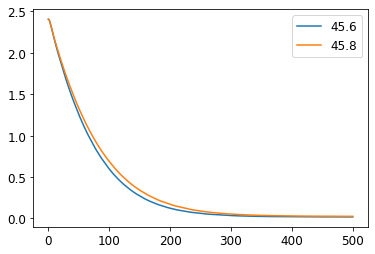

In [101]:
plt.plot(tlist, motion_cryo[0], label="45.6")
plt.plot(tlist, motion_cryo[1], label="45.8")
# plt.plot(tlist, motion_cryo[2], label="45.8")
plt.legend()

### Plot the spin states

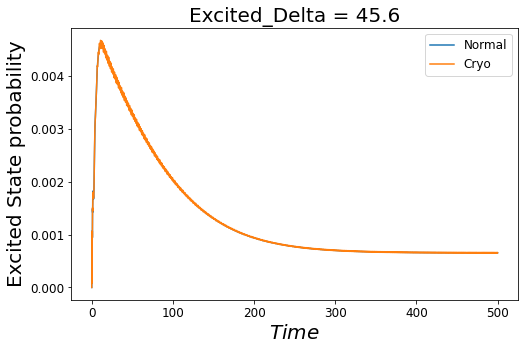

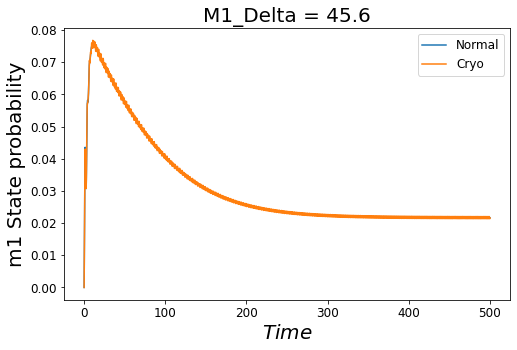

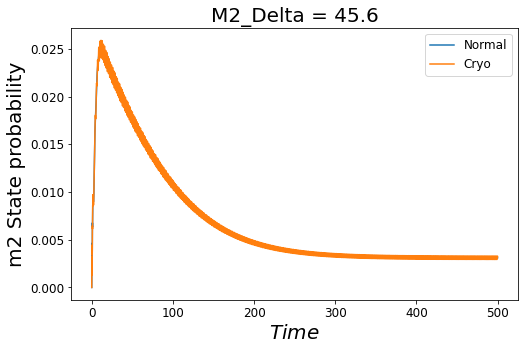

m1_final_prob = 0.021673465674348105
m2_final_prob = 0.0030973653832867725


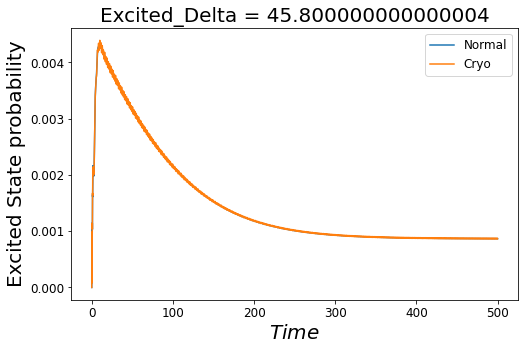

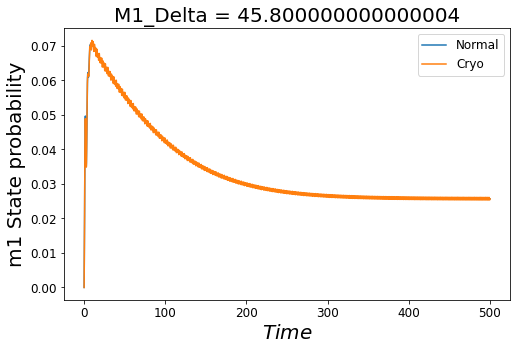

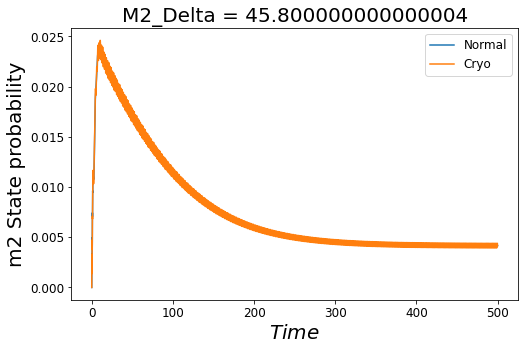

m1_final_prob = 0.025692156090169102
m2_final_prob = 0.004148967110627054


In [102]:
# cooling_detuning_list1 = np.arange(45,47,0.2)
excited_normal = []
excited_cryo = []
m1_normal = []
m1_cryo = []
ground_normal = []
ground_cryo = []
m2_normal = []
m2_cryo = []
for i in range(len(cooling_detuning_list1)):
    excited_normal.append([(tensor(ket2dm(basis(4,0)), qeye(MaxPhonon))*state).tr() 
                     for state in States_normal[i]])
    excited_cryo.append([(tensor(ket2dm(basis(4,0)), qeye(MaxPhonon))*state).tr() 
                     for state in States_cryo[i]])
    m1_normal.append([(tensor(ket2dm(basis(4,1)), qeye(MaxPhonon))*state).tr() 
                     for state in States_normal[i]])
    m1_cryo.append([(tensor(ket2dm(basis(4,1)), qeye(MaxPhonon))*state).tr() 
                     for state in States_cryo[i]])
    ground_normal.append([(tensor(ket2dm(basis(4,2)), qeye(MaxPhonon))*state).tr() 
                     for state in States_normal[i]])
    ground_cryo.append([(tensor(ket2dm(basis(4,2)), qeye(MaxPhonon))*state).tr() 
                     for state in States_cryo[i]])
    m2_normal.append([(tensor(ket2dm(basis(4,3)), qeye(MaxPhonon))*state).tr() 
                     for state in States_normal[i]])
    m2_cryo.append([(tensor(ket2dm(basis(4,3)), qeye(MaxPhonon))*state).tr() 
                     for state in States_cryo[i]])
    
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, excited_normal[i], label="Normal")
    ax.plot(tlist, excited_cryo[i], label="Cryo")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('Excited State probability')
    ax.set_title('Excited_Delta = '+str(cooling_detuning_list1[i]))
    plt.show()
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, m1_normal[i], label="Normal")
    ax.plot(tlist, m1_cryo[i], label="Cryo")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('m1 State probability')
    ax.set_title('M1_Delta = '+str(cooling_detuning_list1[i]))
    plt.show()
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, m2_normal[i], label="Normal")
    ax.plot(tlist, m2_cryo[i], label="Cryo")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('m2 State probability')
    ax.set_title('M2_Delta = '+str(cooling_detuning_list1[i]))
    plt.show()
    '''
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, ground_normal[i], label="Normal")
    ax.plot(tlist, ground_cryo[i], label="Cryo")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('Ground State probability')
    ax.set_title('Ground_Delta = '+str(cooling_detuning_list1[i]))
    plt.show()
    '''
    print('m1_final_prob = '+str(m1_normal[i][-1]))
    print('m2_final_prob = '+str(m2_normal[i][-1]))

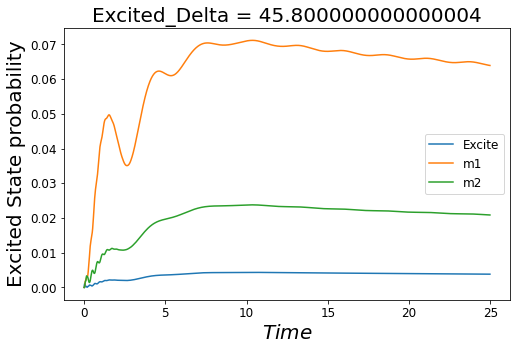

In [105]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(tlist[:1000], excited_normal[i][:1000], label="Excite")
ax.plot(tlist[:1000], m1_normal[i][:1000], label="m1")
ax.plot(tlist[:1000], m2_normal[i][:1000], label="m2")
#     ax.plot(tlist, excited_cryo[i], label="Cryo")
ax.legend()
ax.set_xlabel('$Time$')
ax.set_ylabel('Excited State probability')
ax.set_title('Excited_Delta = '+str(cooling_detuning_list1[i]))
plt.show()

## Delta_c = 200MHz

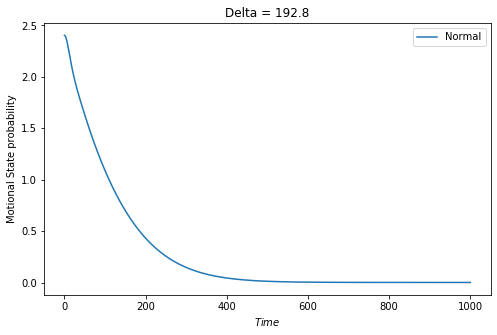

Fianl motional mode = 0.0010635242084219975


In [33]:
MaxPhonon = 10

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
Omega_Minus = 23
OmegaPi = 1.7

Omega_Plus2 = 0.85
Omega_Minus2 = 0.85


Delta_c = 200 # coupling beam detuning
Zeeman = 7 # Zeeman shift
Delta_Minus = Delta_c-Zeeman
Delta_Plus = Delta_c+Zeeman

Delta0 = 0
nu = 2.4 # mode frequency
eta = 0.1
eta_pi = eta
eta_sigma = -eta

# cooling_detuning_list1 = np.arange(191,194,0.2)
cooling_detuning_list1 = [192.8]
tlist = np.linspace(0, 1000, 2500)
rho0 = tensor(ket2dm(basis(4,2)), thermal_dm(MaxPhonon, 3))

States_normal_2 = []
States_cryo_2 = []
motion_normal_2 = []
motion_cryo_2 = []
for Delta_p in cooling_detuning_list1:
    States_normal_2.append(DoubleEITWithIonMotion_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, 
                                                   Delta0, Delta_Minus, Delta_p, Delta_Plus, nu, 
                                                   eta_pi, eta_sigma, gammaSP).states)
    motion_normal_2.append([(tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))*state).tr() 
                     for state in States_normal_2[-1]])
    
    '''delta_dp = Delta_c - Delta_p
    States_cryo.append(DoubleEITSimulationWithIonMotion_cryo_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, 
                                        Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, Delta_p, Delta_Plus, nu,
                                        eta_pi, eta_sigma, delta_dp, gammaSP).states)
    motion_cryo.append([(tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))*state).tr() 
                     for state in States_cryo[-1]])
    '''
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, motion_normal_2[-1], label="Normal")
#     ax.plot(tlist, motion_cryo[-1], label="Cryo")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('Motional State probability')
    ax.set_title('Delta = '+str(Delta_p))
    plt.show()
    print('Fianl motional mode = '+str(motion_normal_2[-1][-1]))

In [57]:
States_normal_2[0][-1].ptrace([0])

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 4.61970450e-06+1.22534171e-20j -2.45220396e-05-4.83338433e-07j
  -6.49926266e-04+5.83581599e-06j  6.17961842e-06-6.99468988e-07j]
 [-2.45220396e-05+4.83338433e-07j  4.70440262e-03+1.47809504e-18j
   6.63417030e-02-2.41365253e-04j  4.26724420e-05-2.30959832e-06j]
 [-6.49926266e-04-5.83581599e-06j  6.63417030e-02+2.41365253e-04j
   9.95189181e-01+1.30124298e-16j  9.30177434e-04+3.47101688e-06j]
 [ 6.17961842e-06+6.99468988e-07j  4.26724420e-05+2.30959832e-06j
   9.30177434e-04-3.47101688e-06j  1.01796458e-04+3.78833794e-20j]]

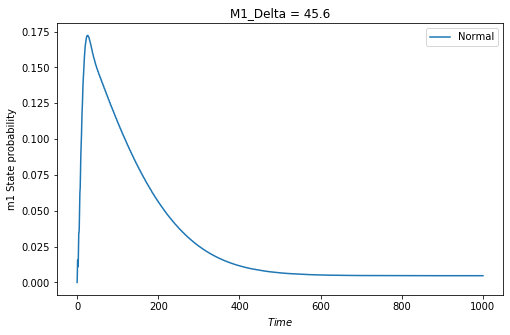

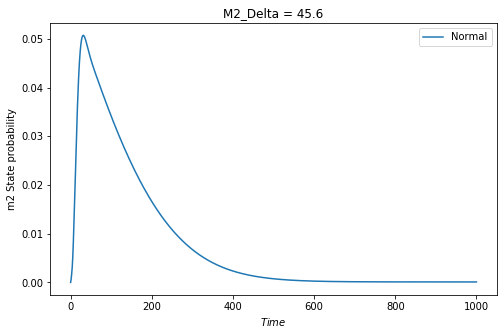

m1_final_prob = 0.004704402621345541
m2_final_prob = 0.00010179645823587946


IndexError: list index out of range

In [43]:
# cooling_detuning_list1 = np.arange(45,47,0.2)
excited_normal_2 = []
excited_cryo_2 = []
m1_normal_2 = []
m1_cryo_2 = []
ground_normal_2 = []
ground_cryo_2 = []
m2_normal_2 = []
m2_cryo_2 = []
for i in range(len(cooling_detuning_list1)):
    excited_normal_2.append([(tensor(ket2dm(basis(4,0)), qeye(MaxPhonon))*state).tr() 
                     for state in States_normal_2[i]])
#     excited_cryo_2.append([(tensor(ket2dm(basis(4,0)), qeye(MaxPhonon))*state).tr() 
#                      for state in States_cryo_2[i]])
    m1_normal_2.append([(tensor(ket2dm(basis(4,1)), qeye(MaxPhonon))*state).tr() 
                     for state in States_normal_2[i]])
#     m1_cryo_2.append([(tensor(ket2dm(basis(4,1)), qeye(MaxPhonon))*state).tr() 
#                      for state in States_cryo_2[i]])
    ground_normal_2.append([(tensor(ket2dm(basis(4,2)), qeye(MaxPhonon))*state).tr() 
                     for state in States_normal_2[i]])
#     ground_cryo_2.append([(tensor(ket2dm(basis(4,2)), qeye(MaxPhonon))*state).tr() 
#                      for state in States_cryo_2[i]])
    m2_normal_2.append([(tensor(ket2dm(basis(4,3)), qeye(MaxPhonon))*state).tr() 
                     for state in States_normal_2[i]])
#     m2_cryo_2.append([(tensor(ket2dm(basis(4,3)), qeye(MaxPhonon))*state).tr() 
#                      for state in States_cryo_2[i]])
    
    '''  
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, excited_normal[i], label="Normal")
    ax.plot(tlist, excited_cryo[i], label="Cryo")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('Excited State probability')
    ax.set_title('Excited_Delta = '+str(cooling_detuning_list1[i]))
    plt.show()
    '''
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, m1_normal_2[i], label="Normal")
#     ax.plot(tlist, m1_cryo_2[i], label="Cryo")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('m1 State probability')
    ax.set_title('M1_Delta = '+str(cooling_detuning_list1[i]))
    plt.show()
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, m2_normal_2[i], label="Normal")
#     ax.plot(tlist, m2_cryo_2[i], label="Cryo")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('m2 State probability')
    ax.set_title('M2_Delta = '+str(cooling_detuning_list1[i]))
    plt.show()
    '''
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, ground_normal[i], label="Normal")
    ax.plot(tlist, ground_cryo[i], label="Cryo")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('Ground State probability')
    ax.set_title('Ground_Delta = '+str(cooling_detuning_list1[i]))
    plt.show()
    '''
    print('m1_final_prob = '+str(m1_normal_2[i][-1]))
    print('m2_final_prob = '+str(m2_normal_2[i][-1]))

## Scan the Pumping frequency

In [7]:
from tqdm import tqdm
def BestDetuning(detuningList,phononList):
    small = phononList[0]
    index = 0
    for i in np.arange(len(phononList)):
        if phononList[i]<small:
            small=phononList[i]
            index=i
    return [detuningList[index],small]

MaxPhonon = 10

gammaSP = 7 #Linewith
Omega_Plus = 2*gammaSP # Rabi frequency
Omega_Minus = 2*gammaSP
OmegaPi = 0.1*Omega_Plus
Zeeman = 7 # Zeeman shift


Delta0 = 0
nu = 2.0 # mode frequency
eta = 0.1
eta_pi = eta
eta_sigma = -eta

states = []
motion = []
Deltap = []
Delta_c_list = [50, 75, 100, 125, 150, 175, 200]
for Delta_c in Delta_c_list:
    Delta_Minus = Delta_c+Zeeman
    Delta_Plus = Delta_c-Zeeman

    cooling_detuning_list1 = np.arange(Delta_c - Zeeman-2, Delta_c - Zeeman+3, 0.2)
    tlist = np.linspace(0, 800, 2000)
    rho0 = tensor(ket2dm(basis(4,2)), thermal_dm(MaxPhonon, 3))

    States_temp = []
    motion_temp = []
    Deltap_temp = []
    for Delta_p in tqdm(cooling_detuning_list1):
        States_temp.append(DoubleEITWithIonMotion_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, 
                                                       Delta0, Delta_Minus, Delta_p, Delta_Plus, nu, 
                                                       eta_pi, eta_sigma, gammaSP).states)
        motion_temp.append([(tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))*state).tr() 
                         for state in States_temp[-1]])
        Deltap_temp.append(Delta_p)
        print('Delta_c = '+str(Delta_c)+' MHz, Delta_p = '+str(Delta_p)+' MHz')
        print('Final motional mode = '+str(motion_temp[-1][-1])+'\n')
    states.append(States_temp)
    motion.append(motion_temp)
    Deltap.append(Deltap_temp)

  4%|▍         | 1/25 [00:32<13:02, 32.62s/it]

Delta_c = 50 MHz, Delta_p = 41.0 MHz
Final motional mode = 2.414196308154954



  8%|▊         | 2/25 [01:04<12:26, 32.45s/it]

Delta_c = 50 MHz, Delta_p = 41.2 MHz
Final motional mode = 2.320419415469895



 12%|█▏        | 3/25 [01:37<11:52, 32.40s/it]

Delta_c = 50 MHz, Delta_p = 41.400000000000006 MHz
Final motional mode = 2.173451478359533



 16%|█▌        | 4/25 [02:09<11:16, 32.20s/it]

Delta_c = 50 MHz, Delta_p = 41.60000000000001 MHz
Final motional mode = 1.953546225032154



 20%|██        | 5/25 [02:41<10:44, 32.21s/it]

Delta_c = 50 MHz, Delta_p = 41.80000000000001 MHz
Final motional mode = 1.6775119945626253



 24%|██▍       | 6/25 [03:13<10:12, 32.22s/it]

Delta_c = 50 MHz, Delta_p = 42.000000000000014 MHz
Final motional mode = 1.456846609925802



 28%|██▊       | 7/25 [03:46<09:41, 32.30s/it]

Delta_c = 50 MHz, Delta_p = 42.20000000000002 MHz
Final motional mode = 1.3968921675511563



 32%|███▏      | 8/25 [04:19<09:13, 32.56s/it]

Delta_c = 50 MHz, Delta_p = 42.40000000000002 MHz
Final motional mode = 1.4222596799134402



 36%|███▌      | 9/25 [04:52<08:44, 32.76s/it]

Delta_c = 50 MHz, Delta_p = 42.60000000000002 MHz
Final motional mode = 1.4074672793758434



 40%|████      | 10/25 [05:25<08:10, 32.73s/it]

Delta_c = 50 MHz, Delta_p = 42.800000000000026 MHz
Final motional mode = 1.2927918708943138



 44%|████▍     | 11/25 [05:57<07:36, 32.63s/it]

Delta_c = 50 MHz, Delta_p = 43.00000000000003 MHz
Final motional mode = 1.0598177347322633



 48%|████▊     | 12/25 [06:30<07:07, 32.86s/it]

Delta_c = 50 MHz, Delta_p = 43.20000000000003 MHz
Final motional mode = 0.7192930455934695



 52%|█████▏    | 13/25 [07:03<06:32, 32.70s/it]

Delta_c = 50 MHz, Delta_p = 43.400000000000034 MHz
Final motional mode = 0.3462823919671345



 56%|█████▌    | 14/25 [07:35<05:58, 32.60s/it]

Delta_c = 50 MHz, Delta_p = 43.60000000000004 MHz
Final motional mode = 0.09404262903506241



 60%|██████    | 15/25 [08:07<05:23, 32.34s/it]

Delta_c = 50 MHz, Delta_p = 43.80000000000004 MHz
Final motional mode = 0.021908983632348836



 64%|██████▍   | 16/25 [08:38<04:48, 32.10s/it]

Delta_c = 50 MHz, Delta_p = 44.00000000000004 MHz
Final motional mode = 0.01588420060094331



 68%|██████▊   | 17/25 [09:10<04:14, 31.85s/it]

Delta_c = 50 MHz, Delta_p = 44.200000000000045 MHz
Final motional mode = 0.020075706269974784



 72%|███████▏  | 18/25 [09:42<03:44, 32.08s/it]

Delta_c = 50 MHz, Delta_p = 44.40000000000005 MHz
Final motional mode = 0.03264616159339934



 76%|███████▌  | 19/25 [10:15<03:13, 32.18s/it]

Delta_c = 50 MHz, Delta_p = 44.60000000000005 MHz
Final motional mode = 0.06054074813204432



 80%|████████  | 20/25 [10:47<02:41, 32.33s/it]

Delta_c = 50 MHz, Delta_p = 44.800000000000054 MHz
Final motional mode = 0.1167628637426825



 84%|████████▍ | 21/25 [11:19<02:08, 32.25s/it]

Delta_c = 50 MHz, Delta_p = 45.00000000000006 MHz
Final motional mode = 0.21514043867814395



 88%|████████▊ | 22/25 [11:51<01:36, 32.15s/it]

Delta_c = 50 MHz, Delta_p = 45.20000000000006 MHz
Final motional mode = 0.3723278666161896



 92%|█████████▏| 23/25 [12:24<01:04, 32.38s/it]

Delta_c = 50 MHz, Delta_p = 45.40000000000006 MHz
Final motional mode = 0.625289127431618



 96%|█████████▌| 24/25 [12:57<00:32, 32.52s/it]

Delta_c = 50 MHz, Delta_p = 45.600000000000065 MHz
Final motional mode = 1.0600536188151044



100%|██████████| 25/25 [13:29<00:00, 32.37s/it]


Delta_c = 50 MHz, Delta_p = 45.80000000000007 MHz
Final motional mode = 1.8361248733407698



  4%|▍         | 1/25 [00:40<16:12, 40.51s/it]

Delta_c = 75 MHz, Delta_p = 66.0 MHz
Final motional mode = 1.9098504437473796



  8%|▊         | 2/25 [01:21<15:33, 40.59s/it]

Delta_c = 75 MHz, Delta_p = 66.2 MHz
Final motional mode = 1.5342905338915276



 12%|█▏        | 3/25 [02:01<14:49, 40.45s/it]

Delta_c = 75 MHz, Delta_p = 66.4 MHz
Final motional mode = 1.6029902106160476



 16%|█▌        | 4/25 [02:42<14:12, 40.59s/it]

Delta_c = 75 MHz, Delta_p = 66.60000000000001 MHz
Final motional mode = 1.8420259601812996



 20%|██        | 5/25 [03:23<13:34, 40.74s/it]

Delta_c = 75 MHz, Delta_p = 66.80000000000001 MHz
Final motional mode = 1.959207618268847



 24%|██▍       | 6/25 [04:03<12:52, 40.67s/it]

Delta_c = 75 MHz, Delta_p = 67.00000000000001 MHz
Final motional mode = 1.9559240350199336



 28%|██▊       | 7/25 [04:44<12:14, 40.81s/it]

Delta_c = 75 MHz, Delta_p = 67.20000000000002 MHz
Final motional mode = 1.8406497160653987



 32%|███▏      | 8/25 [05:26<11:40, 41.22s/it]

Delta_c = 75 MHz, Delta_p = 67.40000000000002 MHz
Final motional mode = 1.5841310348612112



 36%|███▌      | 9/25 [06:08<10:59, 41.22s/it]

Delta_c = 75 MHz, Delta_p = 67.60000000000002 MHz
Final motional mode = 1.129600595912564



 40%|████      | 10/25 [06:49<10:18, 41.24s/it]

Delta_c = 75 MHz, Delta_p = 67.80000000000003 MHz
Final motional mode = 0.4947139603321659



 44%|████▍     | 11/25 [07:30<09:34, 41.02s/it]

Delta_c = 75 MHz, Delta_p = 68.00000000000003 MHz
Final motional mode = 0.05677278460523336



 48%|████▊     | 12/25 [08:11<08:54, 41.11s/it]

Delta_c = 75 MHz, Delta_p = 68.20000000000003 MHz
Final motional mode = 0.0059295401327710455



 52%|█████▏    | 13/25 [08:52<08:11, 41.00s/it]

Delta_c = 75 MHz, Delta_p = 68.40000000000003 MHz
Final motional mode = 0.007659406829512072



 56%|█████▌    | 14/25 [09:32<07:30, 40.92s/it]

Delta_c = 75 MHz, Delta_p = 68.60000000000004 MHz
Final motional mode = 0.03661180682162164



 60%|██████    | 15/25 [10:13<06:48, 40.84s/it]

Delta_c = 75 MHz, Delta_p = 68.80000000000004 MHz
Final motional mode = 0.1645920085422109



 64%|██████▍   | 16/25 [10:54<06:07, 40.86s/it]

Delta_c = 75 MHz, Delta_p = 69.00000000000004 MHz
Final motional mode = 0.3690731030707225



 68%|██████▊   | 17/25 [11:35<05:27, 40.94s/it]

Delta_c = 75 MHz, Delta_p = 69.20000000000005 MHz
Final motional mode = 0.5779094049437649



 72%|███████▏  | 18/25 [12:16<04:46, 40.99s/it]

Delta_c = 75 MHz, Delta_p = 69.40000000000005 MHz
Final motional mode = 0.7725822316994361



 76%|███████▌  | 19/25 [12:57<04:05, 40.90s/it]

Delta_c = 75 MHz, Delta_p = 69.60000000000005 MHz
Final motional mode = 0.9866650789265912



 80%|████████  | 20/25 [13:38<03:25, 41.05s/it]

Delta_c = 75 MHz, Delta_p = 69.80000000000005 MHz
Final motional mode = 1.3126106163979039



 84%|████████▍ | 21/25 [14:20<02:44, 41.23s/it]

Delta_c = 75 MHz, Delta_p = 70.00000000000006 MHz
Final motional mode = 1.9273830610929226



 88%|████████▊ | 22/25 [15:03<02:05, 41.73s/it]

Delta_c = 75 MHz, Delta_p = 70.20000000000006 MHz
Final motional mode = 2.9565489351158765



 92%|█████████▏| 23/25 [15:44<01:23, 41.62s/it]

Delta_c = 75 MHz, Delta_p = 70.40000000000006 MHz
Final motional mode = 3.9710106309897037



 96%|█████████▌| 24/25 [16:26<00:41, 41.70s/it]

Delta_c = 75 MHz, Delta_p = 70.60000000000007 MHz
Final motional mode = 4.463119806350365



100%|██████████| 25/25 [17:08<00:00, 41.14s/it]


Delta_c = 75 MHz, Delta_p = 70.80000000000007 MHz
Final motional mode = 4.628335077843232



  4%|▍         | 1/25 [00:50<20:09, 50.40s/it]

Delta_c = 100 MHz, Delta_p = 91.0 MHz
Final motional mode = 1.9431865190560047



  8%|▊         | 2/25 [01:40<19:21, 50.51s/it]

Delta_c = 100 MHz, Delta_p = 91.2 MHz
Final motional mode = 2.1676793732077826



 12%|█▏        | 3/25 [02:30<18:25, 50.25s/it]

Delta_c = 100 MHz, Delta_p = 91.4 MHz
Final motional mode = 2.2381851605640697



 16%|█▌        | 4/25 [03:21<17:41, 50.54s/it]

Delta_c = 100 MHz, Delta_p = 91.60000000000001 MHz
Final motional mode = 2.233248820197331



 20%|██        | 5/25 [04:12<16:51, 50.58s/it]

Delta_c = 100 MHz, Delta_p = 91.80000000000001 MHz
Final motional mode = 2.1611380793175363



 24%|██▍       | 6/25 [05:02<15:55, 50.29s/it]

Delta_c = 100 MHz, Delta_p = 92.00000000000001 MHz
Final motional mode = 1.9846535709814883



 28%|██▊       | 7/25 [05:53<15:09, 50.52s/it]

Delta_c = 100 MHz, Delta_p = 92.20000000000002 MHz
Final motional mode = 1.6004870674670284



 32%|███▏      | 8/25 [06:44<14:21, 50.68s/it]

Delta_c = 100 MHz, Delta_p = 92.40000000000002 MHz
Final motional mode = 0.8374707260172977



 36%|███▌      | 9/25 [07:34<13:29, 50.62s/it]

Delta_c = 100 MHz, Delta_p = 92.60000000000002 MHz
Final motional mode = 0.0644932238451557



 40%|████      | 10/25 [08:25<12:39, 50.64s/it]

Delta_c = 100 MHz, Delta_p = 92.80000000000003 MHz
Final motional mode = 0.003963017008722813



 44%|████▍     | 11/25 [09:16<11:49, 50.64s/it]

Delta_c = 100 MHz, Delta_p = 93.00000000000003 MHz
Final motional mode = 0.06000662614919579



 48%|████▊     | 12/25 [10:06<10:55, 50.42s/it]

Delta_c = 100 MHz, Delta_p = 93.20000000000003 MHz
Final motional mode = 0.41983944174150784



 52%|█████▏    | 13/25 [10:56<10:04, 50.42s/it]

Delta_c = 100 MHz, Delta_p = 93.40000000000003 MHz
Final motional mode = 0.8307938463351584



 56%|█████▌    | 14/25 [11:46<09:13, 50.35s/it]

Delta_c = 100 MHz, Delta_p = 93.60000000000004 MHz
Final motional mode = 1.120943788711373



 60%|██████    | 15/25 [12:37<08:24, 50.41s/it]

Delta_c = 100 MHz, Delta_p = 93.80000000000004 MHz
Final motional mode = 1.3099944480094967



 64%|██████▍   | 16/25 [13:28<07:34, 50.54s/it]

Delta_c = 100 MHz, Delta_p = 94.00000000000004 MHz
Final motional mode = 1.442254182648355



 68%|██████▊   | 17/25 [14:19<06:46, 50.78s/it]

Delta_c = 100 MHz, Delta_p = 94.20000000000005 MHz
Final motional mode = 1.5716173427708628



 72%|███████▏  | 18/25 [15:09<05:54, 50.64s/it]

Delta_c = 100 MHz, Delta_p = 94.40000000000005 MHz
Final motional mode = 1.8042627243171356



 76%|███████▌  | 19/25 [15:59<05:03, 50.52s/it]

Delta_c = 100 MHz, Delta_p = 94.60000000000005 MHz
Final motional mode = 2.3579564908922896



 80%|████████  | 20/25 [16:50<04:12, 50.58s/it]

Delta_c = 100 MHz, Delta_p = 94.80000000000005 MHz
Final motional mode = 3.223202390890206



 84%|████████▍ | 21/25 [17:41<03:23, 50.76s/it]

Delta_c = 100 MHz, Delta_p = 95.00000000000006 MHz
Final motional mode = 3.6319131888964553



 88%|████████▊ | 22/25 [18:32<02:32, 50.79s/it]

Delta_c = 100 MHz, Delta_p = 95.20000000000006 MHz
Final motional mode = 3.579071153057762



 92%|█████████▏| 23/25 [19:23<01:41, 50.82s/it]

Delta_c = 100 MHz, Delta_p = 95.40000000000006 MHz
Final motional mode = 3.481712775452068



 96%|█████████▌| 24/25 [20:14<00:50, 50.71s/it]

Delta_c = 100 MHz, Delta_p = 95.60000000000007 MHz
Final motional mode = 3.479103083299011



100%|██████████| 25/25 [21:05<00:00, 50.60s/it]


Delta_c = 100 MHz, Delta_p = 95.80000000000007 MHz
Final motional mode = 3.6269234909450714



  4%|▍         | 1/25 [00:39<15:39, 39.16s/it]

Delta_c = 125 MHz, Delta_p = 116.0 MHz
Final motional mode = 2.3298669867199617



  8%|▊         | 2/25 [01:18<15:00, 39.16s/it]

Delta_c = 125 MHz, Delta_p = 116.2 MHz
Final motional mode = 2.3498779625883803



 12%|█▏        | 3/25 [01:57<14:24, 39.30s/it]

Delta_c = 125 MHz, Delta_p = 116.4 MHz
Final motional mode = 2.335020599172012



 16%|█▌        | 4/25 [02:37<13:48, 39.43s/it]

Delta_c = 125 MHz, Delta_p = 116.60000000000001 MHz
Final motional mode = 2.277003436373611



 20%|██        | 5/25 [03:16<13:03, 39.16s/it]

Delta_c = 125 MHz, Delta_p = 116.80000000000001 MHz
Final motional mode = 2.1301796420175876



 24%|██▍       | 6/25 [03:55<12:23, 39.12s/it]

Delta_c = 125 MHz, Delta_p = 117.00000000000001 MHz
Final motional mode = 1.7514149611498915



 28%|██▊       | 7/25 [04:34<11:43, 39.09s/it]

Delta_c = 125 MHz, Delta_p = 117.20000000000002 MHz
Final motional mode = 0.7865736111456099



 32%|███▏      | 8/25 [05:13<11:06, 39.23s/it]

Delta_c = 125 MHz, Delta_p = 117.40000000000002 MHz
Final motional mode = 0.0083028333285248



 36%|███▌      | 9/25 [05:53<10:32, 39.54s/it]

Delta_c = 125 MHz, Delta_p = 117.60000000000002 MHz
Final motional mode = 0.07352137773885142



 40%|████      | 10/25 [06:37<10:11, 40.75s/it]

Delta_c = 125 MHz, Delta_p = 117.80000000000003 MHz
Final motional mode = 0.7253104203735304



 44%|████▍     | 11/25 [07:19<09:37, 41.23s/it]

Delta_c = 125 MHz, Delta_p = 118.00000000000003 MHz
Final motional mode = 1.2672609308825369



 48%|████▊     | 12/25 [08:02<09:01, 41.68s/it]

Delta_c = 125 MHz, Delta_p = 118.20000000000003 MHz
Final motional mode = 1.5606402981951961



 52%|█████▏    | 13/25 [08:48<08:35, 43.00s/it]

Delta_c = 125 MHz, Delta_p = 118.40000000000003 MHz
Final motional mode = 1.7213628871336306



 56%|█████▌    | 14/25 [09:34<08:02, 43.90s/it]

Delta_c = 125 MHz, Delta_p = 118.60000000000004 MHz
Final motional mode = 1.814283065252988



 60%|██████    | 15/25 [10:15<07:11, 43.13s/it]

Delta_c = 125 MHz, Delta_p = 118.80000000000004 MHz
Final motional mode = 1.877033617624264



 64%|██████▍   | 16/25 [11:02<06:37, 44.20s/it]

Delta_c = 125 MHz, Delta_p = 119.00000000000004 MHz
Final motional mode = 1.9563593124292458



 68%|██████▊   | 17/25 [11:48<05:59, 44.88s/it]

Delta_c = 125 MHz, Delta_p = 119.20000000000005 MHz
Final motional mode = 2.181249324430468



 72%|███████▏  | 18/25 [12:34<05:15, 45.02s/it]

Delta_c = 125 MHz, Delta_p = 119.40000000000005 MHz
Final motional mode = 2.7809550630628297



 76%|███████▌  | 19/25 [13:18<04:28, 44.73s/it]

Delta_c = 125 MHz, Delta_p = 119.60000000000005 MHz
Final motional mode = 3.224017574610096



 80%|████████  | 20/25 [14:01<03:41, 44.23s/it]

Delta_c = 125 MHz, Delta_p = 119.80000000000005 MHz
Final motional mode = 3.1223472675094888



 84%|████████▍ | 21/25 [14:44<02:55, 43.84s/it]

Delta_c = 125 MHz, Delta_p = 120.00000000000006 MHz
Final motional mode = 2.9778488740264994



 88%|████████▊ | 22/25 [15:27<02:11, 43.70s/it]

Delta_c = 125 MHz, Delta_p = 120.20000000000006 MHz
Final motional mode = 2.9099068181396635



 92%|█████████▏| 23/25 [16:08<01:25, 42.77s/it]

Delta_c = 125 MHz, Delta_p = 120.40000000000006 MHz
Final motional mode = 2.9209778594189397



 96%|█████████▌| 24/25 [16:48<00:42, 42.07s/it]

Delta_c = 125 MHz, Delta_p = 120.60000000000007 MHz
Final motional mode = 3.0340161784676156



100%|██████████| 25/25 [17:29<00:00, 41.98s/it]


Delta_c = 125 MHz, Delta_p = 120.80000000000007 MHz
Final motional mode = 3.3489805821375094



  4%|▍         | 1/25 [00:33<13:32, 33.83s/it]

Delta_c = 150 MHz, Delta_p = 141.0 MHz
Final motional mode = 2.3902275275929266



  8%|▊         | 2/25 [01:24<16:52, 44.01s/it]

Delta_c = 150 MHz, Delta_p = 141.2 MHz
Final motional mode = 2.3833302382227477



 12%|█▏        | 3/25 [02:17<17:36, 48.01s/it]

Delta_c = 150 MHz, Delta_p = 141.39999999999998 MHz
Final motional mode = 2.3519126807540105



 16%|█▌        | 4/25 [03:09<17:18, 49.45s/it]

Delta_c = 150 MHz, Delta_p = 141.59999999999997 MHz
Final motional mode = 2.2653727485736534



 20%|██        | 5/25 [04:01<16:46, 50.30s/it]

Delta_c = 150 MHz, Delta_p = 141.79999999999995 MHz
Final motional mode = 2.0113098341748783



 24%|██▍       | 6/25 [04:51<15:55, 50.28s/it]

Delta_c = 150 MHz, Delta_p = 141.99999999999994 MHz
Final motional mode = 1.145062055469403



 28%|██▊       | 7/25 [05:41<15:01, 50.06s/it]

Delta_c = 150 MHz, Delta_p = 142.19999999999993 MHz
Final motional mode = 0.010114985490860729



 32%|███▏      | 8/25 [06:31<14:12, 50.14s/it]

Delta_c = 150 MHz, Delta_p = 142.39999999999992 MHz
Final motional mode = 0.3935592201353403



 36%|███▌      | 9/25 [07:21<13:22, 50.17s/it]

Delta_c = 150 MHz, Delta_p = 142.5999999999999 MHz
Final motional mode = 1.3041704562654908



 40%|████      | 10/25 [08:12<12:36, 50.46s/it]

Delta_c = 150 MHz, Delta_p = 142.7999999999999 MHz
Final motional mode = 1.7189439729231901



 44%|████▍     | 11/25 [08:59<11:32, 49.46s/it]

Delta_c = 150 MHz, Delta_p = 142.9999999999999 MHz
Final motional mode = 1.908065222870151



 48%|████▊     | 12/25 [09:46<10:32, 48.66s/it]

Delta_c = 150 MHz, Delta_p = 143.19999999999987 MHz
Final motional mode = 2.0045333413325164



 52%|█████▏    | 13/25 [10:20<08:50, 44.19s/it]

Delta_c = 150 MHz, Delta_p = 143.39999999999986 MHz
Final motional mode = 2.0570429676023543



 56%|█████▌    | 14/25 [11:16<08:46, 47.85s/it]

Delta_c = 150 MHz, Delta_p = 143.59999999999985 MHz
Final motional mode = 2.089320366035103



 60%|██████    | 15/25 [12:07<08:05, 48.54s/it]

Delta_c = 150 MHz, Delta_p = 143.79999999999984 MHz
Final motional mode = 2.1305615369228947



 64%|██████▍   | 16/25 [12:52<07:07, 47.50s/it]

Delta_c = 150 MHz, Delta_p = 143.99999999999983 MHz
Final motional mode = 2.282772430299944



 68%|██████▊   | 17/25 [13:37<06:13, 46.72s/it]

Delta_c = 150 MHz, Delta_p = 144.19999999999982 MHz
Final motional mode = 2.7707050448538135



 72%|███████▏  | 18/25 [14:21<05:23, 46.17s/it]

Delta_c = 150 MHz, Delta_p = 144.3999999999998 MHz
Final motional mode = 2.982649059147368



 76%|███████▌  | 19/25 [15:12<04:44, 47.39s/it]

Delta_c = 150 MHz, Delta_p = 144.5999999999998 MHz
Final motional mode = 2.821709200523226



 80%|████████  | 20/25 [16:03<04:02, 48.43s/it]

Delta_c = 150 MHz, Delta_p = 144.79999999999978 MHz
Final motional mode = 2.7109014917466863



 84%|████████▍ | 21/25 [16:52<03:14, 48.70s/it]

Delta_c = 150 MHz, Delta_p = 144.99999999999977 MHz
Final motional mode = 2.663687309221103



 88%|████████▊ | 22/25 [17:40<02:25, 48.65s/it]

Delta_c = 150 MHz, Delta_p = 145.19999999999976 MHz
Final motional mode = 2.664699678368764



 92%|█████████▏| 23/25 [18:29<01:37, 48.69s/it]

Delta_c = 150 MHz, Delta_p = 145.39999999999975 MHz
Final motional mode = 2.7230339646029686



 96%|█████████▌| 24/25 [19:02<00:43, 43.85s/it]

Delta_c = 150 MHz, Delta_p = 145.59999999999974 MHz
Final motional mode = 2.8969344076485686



100%|██████████| 25/25 [19:53<00:00, 47.74s/it]


Delta_c = 150 MHz, Delta_p = 145.79999999999973 MHz
Final motional mode = 3.430203511969887



  4%|▍         | 1/25 [00:55<22:16, 55.68s/it]

Delta_c = 175 MHz, Delta_p = 166.0 MHz
Final motional mode = 2.4044291098133326



  8%|▊         | 2/25 [01:51<21:22, 55.75s/it]

Delta_c = 175 MHz, Delta_p = 166.2 MHz
Final motional mode = 2.3916361392652448



 12%|█▏        | 3/25 [02:43<19:51, 54.16s/it]

Delta_c = 175 MHz, Delta_p = 166.39999999999998 MHz
Final motional mode = 2.352242113999685



 16%|█▌        | 4/25 [03:37<18:52, 53.91s/it]

Delta_c = 175 MHz, Delta_p = 166.59999999999997 MHz
Final motional mode = 2.2306232766636587



 20%|██        | 5/25 [04:30<17:55, 53.79s/it]

Delta_c = 175 MHz, Delta_p = 166.79999999999995 MHz
Final motional mode = 1.7533277435977421



 24%|██▍       | 6/25 [05:24<17:03, 53.87s/it]

Delta_c = 175 MHz, Delta_p = 166.99999999999994 MHz
Final motional mode = 0.11595358715644678



 28%|██▊       | 7/25 [06:19<16:16, 54.22s/it]

Delta_c = 175 MHz, Delta_p = 167.19999999999993 MHz
Final motional mode = 0.5166310551325046



 32%|███▏      | 8/25 [07:14<15:22, 54.26s/it]

Delta_c = 175 MHz, Delta_p = 167.39999999999992 MHz
Final motional mode = 1.5712626110167371



 36%|███▌      | 9/25 [08:08<14:26, 54.17s/it]

Delta_c = 175 MHz, Delta_p = 167.5999999999999 MHz
Final motional mode = 1.931645116318014



 40%|████      | 10/25 [09:01<13:30, 54.05s/it]

Delta_c = 175 MHz, Delta_p = 167.7999999999999 MHz
Final motional mode = 2.0769365507131177



 44%|████▍     | 11/25 [09:55<12:35, 53.98s/it]

Delta_c = 175 MHz, Delta_p = 167.9999999999999 MHz
Final motional mode = 2.1468741217965963



 48%|████▊     | 12/25 [10:50<11:45, 54.30s/it]

Delta_c = 175 MHz, Delta_p = 168.19999999999987 MHz
Final motional mode = 2.183333171323694



 52%|█████▏    | 13/25 [11:45<10:53, 54.49s/it]

Delta_c = 175 MHz, Delta_p = 168.39999999999986 MHz
Final motional mode = 2.203183938210186



 56%|█████▌    | 14/25 [12:40<10:01, 54.68s/it]

Delta_c = 175 MHz, Delta_p = 168.59999999999985 MHz
Final motional mode = 2.2211780913993073



 60%|██████    | 15/25 [13:36<09:08, 54.85s/it]

Delta_c = 175 MHz, Delta_p = 168.79999999999984 MHz
Final motional mode = 2.288579855821749



 64%|██████▍   | 16/25 [14:32<08:17, 55.32s/it]

Delta_c = 175 MHz, Delta_p = 168.99999999999983 MHz
Final motional mode = 2.613377423464593



 68%|██████▊   | 17/25 [15:28<07:24, 55.59s/it]

Delta_c = 175 MHz, Delta_p = 169.19999999999982 MHz
Final motional mode = 2.8383688356614543



 72%|███████▏  | 18/25 [16:24<06:29, 55.61s/it]

Delta_c = 175 MHz, Delta_p = 169.3999999999998 MHz
Final motional mode = 2.685846246363741



 76%|███████▌  | 19/25 [17:20<05:34, 55.69s/it]

Delta_c = 175 MHz, Delta_p = 169.5999999999998 MHz
Final motional mode = 2.5924714352907876



 80%|████████  | 20/25 [18:15<04:38, 55.69s/it]

Delta_c = 175 MHz, Delta_p = 169.79999999999978 MHz
Final motional mode = 2.5519271774652497



 84%|████████▍ | 21/25 [19:13<03:44, 56.24s/it]

Delta_c = 175 MHz, Delta_p = 169.99999999999977 MHz
Final motional mode = 2.543043907292772



 88%|████████▊ | 22/25 [20:11<02:49, 56.66s/it]

Delta_c = 175 MHz, Delta_p = 170.19999999999976 MHz
Final motional mode = 2.5648976988276297



 92%|█████████▏| 23/25 [21:08<01:54, 57.03s/it]

Delta_c = 175 MHz, Delta_p = 170.39999999999975 MHz
Final motional mode = 2.641555117171375



 96%|█████████▌| 24/25 [22:06<00:57, 57.25s/it]

Delta_c = 175 MHz, Delta_p = 170.59999999999974 MHz
Final motional mode = 2.8779023756931723



100%|██████████| 25/25 [23:05<00:00, 55.40s/it]


Delta_c = 175 MHz, Delta_p = 170.79999999999973 MHz
Final motional mode = 3.8930635012768833



  4%|▍         | 1/25 [01:05<26:11, 65.50s/it]

Delta_c = 200 MHz, Delta_p = 191.0 MHz
Final motional mode = 2.408206959049227



  8%|▊         | 2/25 [02:09<24:52, 64.88s/it]

Delta_c = 200 MHz, Delta_p = 191.2 MHz
Final motional mode = 2.3935271612021483



 12%|█▏        | 3/25 [03:14<23:43, 64.69s/it]

Delta_c = 200 MHz, Delta_p = 191.39999999999998 MHz
Final motional mode = 2.3469541082464347



 16%|█▌        | 4/25 [04:18<22:36, 64.58s/it]

Delta_c = 200 MHz, Delta_p = 191.59999999999997 MHz
Final motional mode = 2.1701457869846252



 20%|██        | 5/25 [05:23<21:31, 64.59s/it]

Delta_c = 200 MHz, Delta_p = 191.79999999999995 MHz
Final motional mode = 1.1591862721454533



 24%|██▍       | 6/25 [06:27<20:25, 64.48s/it]

Delta_c = 200 MHz, Delta_p = 191.99999999999994 MHz
Final motional mode = 0.2084296329128602



 28%|██▊       | 7/25 [07:32<19:19, 64.43s/it]

Delta_c = 200 MHz, Delta_p = 192.19999999999993 MHz
Final motional mode = 1.6223817596177983



 32%|███▏      | 8/25 [08:35<18:08, 64.02s/it]

Delta_c = 200 MHz, Delta_p = 192.39999999999992 MHz
Final motional mode = 2.026123064884455



 36%|███▌      | 9/25 [09:38<16:58, 63.65s/it]

Delta_c = 200 MHz, Delta_p = 192.5999999999999 MHz
Final motional mode = 2.162420384735045



 40%|████      | 10/25 [10:39<15:44, 62.95s/it]

Delta_c = 200 MHz, Delta_p = 192.7999999999999 MHz
Final motional mode = 2.222854135595473



 44%|████▍     | 11/25 [11:40<14:32, 62.32s/it]

Delta_c = 200 MHz, Delta_p = 192.9999999999999 MHz
Final motional mode = 2.2532194573081563



 48%|████▊     | 12/25 [12:41<13:25, 61.95s/it]

Delta_c = 200 MHz, Delta_p = 193.19999999999987 MHz
Final motional mode = 2.268840991266704



 52%|█████▏    | 13/25 [13:44<12:27, 62.31s/it]

Delta_c = 200 MHz, Delta_p = 193.39999999999986 MHz
Final motional mode = 2.2779562563116356



 56%|█████▌    | 14/25 [14:49<11:32, 62.98s/it]

Delta_c = 200 MHz, Delta_p = 193.59999999999985 MHz
Final motional mode = 2.298254718939701



 60%|██████    | 15/25 [15:53<10:34, 63.47s/it]

Delta_c = 200 MHz, Delta_p = 193.79999999999984 MHz
Final motional mode = 2.436140320970138



 64%|██████▍   | 16/25 [16:58<09:34, 63.78s/it]

Delta_c = 200 MHz, Delta_p = 193.99999999999983 MHz
Final motional mode = 2.750577469176049



 68%|██████▊   | 17/25 [17:56<08:18, 62.27s/it]

Delta_c = 200 MHz, Delta_p = 194.19999999999982 MHz
Final motional mode = 2.63215776825947



 72%|███████▏  | 18/25 [19:02<07:23, 63.39s/it]

Delta_c = 200 MHz, Delta_p = 194.3999999999998 MHz
Final motional mode = 2.5391873604239033



 76%|███████▌  | 19/25 [20:31<07:05, 70.99s/it]

Delta_c = 200 MHz, Delta_p = 194.5999999999998 MHz
Final motional mode = 2.499417942993239



 80%|████████  | 20/25 [22:00<06:21, 76.32s/it]

Delta_c = 200 MHz, Delta_p = 194.79999999999978 MHz
Final motional mode = 2.4848886799366467



 84%|████████▍ | 21/25 [23:28<05:19, 79.85s/it]

Delta_c = 200 MHz, Delta_p = 194.99999999999977 MHz
Final motional mode = 2.4883901118836227



 88%|████████▊ | 22/25 [24:57<04:07, 82.47s/it]

Delta_c = 200 MHz, Delta_p = 195.19999999999976 MHz
Final motional mode = 2.516642132564411



 92%|█████████▏| 23/25 [26:25<02:48, 84.19s/it]

Delta_c = 200 MHz, Delta_p = 195.39999999999975 MHz
Final motional mode = 2.6053590036605887



 96%|█████████▌| 24/25 [27:53<01:25, 85.48s/it]

Delta_c = 200 MHz, Delta_p = 195.59999999999974 MHz
Final motional mode = 2.9381115868538004



100%|██████████| 25/25 [29:22<00:00, 70.50s/it]

Delta_c = 200 MHz, Delta_p = 195.79999999999973 MHz
Final motional mode = 5.332396502248033



In [59]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

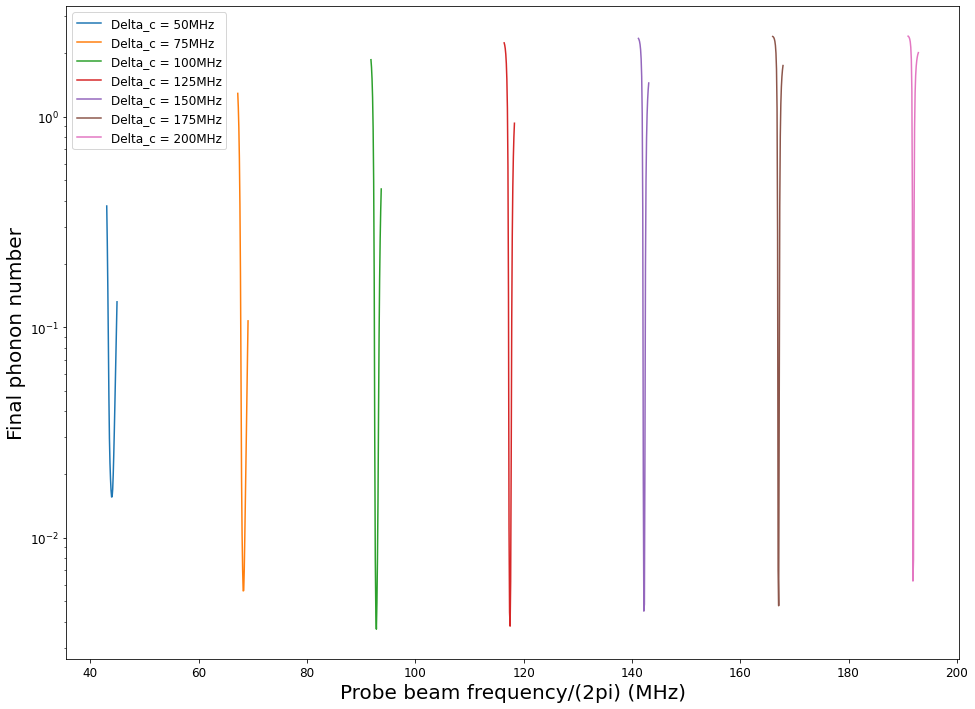

In [61]:
plt.figure(figsize = (16,12))
for i in range(len(Delta_c_list)):
    plt.plot(Deltap[i], [motion[i][j][-1] for j in range(len(motion[i]))], label = 'Delta_c = '+str(Delta_c_list[i])+'MHz')
plt.xlabel('Probe beam frequency/(2pi) (MHz)')
plt.ylabel('Final phonon number')
plt.yscale('log')
plt.legend()
plt.show()


In [29]:
def BestDetuning(detuningList,phononList):
    small = phononList[0]
    index = 0
    for i in np.arange(len(phononList)):
        if phononList[i]<small:
            small=phononList[i]
            index=i
    return [detuningList[index],small]

Delta_p_sol = np.zeros(len(Delta_c_list))
motion_num = np.zeros(len(Delta_c_list))
for i in range(len(Delta_c_list)):
    [Delta_p_sol[i], motion_num[i]] = BestDetuning(Deltap[i], [motion[i][j][-1] for j in range(len(motion[i]))])

In [30]:
Delta_p_sol = np.array([ 44. ,  68.2,  92.8, 117.4, 142.2, 167. , 192. ])

array([ 44. ,  68.2,  92.8, 117.4, 142.2, 167. , 192. ])

In [44]:
from tqdm import tqdm
def BestDetuning(detuningList,phononList):
    small = phononList[0]
    index = 0
    for i in np.arange(len(phononList)):
        if phononList[i]<small:
            small=phononList[i]
            index=i
    return [detuningList[index],small]

MaxPhonon = 10

gammaSP = 7 #Linewith
Omega_Plus = 2*gammaSP # Rabi frequency
Omega_Minus = 2*gammaSP
OmegaPi = 0.1*Omega_Plus
Zeeman = 7 # Zeeman shift


Delta0 = 0
nu = 2.0 # mode frequency
eta = 0.1
eta_pi = eta
eta_sigma = -eta

states = []
motion = []
Deltap = []
Delta_c_list = [50, 75, 100, 125, 150, 175, 200]
#Delta_c_list = [200]
cnt = 0
for Delta_c in Delta_c_list:
    Delta_Minus = Delta_c+Zeeman
    Delta_Plus = Delta_c-Zeeman
    #cooling_detuning_list1 = [192]
    cooling_detuning_list1 = np.arange(Delta_p_sol[cnt]-1, Delta_p_sol[cnt]+1, 0.1)
    tlist = np.linspace(0, 2000, 2000)
    rho0 = tensor(ket2dm(basis(4,2)), thermal_dm(MaxPhonon, 3))

    States_temp = []
    motion_temp = []
    Deltap_temp = []
    for Delta_p in tqdm(cooling_detuning_list1):
        States_temp.append(DoubleEITWithIonMotion_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, 
                                                       Delta0, Delta_Minus, Delta_p, Delta_Plus, nu, 
                                                       eta_pi, eta_sigma, gammaSP).states)
        motion_temp.append([(tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))*state).tr() 
                         for state in States_temp[-1]])
        Deltap_temp.append(Delta_p)
        print('Delta_c = '+str(Delta_c)+' MHz, Delta_p = '+str(Delta_p)+' MHz')
        print('Final motional mode = '+str(motion_temp[-1][-1])+'\n')
    states.append(States_temp)
    motion.append(motion_temp)
    Deltap.append(Deltap_temp)
    cnt+=1

  5%|▌         | 1/20 [01:17<24:41, 77.96s/it]

Delta_c = 50 MHz, Delta_p = 43.00000000000004 MHz
Final motional mode = 0.3771041957858256



 10%|█         | 2/20 [02:37<23:39, 78.85s/it]

Delta_c = 50 MHz, Delta_p = 43.100000000000044 MHz
Final motional mode = 0.2568527577946348



 15%|█▌        | 3/20 [03:58<22:36, 79.80s/it]

Delta_c = 50 MHz, Delta_p = 43.200000000000045 MHz
Final motional mode = 0.1564209753662497



 20%|██        | 4/20 [05:20<21:29, 80.60s/it]

Delta_c = 50 MHz, Delta_p = 43.30000000000005 MHz
Final motional mode = 0.08622442250801204



 25%|██▌       | 5/20 [06:41<20:14, 81.00s/it]

Delta_c = 50 MHz, Delta_p = 43.40000000000005 MHz
Final motional mode = 0.04700658568175173



 30%|███       | 6/20 [08:03<18:57, 81.24s/it]

Delta_c = 50 MHz, Delta_p = 43.50000000000005 MHz
Final motional mode = 0.02968487244387423



 35%|███▌      | 7/20 [09:25<17:38, 81.43s/it]

Delta_c = 50 MHz, Delta_p = 43.60000000000005 MHz
Final motional mode = 0.02264262682093929



 40%|████      | 8/20 [10:47<16:18, 81.55s/it]

Delta_c = 50 MHz, Delta_p = 43.70000000000005 MHz
Final motional mode = 0.019006399737202008



 45%|████▌     | 9/20 [12:09<15:00, 81.89s/it]

Delta_c = 50 MHz, Delta_p = 43.800000000000054 MHz
Final motional mode = 0.016755779598439154



 50%|█████     | 10/20 [13:34<13:47, 82.70s/it]

Delta_c = 50 MHz, Delta_p = 43.900000000000055 MHz
Final motional mode = 0.015626290339443294



 55%|█████▌    | 11/20 [14:57<12:25, 82.81s/it]

Delta_c = 50 MHz, Delta_p = 44.00000000000006 MHz
Final motional mode = 0.015671445954149623



 60%|██████    | 12/20 [16:20<11:02, 82.83s/it]

Delta_c = 50 MHz, Delta_p = 44.10000000000006 MHz
Final motional mode = 0.017041913024015264



 65%|██████▌   | 13/20 [17:44<09:41, 83.13s/it]

Delta_c = 50 MHz, Delta_p = 44.20000000000006 MHz
Final motional mode = 0.01997943742882547



 70%|███████   | 14/20 [19:07<08:19, 83.30s/it]

Delta_c = 50 MHz, Delta_p = 44.30000000000006 MHz
Final motional mode = 0.024827767892693538



 75%|███████▌  | 15/20 [20:32<06:58, 83.68s/it]

Delta_c = 50 MHz, Delta_p = 44.40000000000006 MHz
Final motional mode = 0.03204923354491875



 80%|████████  | 16/20 [21:56<05:35, 83.81s/it]

Delta_c = 50 MHz, Delta_p = 44.500000000000064 MHz
Final motional mode = 0.042248326641234145



 85%|████████▌ | 17/20 [23:20<04:11, 83.94s/it]

Delta_c = 50 MHz, Delta_p = 44.600000000000065 MHz
Final motional mode = 0.05620497407407498



 90%|█████████ | 18/20 [24:45<02:48, 84.10s/it]

Delta_c = 50 MHz, Delta_p = 44.70000000000007 MHz
Final motional mode = 0.07492200538312789



 95%|█████████▌| 19/20 [26:09<01:24, 84.24s/it]

Delta_c = 50 MHz, Delta_p = 44.80000000000007 MHz
Final motional mode = 0.0996940799157228



100%|██████████| 20/20 [27:36<00:00, 82.81s/it]


Delta_c = 50 MHz, Delta_p = 44.90000000000007 MHz
Final motional mode = 0.13220885401489096



  5%|▌         | 1/20 [01:49<34:38, 109.41s/it]

Delta_c = 75 MHz, Delta_p = 67.20000000000003 MHz
Final motional mode = 1.292460724486628



 10%|█         | 2/20 [03:41<33:17, 110.95s/it]

Delta_c = 75 MHz, Delta_p = 67.30000000000003 MHz
Final motional mode = 1.11260467169242



 15%|█▌        | 3/20 [05:34<31:43, 111.95s/it]

Delta_c = 75 MHz, Delta_p = 67.40000000000002 MHz
Final motional mode = 0.8893962445362402



 20%|██        | 4/20 [07:27<29:56, 112.31s/it]

Delta_c = 75 MHz, Delta_p = 67.50000000000001 MHz
Final motional mode = 0.6363755853407056



 25%|██▌       | 5/20 [09:22<28:20, 113.35s/it]

Delta_c = 75 MHz, Delta_p = 67.60000000000001 MHz
Final motional mode = 0.3837913874069751



 30%|███       | 6/20 [11:20<26:48, 114.88s/it]

Delta_c = 75 MHz, Delta_p = 67.7 MHz
Final motional mode = 0.17836987594143838



 35%|███▌      | 7/20 [13:13<24:45, 114.28s/it]

Delta_c = 75 MHz, Delta_p = 67.8 MHz
Final motional mode = 0.05966866089588146



 40%|████      | 8/20 [15:07<22:50, 114.22s/it]

Delta_c = 75 MHz, Delta_p = 67.89999999999999 MHz
Final motional mode = 0.019193638516326654



 45%|████▌     | 9/20 [17:02<20:58, 114.40s/it]

Delta_c = 75 MHz, Delta_p = 67.99999999999999 MHz
Final motional mode = 0.010364472334794372



 50%|█████     | 10/20 [18:57<19:06, 114.62s/it]

Delta_c = 75 MHz, Delta_p = 68.09999999999998 MHz
Final motional mode = 0.007079421991468864



 55%|█████▌    | 11/20 [20:53<17:16, 115.17s/it]

Delta_c = 75 MHz, Delta_p = 68.19999999999997 MHz
Final motional mode = 0.005593961793374002



 60%|██████    | 12/20 [22:49<15:23, 115.41s/it]

Delta_c = 75 MHz, Delta_p = 68.29999999999997 MHz
Final motional mode = 0.00561758512427617



 65%|██████▌   | 13/20 [24:47<13:33, 116.16s/it]

Delta_c = 75 MHz, Delta_p = 68.39999999999996 MHz
Final motional mode = 0.007082745860872327



 70%|███████   | 14/20 [26:36<11:23, 113.97s/it]

Delta_c = 75 MHz, Delta_p = 68.49999999999996 MHz
Final motional mode = 0.010066219317593992



 75%|███████▌  | 15/20 [28:23<09:19, 111.86s/it]

Delta_c = 75 MHz, Delta_p = 68.59999999999995 MHz
Final motional mode = 0.014804633084589097



 80%|████████  | 16/20 [30:09<07:20, 110.17s/it]

Delta_c = 75 MHz, Delta_p = 68.69999999999995 MHz
Final motional mode = 0.021832238458760284



 85%|████████▌ | 17/20 [31:58<05:28, 109.55s/it]

Delta_c = 75 MHz, Delta_p = 68.79999999999994 MHz
Final motional mode = 0.03241275408703563



 90%|█████████ | 18/20 [33:45<03:37, 108.79s/it]

Delta_c = 75 MHz, Delta_p = 68.89999999999993 MHz
Final motional mode = 0.048718132659393586



 95%|█████████▌| 19/20 [35:32<01:48, 108.35s/it]

Delta_c = 75 MHz, Delta_p = 68.99999999999993 MHz
Final motional mode = 0.07310498510104738



100%|██████████| 20/20 [37:20<00:00, 112.01s/it]


Delta_c = 75 MHz, Delta_p = 69.09999999999992 MHz
Final motional mode = 0.10733598175176316



  5%|▌         | 1/20 [01:27<27:34, 87.09s/it]

Delta_c = 100 MHz, Delta_p = 91.80000000000003 MHz
Final motional mode = 1.868647493579655



 10%|█         | 2/20 [02:54<26:12, 87.38s/it]

Delta_c = 100 MHz, Delta_p = 91.90000000000002 MHz
Final motional mode = 1.7220068326846414



 15%|█▌        | 3/20 [04:22<24:45, 87.39s/it]

Delta_c = 100 MHz, Delta_p = 92.00000000000001 MHz
Final motional mode = 1.515220264110199



 20%|██        | 4/20 [05:50<23:23, 87.73s/it]

Delta_c = 100 MHz, Delta_p = 92.10000000000001 MHz
Final motional mode = 1.2363866525202822



 25%|██▌       | 5/20 [07:18<21:58, 87.91s/it]

Delta_c = 100 MHz, Delta_p = 92.2 MHz
Final motional mode = 0.8844857082898502



 30%|███       | 6/20 [08:46<20:31, 87.94s/it]

Delta_c = 100 MHz, Delta_p = 92.3 MHz
Final motional mode = 0.4953093408526737



 35%|███▌      | 7/20 [10:14<19:04, 88.01s/it]

Delta_c = 100 MHz, Delta_p = 92.39999999999999 MHz
Final motional mode = 0.17267883891619815



 40%|████      | 8/20 [11:43<17:38, 88.21s/it]

Delta_c = 100 MHz, Delta_p = 92.49999999999999 MHz
Final motional mode = 0.029280580184195003



 45%|████▌     | 9/20 [13:11<16:11, 88.30s/it]

Delta_c = 100 MHz, Delta_p = 92.59999999999998 MHz
Final motional mode = 0.007946418490348588



 50%|█████     | 10/20 [14:41<14:45, 88.60s/it]

Delta_c = 100 MHz, Delta_p = 92.69999999999997 MHz
Final motional mode = 0.00446729572018169



 55%|█████▌    | 11/20 [16:10<13:19, 88.87s/it]

Delta_c = 100 MHz, Delta_p = 92.79999999999997 MHz
Final motional mode = 0.003682242479361194



 60%|██████    | 12/20 [17:40<11:52, 89.11s/it]

Delta_c = 100 MHz, Delta_p = 92.89999999999996 MHz
Final motional mode = 0.004911530330871161



 65%|██████▌   | 13/20 [19:10<10:26, 89.50s/it]

Delta_c = 100 MHz, Delta_p = 92.99999999999996 MHz
Final motional mode = 0.007903639990391394



 70%|███████   | 14/20 [20:45<09:07, 91.21s/it]

Delta_c = 100 MHz, Delta_p = 93.09999999999995 MHz
Final motional mode = 0.015111952168929734



 75%|███████▌  | 15/20 [22:15<07:33, 90.69s/it]

Delta_c = 100 MHz, Delta_p = 93.19999999999995 MHz
Final motional mode = 0.03853902261620294



 80%|████████  | 16/20 [23:44<06:01, 90.38s/it]

Delta_c = 100 MHz, Delta_p = 93.29999999999994 MHz
Final motional mode = 0.09036876285928944



 85%|████████▌ | 17/20 [25:15<04:31, 90.40s/it]

Delta_c = 100 MHz, Delta_p = 93.39999999999993 MHz
Final motional mode = 0.1684469601993461



 90%|█████████ | 18/20 [26:45<03:00, 90.45s/it]

Delta_c = 100 MHz, Delta_p = 93.49999999999993 MHz
Final motional mode = 0.2615843861563059



 95%|█████████▌| 19/20 [28:16<01:30, 90.49s/it]

Delta_c = 100 MHz, Delta_p = 93.59999999999992 MHz
Final motional mode = 0.35904472733474263



100%|██████████| 20/20 [29:47<00:00, 89.36s/it]


Delta_c = 100 MHz, Delta_p = 93.69999999999992 MHz
Final motional mode = 0.45425826287151505



  5%|▌         | 1/20 [01:47<34:05, 107.63s/it]

Delta_c = 125 MHz, Delta_p = 116.40000000000002 MHz
Final motional mode = 2.246333776383953



 10%|█         | 2/20 [03:35<32:20, 107.79s/it]

Delta_c = 125 MHz, Delta_p = 116.50000000000001 MHz
Final motional mode = 2.1952998756569717



 15%|█▌        | 3/20 [05:24<30:45, 108.53s/it]

Delta_c = 125 MHz, Delta_p = 116.60000000000001 MHz
Final motional mode = 2.112998396106616



 20%|██        | 4/20 [07:14<29:02, 108.92s/it]

Delta_c = 125 MHz, Delta_p = 116.7 MHz
Final motional mode = 1.9862966394893566



 25%|██▌       | 5/20 [09:04<27:18, 109.24s/it]

Delta_c = 125 MHz, Delta_p = 116.8 MHz
Final motional mode = 1.7946545028445091



 30%|███       | 6/20 [10:55<25:38, 109.87s/it]

Delta_c = 125 MHz, Delta_p = 116.89999999999999 MHz
Final motional mode = 1.5089733377464827



 35%|███▌      | 7/20 [12:46<23:52, 110.16s/it]

Delta_c = 125 MHz, Delta_p = 116.99999999999999 MHz
Final motional mode = 1.0996031562609636



 40%|████      | 8/20 [14:37<22:06, 110.51s/it]

Delta_c = 125 MHz, Delta_p = 117.09999999999998 MHz
Final motional mode = 0.5828403395457864



 45%|████▌     | 9/20 [16:42<21:04, 114.97s/it]

Delta_c = 125 MHz, Delta_p = 117.19999999999997 MHz
Final motional mode = 0.14044892622513933



 50%|█████     | 10/20 [18:52<19:57, 119.72s/it]

Delta_c = 125 MHz, Delta_p = 117.29999999999997 MHz
Final motional mode = 0.01112006734857727



 55%|█████▌    | 11/20 [21:03<18:29, 123.32s/it]

Delta_c = 125 MHz, Delta_p = 117.39999999999996 MHz
Final motional mode = 0.0044307439657349824



 60%|██████    | 12/20 [23:15<16:45, 125.71s/it]

Delta_c = 125 MHz, Delta_p = 117.49999999999996 MHz
Final motional mode = 0.003806297745221482



 65%|██████▌   | 13/20 [25:27<14:53, 127.64s/it]

Delta_c = 125 MHz, Delta_p = 117.59999999999995 MHz
Final motional mode = 0.006212349856105711



 70%|███████   | 14/20 [27:21<12:20, 123.50s/it]

Delta_c = 125 MHz, Delta_p = 117.69999999999995 MHz
Final motional mode = 0.02311361335188971



 75%|███████▌  | 15/20 [29:18<10:08, 121.62s/it]

Delta_c = 125 MHz, Delta_p = 117.79999999999994 MHz
Final motional mode = 0.10940627288798437



 80%|████████  | 16/20 [31:19<08:06, 121.55s/it]

Delta_c = 125 MHz, Delta_p = 117.89999999999993 MHz
Final motional mode = 0.2731773474777541



 85%|████████▌ | 17/20 [33:33<06:15, 125.23s/it]

Delta_c = 125 MHz, Delta_p = 117.99999999999993 MHz
Final motional mode = 0.4646465963027299



 90%|█████████ | 18/20 [35:48<04:16, 128.08s/it]

Delta_c = 125 MHz, Delta_p = 118.09999999999992 MHz
Final motional mode = 0.6460974172386879



 95%|█████████▌| 19/20 [38:02<02:10, 130.05s/it]

Delta_c = 125 MHz, Delta_p = 118.19999999999992 MHz
Final motional mode = 0.8028170009339599



100%|██████████| 20/20 [40:12<00:00, 120.61s/it]


Delta_c = 125 MHz, Delta_p = 118.29999999999991 MHz
Final motional mode = 0.9326513828503313



  5%|▌         | 1/20 [03:28<1:05:52, 208.05s/it]

Delta_c = 150 MHz, Delta_p = 141.19999999999993 MHz
Final motional mode = 2.358654535107758



 10%|█         | 2/20 [06:57<1:02:37, 208.77s/it]

Delta_c = 150 MHz, Delta_p = 141.29999999999993 MHz
Final motional mode = 2.331109689982736



 15%|█▌        | 3/20 [10:26<59:16, 209.18s/it]  

Delta_c = 150 MHz, Delta_p = 141.39999999999992 MHz
Final motional mode = 2.284256474655944



 20%|██        | 4/20 [13:57<55:57, 209.84s/it]

Delta_c = 150 MHz, Delta_p = 141.49999999999991 MHz
Final motional mode = 2.2081234701625676



 25%|██▌       | 5/20 [17:29<52:36, 210.41s/it]

Delta_c = 150 MHz, Delta_p = 141.5999999999999 MHz
Final motional mode = 2.0851007262293484



 30%|███       | 6/20 [21:01<49:14, 211.01s/it]

Delta_c = 150 MHz, Delta_p = 141.6999999999999 MHz
Final motional mode = 1.8842499952847338



 35%|███▌      | 7/20 [24:35<45:54, 211.85s/it]

Delta_c = 150 MHz, Delta_p = 141.7999999999999 MHz
Final motional mode = 1.553835806086269



 40%|████      | 8/20 [28:09<42:31, 212.62s/it]

Delta_c = 150 MHz, Delta_p = 141.8999999999999 MHz
Final motional mode = 1.0293468240019743



 45%|████▌     | 9/20 [31:44<39:07, 213.45s/it]

Delta_c = 150 MHz, Delta_p = 141.9999999999999 MHz
Final motional mode = 0.3615464962033816



 50%|█████     | 10/20 [35:20<35:41, 214.17s/it]

Delta_c = 150 MHz, Delta_p = 142.09999999999988 MHz
Final motional mode = 0.019058849264532263



 55%|█████▌    | 11/20 [38:58<32:19, 215.47s/it]

Delta_c = 150 MHz, Delta_p = 142.19999999999987 MHz
Final motional mode = 0.004485438576624236



 60%|██████    | 12/20 [42:38<28:53, 216.64s/it]

Delta_c = 150 MHz, Delta_p = 142.29999999999987 MHz
Final motional mode = 0.004831086545778617



 65%|██████▌   | 13/20 [46:18<25:24, 217.79s/it]

Delta_c = 150 MHz, Delta_p = 142.39999999999986 MHz
Final motional mode = 0.024569675811614507



 70%|███████   | 14/20 [50:01<21:55, 219.24s/it]

Delta_c = 150 MHz, Delta_p = 142.49999999999986 MHz
Final motional mode = 0.1952851187214673



 75%|███████▌  | 15/20 [53:44<18:22, 220.59s/it]

Delta_c = 150 MHz, Delta_p = 142.59999999999985 MHz
Final motional mode = 0.49686135106318907



 80%|████████  | 16/20 [57:27<14:44, 221.24s/it]

Delta_c = 150 MHz, Delta_p = 142.69999999999985 MHz
Final motional mode = 0.7904003801788725



 85%|████████▌ | 17/20 [1:01:10<11:05, 221.71s/it]

Delta_c = 150 MHz, Delta_p = 142.79999999999984 MHz
Final motional mode = 1.0274336731818863



 90%|█████████ | 18/20 [1:04:54<07:24, 222.36s/it]

Delta_c = 150 MHz, Delta_p = 142.89999999999984 MHz
Final motional mode = 1.208518933992916



 95%|█████████▌| 19/20 [1:08:37<03:42, 222.67s/it]

Delta_c = 150 MHz, Delta_p = 142.99999999999983 MHz
Final motional mode = 1.3451149857499127



100%|██████████| 20/20 [1:12:22<00:00, 217.14s/it]


Delta_c = 150 MHz, Delta_p = 143.09999999999982 MHz
Final motional mode = 1.448236753086346



  5%|▌         | 1/20 [02:55<55:32, 175.41s/it]

Delta_c = 175 MHz, Delta_p = 165.99999999999994 MHz
Final motional mode = 2.4089877309228287



 10%|█         | 2/20 [05:52<52:58, 176.57s/it]

Delta_c = 175 MHz, Delta_p = 166.09999999999994 MHz
Final motional mode = 2.3985878725045238



 15%|█▌        | 3/20 [08:50<50:12, 177.18s/it]

Delta_c = 175 MHz, Delta_p = 166.19999999999993 MHz
Final motional mode = 2.378503917357794



 20%|██        | 4/20 [11:52<47:40, 178.81s/it]

Delta_c = 175 MHz, Delta_p = 166.29999999999993 MHz
Final motional mode = 2.3437573102202403



 25%|██▌       | 5/20 [14:55<45:05, 180.38s/it]

Delta_c = 175 MHz, Delta_p = 166.39999999999992 MHz
Final motional mode = 2.2850503374624775



 30%|███       | 6/20 [17:59<42:25, 181.84s/it]

Delta_c = 175 MHz, Delta_p = 166.49999999999991 MHz
Final motional mode = 2.1846568680417295



 35%|███▌      | 7/20 [21:01<39:23, 181.83s/it]

Delta_c = 175 MHz, Delta_p = 166.5999999999999 MHz
Final motional mode = 2.0075898519143003



 40%|████      | 8/20 [24:04<36:25, 182.10s/it]

Delta_c = 175 MHz, Delta_p = 166.6999999999999 MHz
Final motional mode = 1.684138554878995



 45%|████▌     | 9/20 [27:08<33:29, 182.69s/it]

Delta_c = 175 MHz, Delta_p = 166.7999999999999 MHz
Final motional mode = 1.096718391176105



 50%|█████     | 10/20 [30:11<30:29, 182.95s/it]

Delta_c = 175 MHz, Delta_p = 166.8999999999999 MHz
Final motional mode = 0.27939366555945594



 55%|█████▌    | 11/20 [33:16<27:30, 183.44s/it]

Delta_c = 175 MHz, Delta_p = 166.9999999999999 MHz
Final motional mode = 0.007008397845948654



 60%|██████    | 12/20 [36:22<24:34, 184.30s/it]

Delta_c = 175 MHz, Delta_p = 167.09999999999988 MHz
Final motional mode = 0.004755811595155806



 65%|██████▌   | 13/20 [39:27<21:32, 184.58s/it]

Delta_c = 175 MHz, Delta_p = 167.19999999999987 MHz
Final motional mode = 0.04196655967317424



 70%|███████   | 14/20 [42:33<18:28, 184.75s/it]

Delta_c = 175 MHz, Delta_p = 167.29999999999987 MHz
Final motional mode = 0.3740301325237615



 75%|███████▌  | 15/20 [45:37<15:24, 184.81s/it]

Delta_c = 175 MHz, Delta_p = 167.39999999999986 MHz
Final motional mode = 0.8123070459747881



 80%|████████  | 16/20 [48:43<12:20, 185.03s/it]

Delta_c = 175 MHz, Delta_p = 167.49999999999986 MHz
Final motional mode = 1.1515947383912661



 85%|████████▌ | 17/20 [51:50<09:16, 185.65s/it]

Delta_c = 175 MHz, Delta_p = 167.59999999999985 MHz
Final motional mode = 1.3882434405620288



 90%|█████████ | 18/20 [54:57<06:11, 185.93s/it]

Delta_c = 175 MHz, Delta_p = 167.69999999999985 MHz
Final motional mode = 1.5526711897355434



 95%|█████████▌| 19/20 [58:05<03:06, 186.72s/it]

Delta_c = 175 MHz, Delta_p = 167.79999999999984 MHz
Final motional mode = 1.6689900115371252



100%|██████████| 20/20 [1:01:12<00:00, 183.64s/it]


Delta_c = 175 MHz, Delta_p = 167.89999999999984 MHz
Final motional mode = 1.7528648416296189



  5%|▌         | 1/20 [04:06<1:18:09, 246.82s/it]

Delta_c = 200 MHz, Delta_p = 190.99999999999994 MHz
Final motional mode = 2.4182040797559674



 10%|█         | 2/20 [08:51<1:20:45, 269.21s/it]

Delta_c = 200 MHz, Delta_p = 191.09999999999994 MHz
Final motional mode = 2.405717384822129



 15%|█▌        | 3/20 [12:19<1:08:16, 240.95s/it]

Delta_c = 200 MHz, Delta_p = 191.19999999999993 MHz
Final motional mode = 2.3832381318558977



 20%|██        | 4/20 [15:47<1:00:52, 228.27s/it]

Delta_c = 200 MHz, Delta_p = 191.29999999999993 MHz
Final motional mode = 2.34372711903774



 25%|██▌       | 5/20 [20:35<1:02:27, 249.81s/it]

Delta_c = 200 MHz, Delta_p = 191.39999999999992 MHz
Final motional mode = 2.273004648754492



 30%|███       | 6/20 [25:28<1:01:41, 264.38s/it]

Delta_c = 200 MHz, Delta_p = 191.49999999999991 MHz
Final motional mode = 2.140646889578243



 35%|███▌      | 7/20 [30:16<58:56, 272.06s/it]  

Delta_c = 200 MHz, Delta_p = 191.5999999999999 MHz
Final motional mode = 1.8770640541815942



 40%|████      | 8/20 [35:02<55:16, 276.39s/it]

Delta_c = 200 MHz, Delta_p = 191.6999999999999 MHz
Final motional mode = 1.326185759635799



 45%|████▌     | 9/20 [39:49<51:19, 279.92s/it]

Delta_c = 200 MHz, Delta_p = 191.7999999999999 MHz
Final motional mode = 0.3645827592765701



 50%|█████     | 10/20 [44:38<47:05, 282.59s/it]

Delta_c = 200 MHz, Delta_p = 191.8999999999999 MHz
Final motional mode = 0.006232532706059504



 55%|█████▌    | 11/20 [49:26<42:39, 284.40s/it]

Delta_c = 200 MHz, Delta_p = 191.9999999999999 MHz
Final motional mode = 0.007897217853483249



 60%|██████    | 12/20 [54:16<38:06, 285.85s/it]

Delta_c = 200 MHz, Delta_p = 192.09999999999988 MHz
Final motional mode = 0.2966919910906056



 65%|██████▌   | 13/20 [59:04<33:26, 286.61s/it]

Delta_c = 200 MHz, Delta_p = 192.19999999999987 MHz
Final motional mode = 0.884104524580398



 70%|███████   | 14/20 [1:03:53<28:44, 287.39s/it]

Delta_c = 200 MHz, Delta_p = 192.29999999999987 MHz
Final motional mode = 1.305929825244112



 75%|███████▌  | 15/20 [1:08:44<24:02, 288.49s/it]

Delta_c = 200 MHz, Delta_p = 192.39999999999986 MHz
Final motional mode = 1.5690332115076575



 80%|████████  | 16/20 [1:13:37<19:19, 289.78s/it]

Delta_c = 200 MHz, Delta_p = 192.49999999999986 MHz
Final motional mode = 1.7367055234882491



 85%|████████▌ | 17/20 [1:18:30<14:32, 290.86s/it]

Delta_c = 200 MHz, Delta_p = 192.59999999999985 MHz
Final motional mode = 1.8481817825918885



 90%|█████████ | 18/20 [1:23:25<09:43, 291.90s/it]

Delta_c = 200 MHz, Delta_p = 192.69999999999985 MHz
Final motional mode = 1.9251123148405782



 95%|█████████▌| 19/20 [1:28:18<04:52, 292.35s/it]

Delta_c = 200 MHz, Delta_p = 192.79999999999984 MHz
Final motional mode = 1.9796774941168458



100%|██████████| 20/20 [1:33:10<00:00, 279.51s/it]

Delta_c = 200 MHz, Delta_p = 192.89999999999984 MHz
Final motional mode = 2.0190379003814347



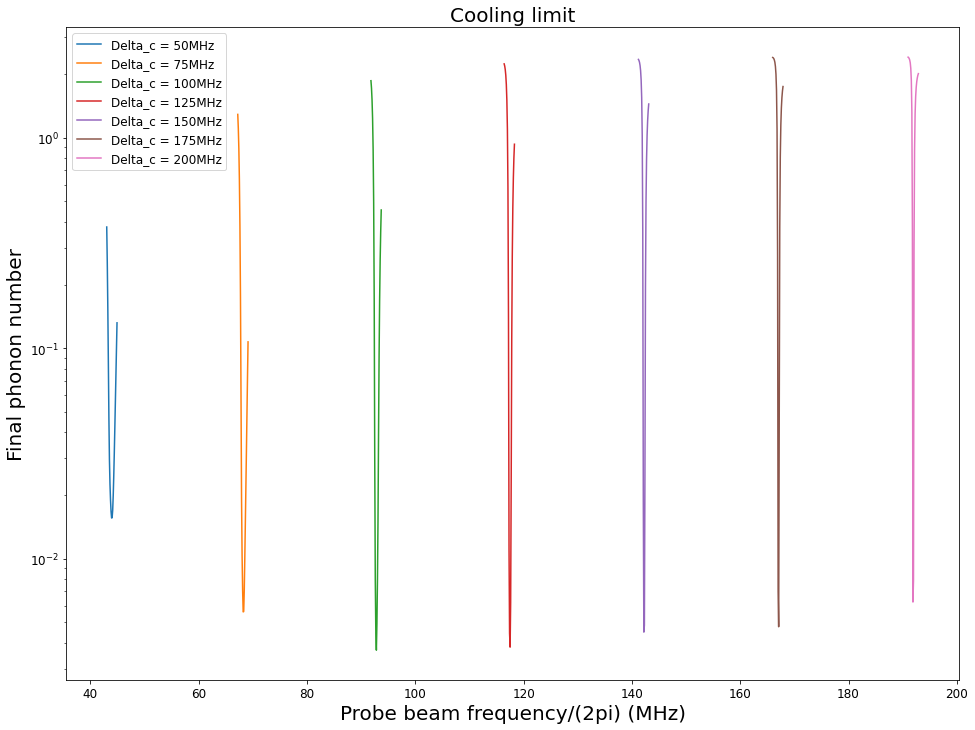

In [86]:
plt.figure(figsize = (16,12))
for i in range(len(Delta_c_list)):
    plt.plot(Deltap[i], [motion[i][j][-1] for j in range(len(motion[i]))], label = 'Delta_c = '+str(Delta_c_list[i])+'MHz')
plt.xlabel('Probe beam frequency/(2pi) (MHz)')
plt.ylabel('Final phonon number')
plt.title('Cooling limit')
plt.yscale('log')
plt.legend()
plt.show()

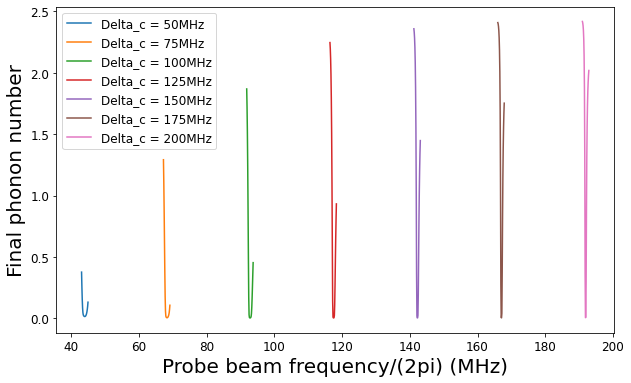

In [67]:
plt.figure(figsize = (10,6))
for i in range(len(Delta_c_list)):
    plt.plot(Deltap[i], [motion[i][j][-1] for j in range(len(motion[i]))], label = 'Delta_c = '+str(Delta_c_list[i])+'MHz')
plt.xlabel('Probe beam frequency/(2pi) (MHz)')
plt.ylabel('Final phonon number')
plt.legend()
plt.show()

In [68]:
Delta_p_sol = np.zeros(len(Delta_c_list))
motion_num = np.zeros(len(Delta_c_list))
for i in range(len(Delta_c_list)):
    [Delta_p_sol[i], motion_num[i]] = BestDetuning(Deltap[i], [motion[i][j][-1] for j in range(len(motion[i]))])
Delta_p_sol

array([ 43.9,  68.2,  92.8, 117.5, 142.2, 167.1, 191.9])

In [76]:
[Deltap[0][9], Deltap[1][10], Deltap[2][10], Deltap[3][11], Deltap[4][10], Deltap[5][11], Deltap[6][9]]

[43.900000000000055,
 68.19999999999997,
 92.79999999999997,
 117.49999999999996,
 142.19999999999987,
 167.09999999999988,
 191.8999999999999]

Text(0.5, 1.0, 'Cooling speed (log scale)')

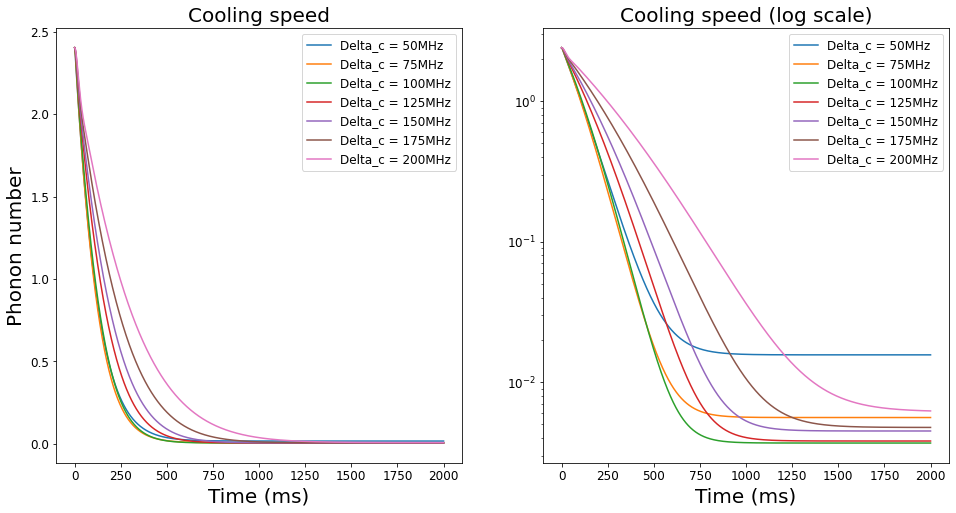

In [85]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,1)
ax.plot(tlist, motion[0][9], label = 'Delta_c = '+str(Delta_c_list[0])+'MHz')
ax.plot(tlist, motion[1][10], label = 'Delta_c = '+str(Delta_c_list[1])+'MHz')
ax.plot(tlist, motion[2][10], label = 'Delta_c = '+str(Delta_c_list[2])+'MHz')
ax.plot(tlist, motion[3][11], label = 'Delta_c = '+str(Delta_c_list[3])+'MHz')
ax.plot(tlist, motion[4][10], label = 'Delta_c = '+str(Delta_c_list[4])+'MHz')
ax.plot(tlist, motion[5][11], label = 'Delta_c = '+str(Delta_c_list[5])+'MHz')
ax.plot(tlist, motion[6][9], label = 'Delta_c = '+str(Delta_c_list[6])+'MHz')
ax.legend()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Phonon number')
ax.set_title('Cooling speed')
ax = fig.add_subplot(1,2,2)
ax.plot(tlist, motion[0][9], label = 'Delta_c = '+str(Delta_c_list[0])+'MHz')
ax.plot(tlist, motion[1][10], label = 'Delta_c = '+str(Delta_c_list[1])+'MHz')
ax.plot(tlist, motion[2][10], label = 'Delta_c = '+str(Delta_c_list[2])+'MHz')
ax.plot(tlist, motion[3][11], label = 'Delta_c = '+str(Delta_c_list[3])+'MHz')
ax.plot(tlist, motion[4][10], label = 'Delta_c = '+str(Delta_c_list[4])+'MHz')
ax.plot(tlist, motion[5][11], label = 'Delta_c = '+str(Delta_c_list[5])+'MHz')
ax.plot(tlist, motion[6][9], label = 'Delta_c = '+str(Delta_c_list[6])+'MHz')
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Time (ms)')
ax.set_title('Cooling speed (log scale)')

In [97]:
Delta_p_sol = np.array([ 43.9,  68.2,  92.8, 117.5, 142.2, 167.1, 191.9])
tlist = np.linspace(0, 2000, 2000)
motion_frequency_list = np.arange(1.8,2.2,0.05)
rho0 = tensor(ket2dm(basis(4,2)), thermal_dm(MaxPhonon, 3))

states_motion_scan = []
motionNum_motion_scan = []
cnt = 0
for Delta_c in Delta_c_list:    
    Delta_Minus = Delta_c+Zeeman
    Delta_Plus = Delta_c-Zeeman
    
    states_motion_scan_temp = []
    motionNum_motion_scan_temp = []
    Delta_p = Delta_p_sol[cnt]
    for nu in tqdm(motion_frequency_list):
        states_motion_scan_temp.append(DoubleEITWithIonMotion_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, 
                                                       Delta0, Delta_Minus, Delta_p, Delta_Plus, nu, 
                                                       eta_pi, eta_sigma, gammaSP).states)
        motionNum_motion_scan_temp.append([(tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))*state).tr() 
                         for state in states_motion_scan_temp[-1]])
        print('Delta_c = '+str(Delta_c)+' MHz, Delta_p = '+str(Delta_p)+' MHz, nu = '+str(nu)+' MHz')
        print('Final motional mode = '+str(motionNum_motion_scan_temp[-1][-1])+'\n')
    cnt+=1
    states_motion_scan.append(states_motion_scan_temp)
    motionNum_motion_scan.append(motionNum_motion_scan_temp)
    

 11%|█         | 1/9 [02:42<21:43, 162.89s/it]

Delta_c = 50 MHz, Delta_p = 43.9 MHz, nu = 1.8 MHz
Final motional mode = 0.023071445926771697



 22%|██▏       | 2/9 [05:31<19:24, 166.31s/it]

Delta_c = 50 MHz, Delta_p = 43.9 MHz, nu = 1.85 MHz
Final motional mode = 0.020630320913227224



 33%|███▎      | 3/9 [08:19<16:42, 167.04s/it]

Delta_c = 50 MHz, Delta_p = 43.9 MHz, nu = 1.9000000000000001 MHz
Final motional mode = 0.018598269791587234



 44%|████▍     | 4/9 [11:06<13:55, 167.03s/it]

Delta_c = 50 MHz, Delta_p = 43.9 MHz, nu = 1.9500000000000002 MHz
Final motional mode = 0.01693794507852807



 56%|█████▌    | 5/9 [13:57<11:13, 168.45s/it]

Delta_c = 50 MHz, Delta_p = 43.9 MHz, nu = 2.0 MHz
Final motional mode = 0.01562629033944341



 67%|██████▋   | 6/9 [16:52<08:31, 170.58s/it]

Delta_c = 50 MHz, Delta_p = 43.9 MHz, nu = 2.0500000000000003 MHz
Final motional mode = 0.01464474767414849



 78%|███████▊  | 7/9 [19:50<05:45, 172.95s/it]

Delta_c = 50 MHz, Delta_p = 43.9 MHz, nu = 2.1000000000000005 MHz
Final motional mode = 0.01397719141136433



 89%|████████▉ | 8/9 [22:48<02:54, 174.82s/it]

Delta_c = 50 MHz, Delta_p = 43.9 MHz, nu = 2.1500000000000004 MHz
Final motional mode = 0.013609405490277688



100%|██████████| 9/9 [25:42<00:00, 171.42s/it]


Delta_c = 50 MHz, Delta_p = 43.9 MHz, nu = 2.2 MHz
Final motional mode = 0.013528815703164998



 11%|█         | 1/9 [02:25<19:27, 145.98s/it]

Delta_c = 75 MHz, Delta_p = 68.2 MHz, nu = 1.8 MHz
Final motional mode = 0.010523308439651822



 22%|██▏       | 2/9 [04:52<17:04, 146.37s/it]

Delta_c = 75 MHz, Delta_p = 68.2 MHz, nu = 1.85 MHz
Final motional mode = 0.008609350957699557



 33%|███▎      | 3/9 [07:18<14:38, 146.35s/it]

Delta_c = 75 MHz, Delta_p = 68.2 MHz, nu = 1.9000000000000001 MHz
Final motional mode = 0.007208519867965756



 44%|████▍     | 4/9 [09:46<12:14, 146.88s/it]

Delta_c = 75 MHz, Delta_p = 68.2 MHz, nu = 1.9500000000000002 MHz
Final motional mode = 0.006212226911018369



 56%|█████▌    | 5/9 [12:14<09:48, 147.20s/it]

Delta_c = 75 MHz, Delta_p = 68.2 MHz, nu = 2.0 MHz
Final motional mode = 0.005593961793373642



 67%|██████▋   | 6/9 [14:41<07:21, 147.21s/it]

Delta_c = 75 MHz, Delta_p = 68.2 MHz, nu = 2.0500000000000003 MHz
Final motional mode = 0.005334698646769865



 78%|███████▊  | 7/9 [17:10<04:55, 147.67s/it]

Delta_c = 75 MHz, Delta_p = 68.2 MHz, nu = 2.1000000000000005 MHz
Final motional mode = 0.005417267475836091



 89%|████████▉ | 8/9 [19:37<02:27, 147.69s/it]

Delta_c = 75 MHz, Delta_p = 68.2 MHz, nu = 2.1500000000000004 MHz
Final motional mode = 0.005826027235440659



100%|██████████| 9/9 [22:07<00:00, 147.49s/it]


Delta_c = 75 MHz, Delta_p = 68.2 MHz, nu = 2.2 MHz
Final motional mode = 0.006546741557472734



 11%|█         | 1/9 [02:00<16:07, 120.95s/it]

Delta_c = 100 MHz, Delta_p = 92.8 MHz, nu = 1.8 MHz
Final motional mode = 0.007313580992063501



 22%|██▏       | 2/9 [04:02<14:09, 121.37s/it]

Delta_c = 100 MHz, Delta_p = 92.8 MHz, nu = 1.85 MHz
Final motional mode = 0.005395799799635316



 33%|███▎      | 3/9 [06:04<12:10, 121.67s/it]

Delta_c = 100 MHz, Delta_p = 92.8 MHz, nu = 1.9000000000000001 MHz
Final motional mode = 0.004250961771929454



 44%|████▍     | 4/9 [08:07<10:10, 122.07s/it]

Delta_c = 100 MHz, Delta_p = 92.8 MHz, nu = 1.9500000000000002 MHz
Final motional mode = 0.003696649425151252



 56%|█████▌    | 5/9 [10:09<08:09, 122.27s/it]

Delta_c = 100 MHz, Delta_p = 92.8 MHz, nu = 2.0 MHz
Final motional mode = 0.0036822424793613332



 67%|██████▋   | 6/9 [12:13<06:08, 122.71s/it]

Delta_c = 100 MHz, Delta_p = 92.8 MHz, nu = 2.0500000000000003 MHz
Final motional mode = 0.004165355869015424



 78%|███████▊  | 7/9 [14:17<04:06, 123.27s/it]

Delta_c = 100 MHz, Delta_p = 92.8 MHz, nu = 2.1000000000000005 MHz
Final motional mode = 0.005109143504399581



 89%|████████▉ | 8/9 [16:22<02:03, 123.77s/it]

Delta_c = 100 MHz, Delta_p = 92.8 MHz, nu = 2.1500000000000004 MHz
Final motional mode = 0.006486691749751335



100%|██████████| 9/9 [18:27<00:00, 123.07s/it]


Delta_c = 100 MHz, Delta_p = 92.8 MHz, nu = 2.2 MHz
Final motional mode = 0.008355347318903082



 11%|█         | 1/9 [02:49<22:37, 169.72s/it]

Delta_c = 125 MHz, Delta_p = 117.5 MHz, nu = 1.8 MHz
Final motional mode = 0.01048385373634569



 22%|██▏       | 2/9 [05:39<19:48, 169.74s/it]

Delta_c = 125 MHz, Delta_p = 117.5 MHz, nu = 1.85 MHz
Final motional mode = 0.005637458601984974



 33%|███▎      | 3/9 [08:29<16:59, 169.89s/it]

Delta_c = 125 MHz, Delta_p = 117.5 MHz, nu = 1.9000000000000001 MHz
Final motional mode = 0.0041010424427796064



 44%|████▍     | 4/9 [11:20<14:10, 170.16s/it]

Delta_c = 125 MHz, Delta_p = 117.5 MHz, nu = 1.9500000000000002 MHz
Final motional mode = 0.003536088941556734



 56%|█████▌    | 5/9 [14:13<11:24, 171.25s/it]

Delta_c = 125 MHz, Delta_p = 117.5 MHz, nu = 2.0 MHz
Final motional mode = 0.0038062977452220062



 67%|██████▋   | 6/9 [17:06<08:35, 171.75s/it]

Delta_c = 125 MHz, Delta_p = 117.5 MHz, nu = 2.0500000000000003 MHz
Final motional mode = 0.004821694235979855



 78%|███████▊  | 7/9 [19:57<05:43, 171.80s/it]

Delta_c = 125 MHz, Delta_p = 117.5 MHz, nu = 2.1000000000000005 MHz
Final motional mode = 0.006636276603184747



 89%|████████▉ | 8/9 [22:53<02:53, 173.03s/it]

Delta_c = 125 MHz, Delta_p = 117.5 MHz, nu = 2.1500000000000004 MHz
Final motional mode = 0.01114924602067542



100%|██████████| 9/9 [25:25<00:00, 169.50s/it]


Delta_c = 125 MHz, Delta_p = 117.5 MHz, nu = 2.2 MHz
Final motional mode = 0.02611058829770367



 11%|█         | 1/9 [04:28<35:45, 268.19s/it]

Delta_c = 150 MHz, Delta_p = 142.2 MHz, nu = 1.8 MHz
Final motional mode = 0.3727976731862717



 22%|██▏       | 2/9 [08:57<31:20, 268.58s/it]

Delta_c = 150 MHz, Delta_p = 142.2 MHz, nu = 1.85 MHz
Final motional mode = 0.11890887189132648



 33%|███▎      | 3/9 [13:27<26:55, 269.22s/it]

Delta_c = 150 MHz, Delta_p = 142.2 MHz, nu = 1.9000000000000001 MHz
Final motional mode = 0.019062935129140954



 44%|████▍     | 4/9 [17:54<22:23, 268.63s/it]

Delta_c = 150 MHz, Delta_p = 142.2 MHz, nu = 1.9500000000000002 MHz
Final motional mode = 0.006250210482008654



 56%|█████▌    | 5/9 [22:22<17:52, 268.18s/it]

Delta_c = 150 MHz, Delta_p = 142.2 MHz, nu = 2.0 MHz
Final motional mode = 0.00448543857662179



 67%|██████▋   | 6/9 [26:50<13:24, 268.22s/it]

Delta_c = 150 MHz, Delta_p = 142.2 MHz, nu = 2.0500000000000003 MHz
Final motional mode = 0.0042293310218762216



 78%|███████▊  | 7/9 [31:17<08:55, 267.98s/it]

Delta_c = 150 MHz, Delta_p = 142.2 MHz, nu = 2.1000000000000005 MHz
Final motional mode = 0.005213810407258024



 89%|████████▉ | 8/9 [35:46<04:28, 268.12s/it]

Delta_c = 150 MHz, Delta_p = 142.2 MHz, nu = 2.1500000000000004 MHz
Final motional mode = 0.008367072247772672



100%|██████████| 9/9 [40:14<00:00, 268.26s/it]


Delta_c = 150 MHz, Delta_p = 142.2 MHz, nu = 2.2 MHz
Final motional mode = 0.027524104442375723



 11%|█         | 1/9 [03:30<28:07, 210.90s/it]

Delta_c = 175 MHz, Delta_p = 167.1 MHz, nu = 1.8 MHz
Final motional mode = 0.28839722588448086



 22%|██▏       | 2/9 [07:02<24:41, 211.60s/it]

Delta_c = 175 MHz, Delta_p = 167.1 MHz, nu = 1.85 MHz
Final motional mode = 0.046517966738100484



 33%|███▎      | 3/9 [10:35<21:12, 212.13s/it]

Delta_c = 175 MHz, Delta_p = 167.1 MHz, nu = 1.9000000000000001 MHz
Final motional mode = 0.006631294392263452



 44%|████▍     | 4/9 [14:10<17:45, 213.14s/it]

Delta_c = 175 MHz, Delta_p = 167.1 MHz, nu = 1.9500000000000002 MHz
Final motional mode = 0.0045741851555630006



 56%|█████▌    | 5/9 [17:45<14:15, 213.87s/it]

Delta_c = 175 MHz, Delta_p = 167.1 MHz, nu = 2.0 MHz
Final motional mode = 0.004755811595158046



 67%|██████▋   | 6/9 [21:22<10:44, 214.83s/it]

Delta_c = 175 MHz, Delta_p = 167.1 MHz, nu = 2.0500000000000003 MHz
Final motional mode = 0.00786667196599684



 78%|███████▊  | 7/9 [25:00<07:12, 216.06s/it]

Delta_c = 175 MHz, Delta_p = 167.1 MHz, nu = 2.1000000000000005 MHz
Final motional mode = 0.04395617557224255



 89%|████████▉ | 8/9 [28:42<03:37, 217.83s/it]

Delta_c = 175 MHz, Delta_p = 167.1 MHz, nu = 2.1500000000000004 MHz
Final motional mode = 0.17655574183246106



100%|██████████| 9/9 [32:23<00:00, 215.89s/it]


Delta_c = 175 MHz, Delta_p = 167.1 MHz, nu = 2.2 MHz
Final motional mode = 0.3898107684574469



 11%|█         | 1/9 [05:30<44:04, 330.54s/it]

Delta_c = 200 MHz, Delta_p = 191.9 MHz, nu = 1.8 MHz
Final motional mode = 1.3355764740133957



 22%|██▏       | 2/9 [11:02<38:37, 331.14s/it]

Delta_c = 200 MHz, Delta_p = 191.9 MHz, nu = 1.85 MHz
Final motional mode = 0.8857744387429707



 33%|███▎      | 3/9 [16:31<33:00, 330.12s/it]

Delta_c = 200 MHz, Delta_p = 191.9 MHz, nu = 1.9000000000000001 MHz
Final motional mode = 0.3690322944762937



 44%|████▍     | 4/9 [21:59<27:26, 329.36s/it]

Delta_c = 200 MHz, Delta_p = 191.9 MHz, nu = 1.9500000000000002 MHz
Final motional mode = 0.04597589357828927



 56%|█████▌    | 5/9 [27:26<21:53, 328.44s/it]

Delta_c = 200 MHz, Delta_p = 191.9 MHz, nu = 2.0 MHz
Final motional mode = 0.006232532706024664



 67%|██████▋   | 6/9 [32:54<16:25, 328.36s/it]

Delta_c = 200 MHz, Delta_p = 191.9 MHz, nu = 2.0500000000000003 MHz
Final motional mode = 0.0051720441007408234



 78%|███████▊  | 7/9 [38:31<11:02, 331.15s/it]

Delta_c = 200 MHz, Delta_p = 191.9 MHz, nu = 2.1000000000000005 MHz
Final motional mode = 0.00838835787070744



 89%|████████▉ | 8/9 [44:01<05:30, 330.76s/it]

Delta_c = 200 MHz, Delta_p = 191.9 MHz, nu = 2.1500000000000004 MHz
Final motional mode = 0.0755107830082642



100%|██████████| 9/9 [49:35<00:00, 330.63s/it]

Delta_c = 200 MHz, Delta_p = 191.9 MHz, nu = 2.2 MHz
Final motional mode = 0.30825242794444707



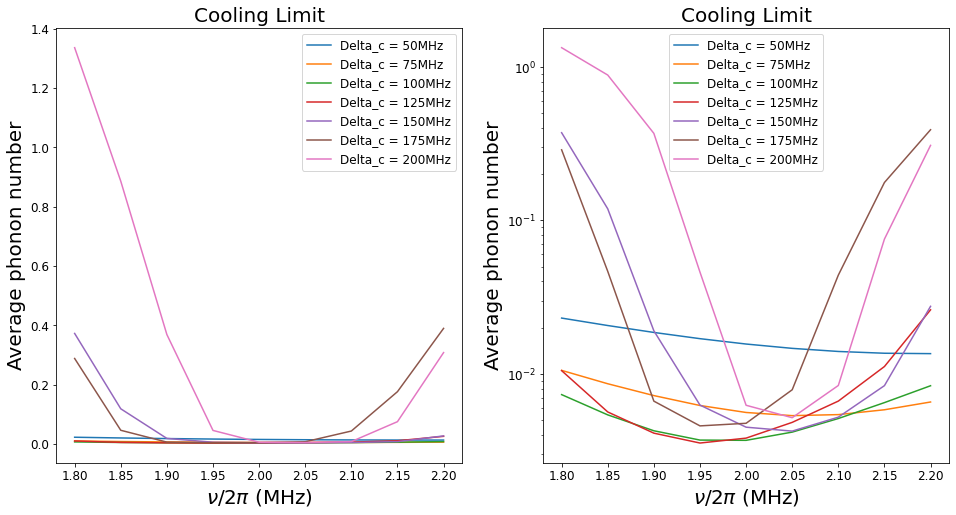

In [99]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
for i in range(len(Delta_c_list)):
    ax.plot(motion_frequency_list, [motionNum_motion_scan[i][j][-1] for j in range(len(motionNum_motion_scan[i]))], 
        label='Delta_c = '+str(Delta_c_list[i])+'MHz')
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(1,2,2)
for i in range(len(Delta_c_list)):
    ax.plot(motion_frequency_list, [motionNum_motion_scan[i][j][-1] for j in range(len(motionNum_motion_scan[i]))], 
        label='Delta_c = '+str(Delta_c_list[i])+'MHz')
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');
ax.set_yscale('log')
plt.savefig('EIT_motion_freq_c.png', format='png', dpi=1200)

## Two probe beams

In [265]:
def DoubleEITNoMotion_cryo_2probe_mesolve(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, 
                                     Delta_3, OmegaPi2, delta_wp, gammaSP):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()\
            - OmegaPi*basis(4,2)*basis(4,0).dag()\
            + Omega_Plus*basis(4,3)*basis(4,0).dag()
    H0 = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() \
        + Delta1*basis(4,1)*basis(4,1).dag() \
        + Delta2*basis(4,2)*basis(4,2).dag() \
        + Delta_3*basis(4,3)*basis(4,3).dag() 
    
    H1 = - OmegaPi2*basis(4,2)*basis(4,0).dag()
    def H1_coeff(t, args):
        return np.exp(1j * delta_wp * t) 
    
    H2 = - OmegaPi2*basis(4,0)*basis(4,2).dag()
    def H2_coeff(t, args):
        return np.exp(-1j * delta_wp * t) 
    
    H = [H0, [H1, H1_coeff], [H2, H2_coeff]]
    
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]
    e_ops = [basis(4,0)*basis(4,0).dag(), basis(4,1)*basis(4,1).dag(), 
             basis(4,2)*basis(4,2).dag(), basis(4,3)*basis(4,3).dag()]
    opts = Options(store_states=True)
    output = mesolve(H, rho0, t, c_ops, e_ops, options=opts)
    return output


def DoubleEITNoIonMotion_cryo_mesolve_2probe(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, 
                                         Omega_Minus2, Delta0, Delta1, Delta2, Delta_3, delta_dp, 
                                         Omega_Plus2_2, Omega_Minus2_2, OmegaPi2, delta_wp,gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()\
            - OmegaPi*basis(4,2)*basis(4,0).dag()\
            + Omega_Plus*basis(4,3)*basis(4,0).dag()
    H0 = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() \
        + Delta1*basis(4,1)*basis(4,1).dag() \
        + Delta2*basis(4,2)*basis(4,2).dag() \
        + Delta_3*basis(4,3)*basis(4,3).dag() 
    
    H1 = - OmegaPi2*basis(4,2)*basis(4,0).dag()
    def H1_coeff(t, args):
        return np.exp(1j * delta_wp * t) 
    
    H1d = - OmegaPi2*basis(4,0)*basis(4,2).dag()
    def H1d_coeff(t, args):
        return np.exp(-1j * delta_wp * t) 
    
    H_time1 = basis(4,1)*basis(4,0).dag()
    def H_time1_coeff(t, args):
        return Omega_Minus2*np.exp(-1j * delta_dp * t) + \
                Omega_Minus2_2*np.exp(-1j * (delta_dp - delta_wp) * t) ## delta_dp should be negative
    H_time2 = basis(4,0)*basis(4,1).dag()
    def H_time2_coeff(t, args):
        return Omega_Minus2*np.exp(1j * delta_dp * t) + \
                Omega_Minus2_2*np.exp(1j * (delta_dp - delta_wp) * t)
    H_time3 = basis(4,3)*basis(4,0).dag()
    def H_time3_coeff(t, args):
        return Omega_Plus2*np.exp(-1j * delta_dp * t) + \
                Omega_Plus2_2* np.exp(-1j * (delta_dp - delta_wp) * t) 
    H_time4 = basis(4,0)*basis(4,3).dag()
    def H_time4_coeff(t, args):
        return Omega_Plus2*np.exp(1j * delta_dp * t) + \
                Omega_Plus2_2* np.exp(1j * (delta_dp - delta_wp) * t) 
    
    #solve the steady state
    H_full = [H0,[H_time1, H_time1_coeff],[H_time2, H_time2_coeff],
              [H_time3, H_time3_coeff],[H_time4, H_time4_coeff],
             [H1, H1_coeff], [H1d, H1d_coeff]]
    
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]
    e_ops = [basis(4,0)*basis(4,0).dag(), basis(4,1)*basis(4,1).dag(), 
             basis(4,2)*basis(4,2).dag(), basis(4,3)*basis(4,3).dag()]
    opts = Options(store_states=True)
    output = mesolve(H_full, rho0, t, c_ops, e_ops, options=opts)
    return output

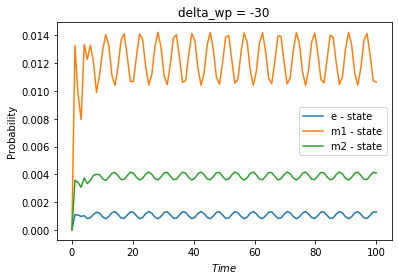

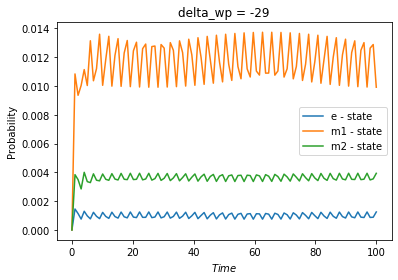

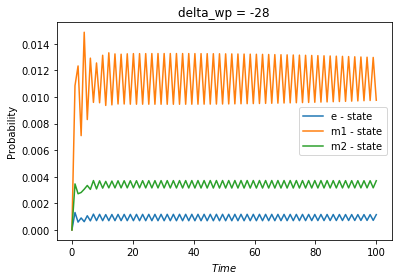

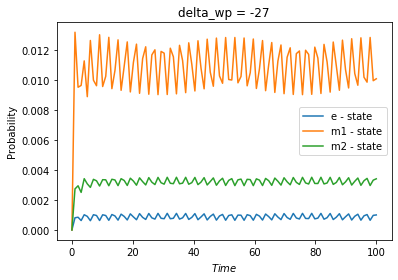

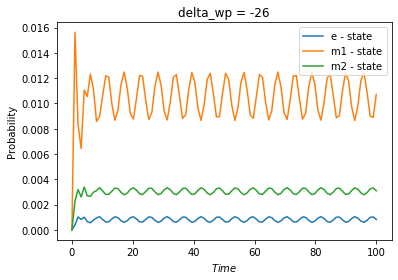

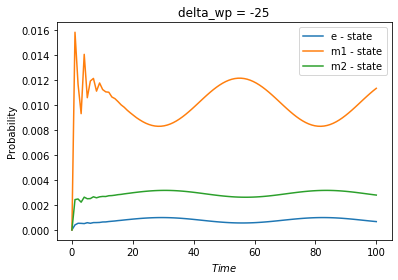

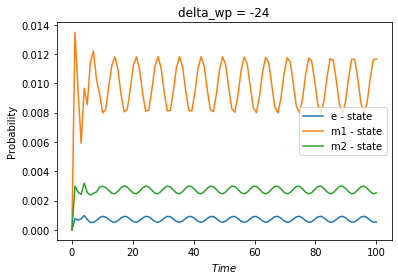

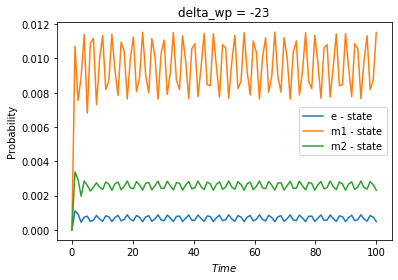

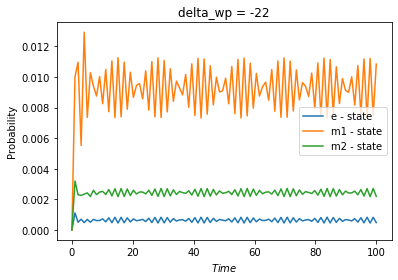

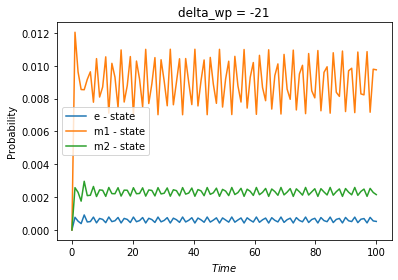

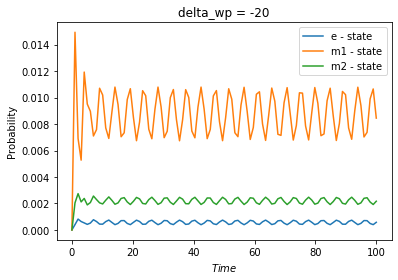

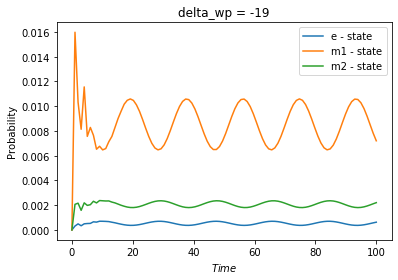

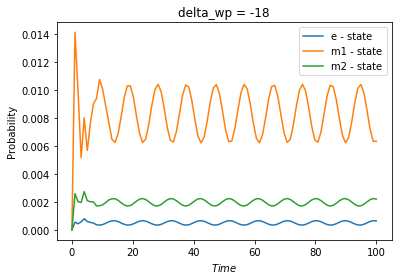

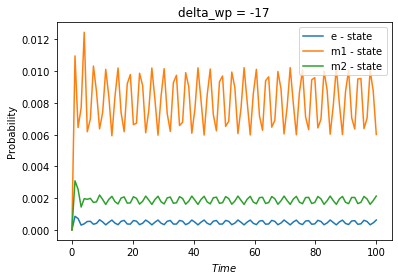

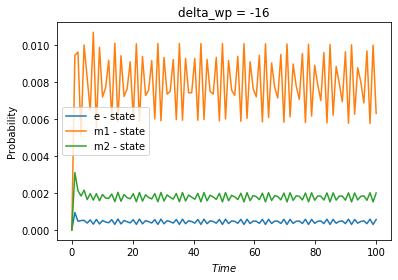

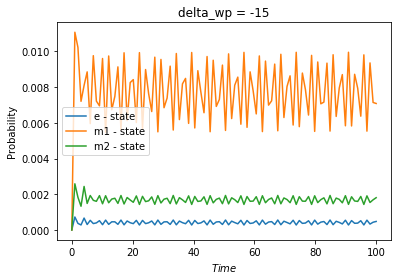

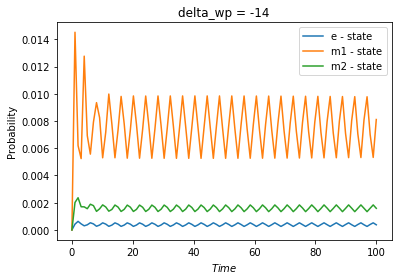

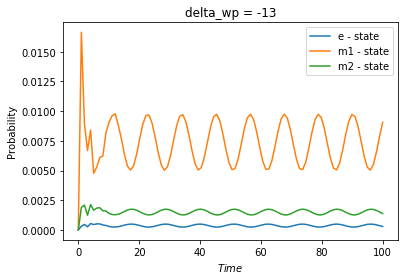

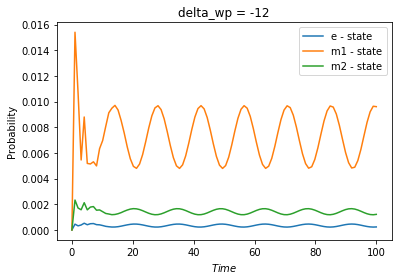

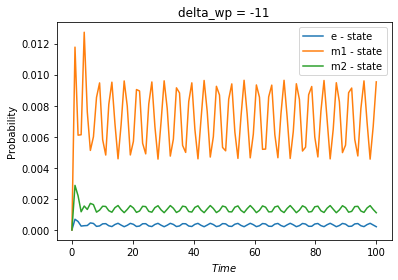

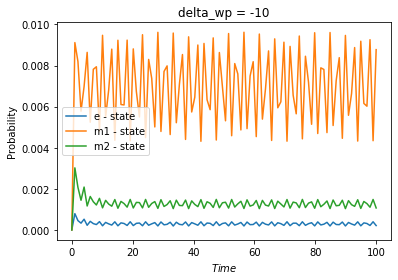

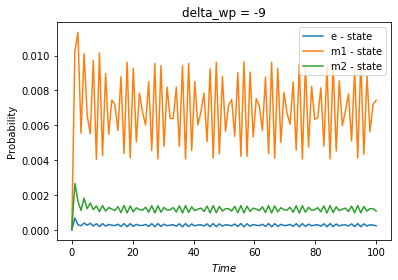

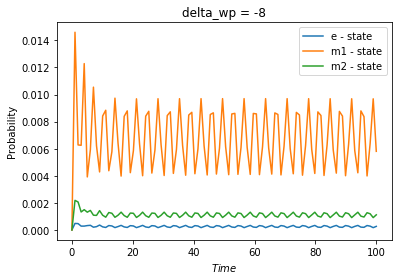

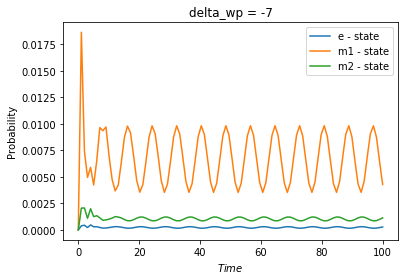

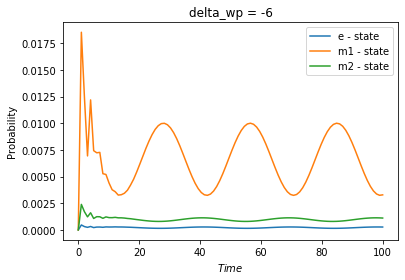

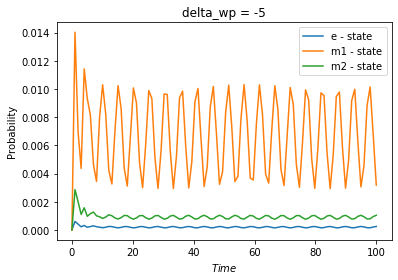

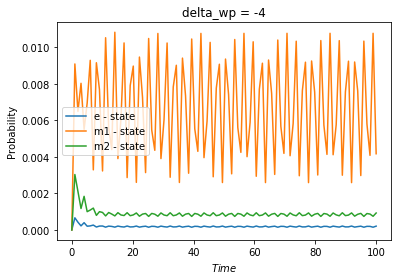

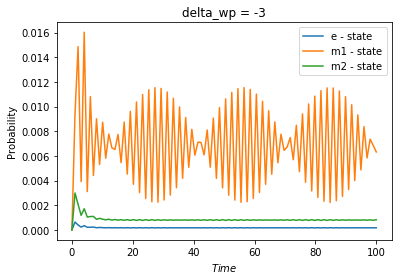

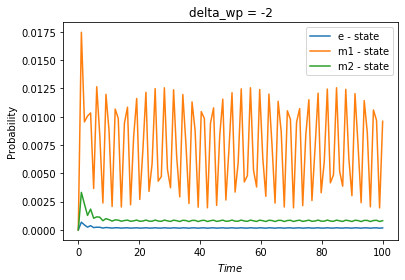

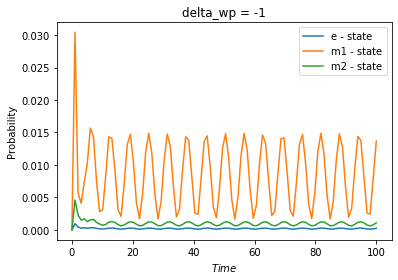

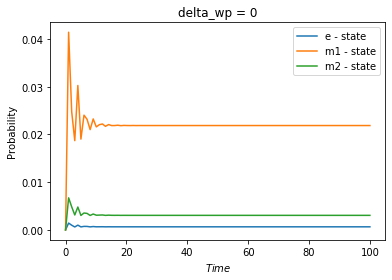

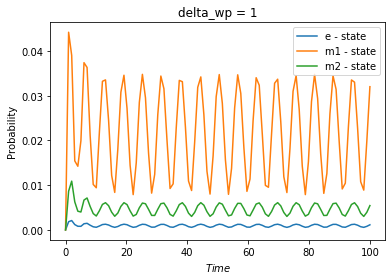

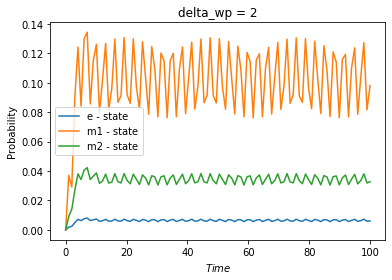

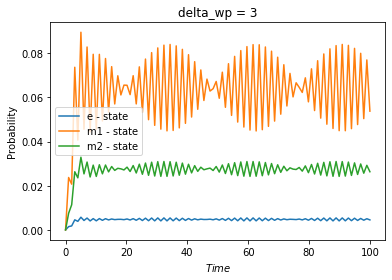

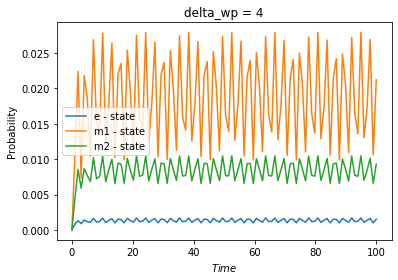

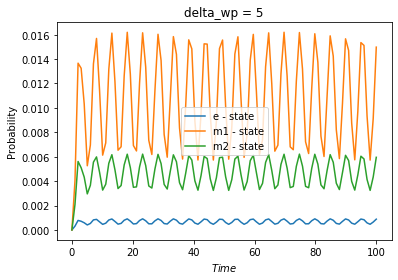

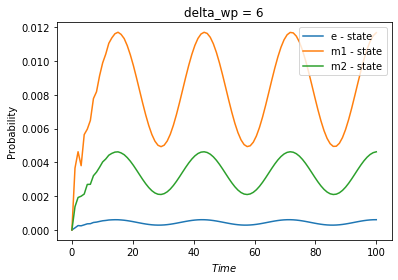

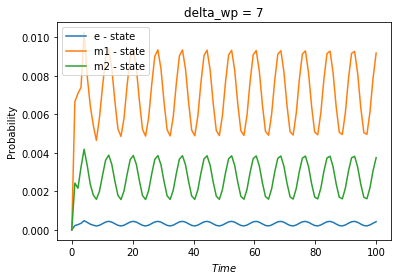

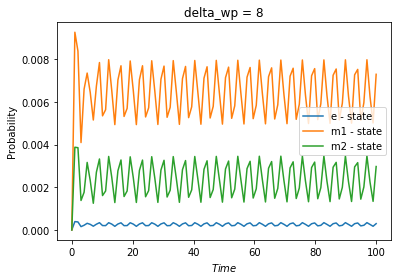

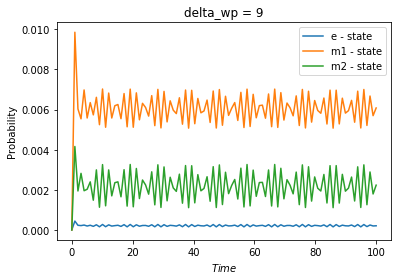

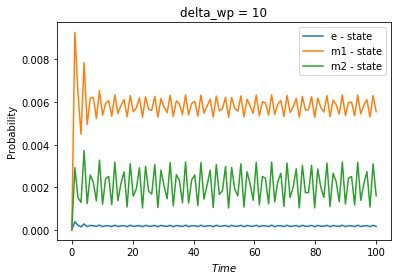

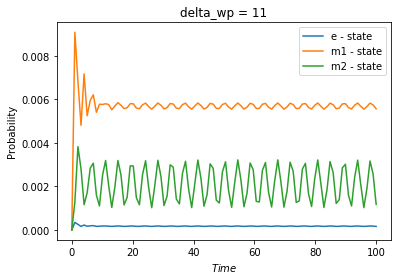

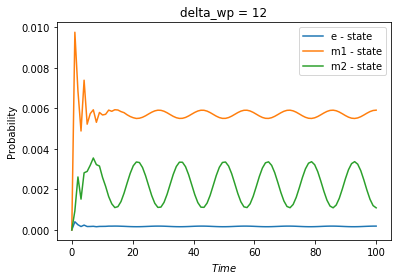

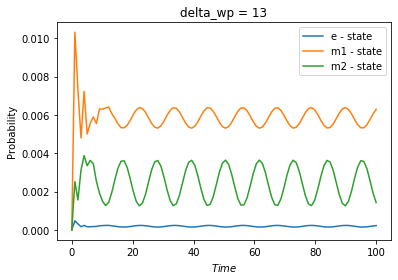

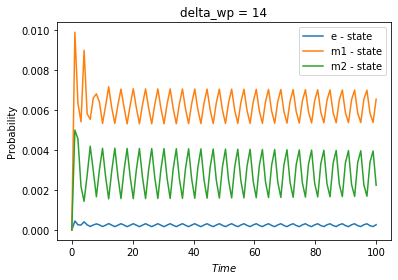

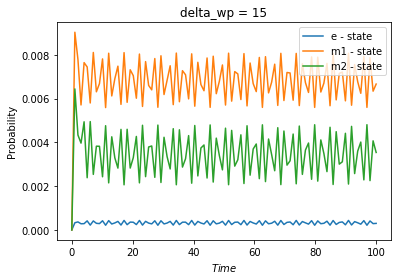

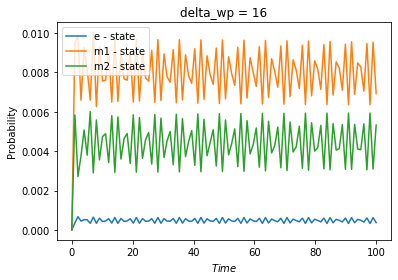

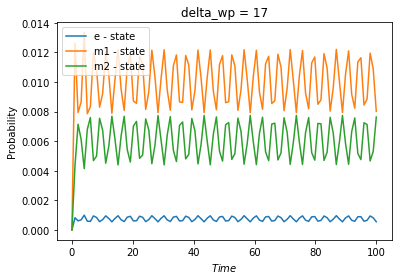

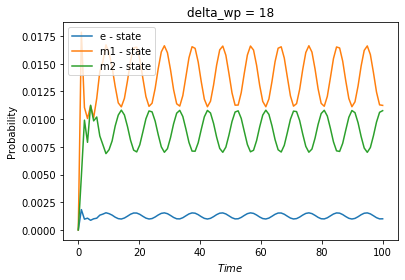

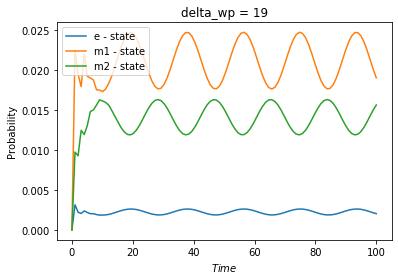

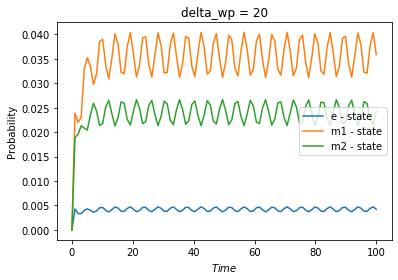

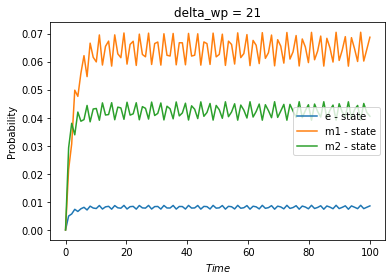

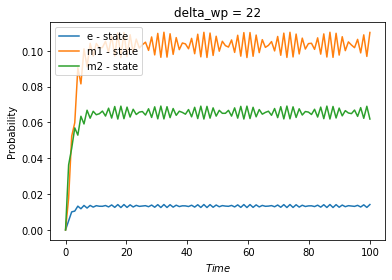

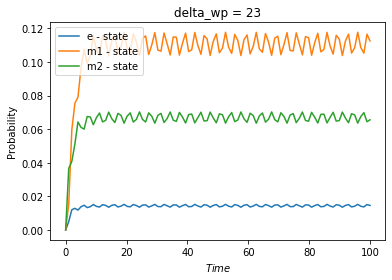

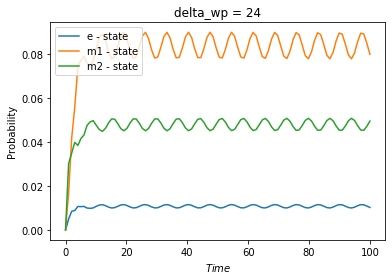

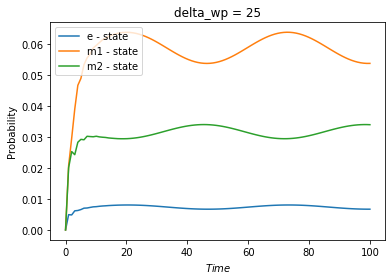

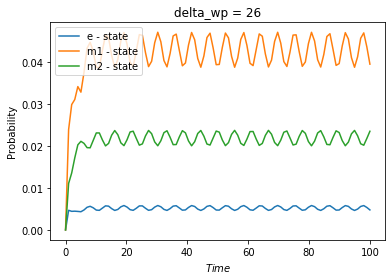

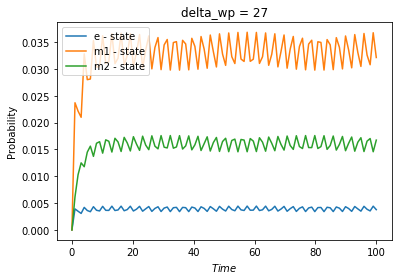

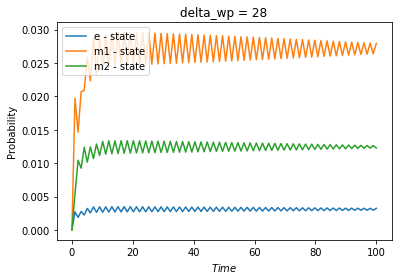

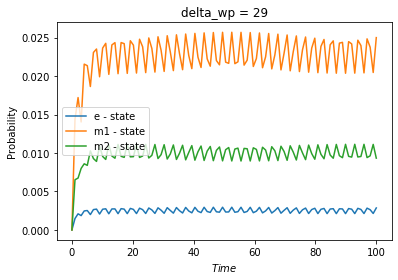

In [255]:
gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7/2
OmegaPi2 = 1.7/2
Omega_Minus = 23

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 50 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman

#Delta_ps = [-16, 48, 68.5]
Delta_ps = [45.6]
delta_wps = np.arange(-30, 30, 1)

final_g = np.zeros((3,len(delta_wps)))
final_e = np.zeros((3,len(delta_wps)))
final_m1 = np.zeros((3,len(delta_wps)))
final_m2 = np.zeros((3,len(delta_wps)))

cnt_n = 0
for delta_wp in delta_wps:
    cnt_m = 0
    for Delta_p in Delta_ps:
        tlist = np.linspace(0,100,100)
        rho0 = ket2dm(basis(4,2))
        states = DoubleEITNoMotion_2probe_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, 
                                        Delta0, Delta_Minus, Delta_p, Delta_Plus, OmegaPi2, delta_wp, gammaSP)
        final_e[cnt_m][cnt_n] =  states.expect[0][-1]
        final_m1[cnt_m][cnt_n] =  states.expect[1][-1]
        final_g[cnt_m][cnt_n] =  states.expect[2][-1]
        final_m2[cnt_m][cnt_n] =  states.expect[3][-1]
        cnt_m+=1
        
        plt.figure()
        plt.plot(tlist, states.expect[0], label = 'e - state')
        plt.plot(tlist, states.expect[1], label = 'm1 - state')
#         plt.plot(tlist, states.expect[2], label = 'g - state')
        plt.plot(tlist, states.expect[3], label = 'm2 - state')
        plt.xlabel('$Time$')
        plt.ylabel('Probability')
        plt.title('delta_wp = '+str(delta_wp))
        plt.legend()
        plt.show()

    cnt_n+=1

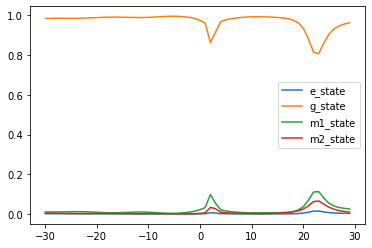

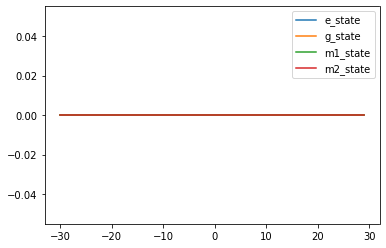

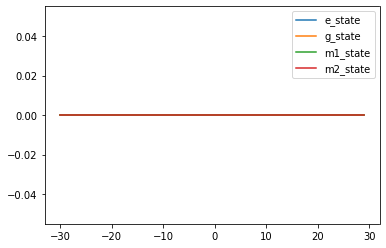

In [256]:
delta_wps = np.arange(-30, 30, 1)
plt.plot(delta_wps, final_e[0], label = 'e_state')
plt.plot(delta_wps, final_g[0], label = 'g_state')
plt.plot(delta_wps, final_m1[0], label = 'm1_state')
plt.plot(delta_wps, final_m2[0], label = 'm2_state')
plt.legend()
plt.show()
plt.plot(delta_wps, final_e[1], label = 'e_state')
plt.plot(delta_wps, final_g[1], label = 'g_state')
plt.plot(delta_wps, final_m1[1], label = 'm1_state')
plt.plot(delta_wps, final_m2[1], label = 'm2_state')
plt.legend()
plt.show()
plt.plot(delta_wps, final_e[2], label = 'e_state')
plt.plot(delta_wps, final_g[2], label = 'g_state')
plt.plot(delta_wps, final_m1[2], label = 'm1_state')
plt.plot(delta_wps, final_m2[2], label = 'm2_state')
plt.legend()
plt.show()

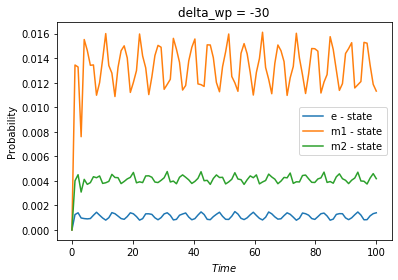

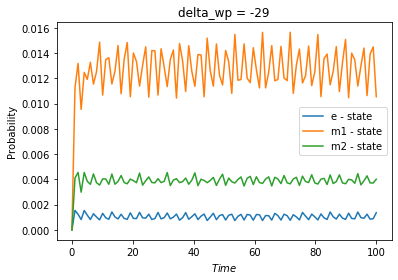

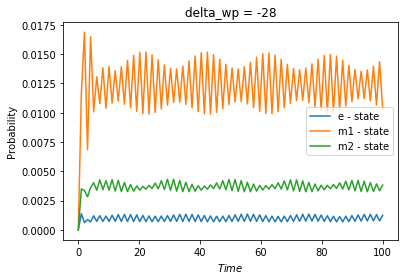

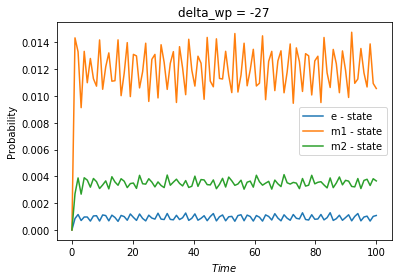

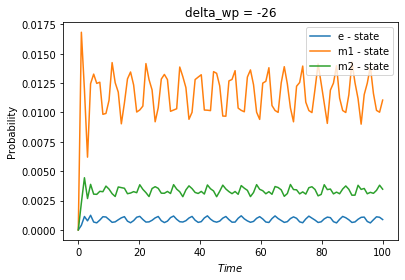

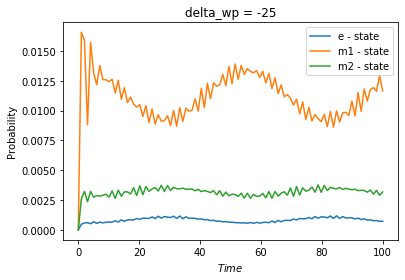

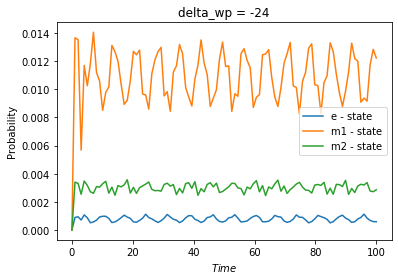

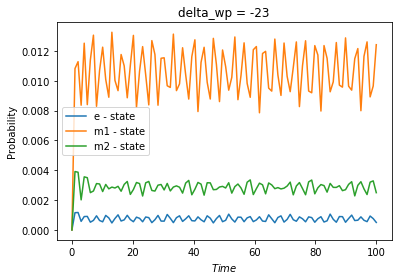

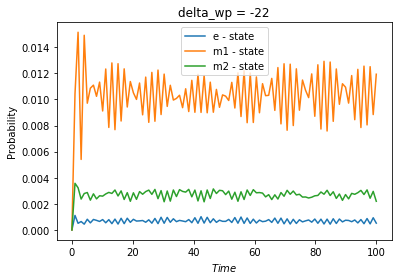

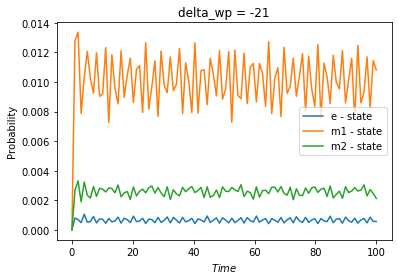

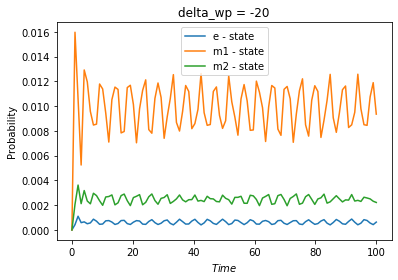

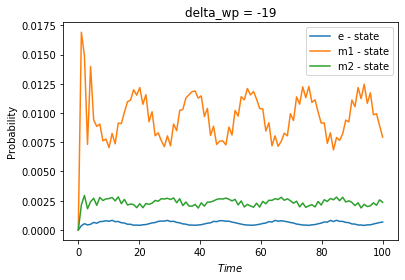

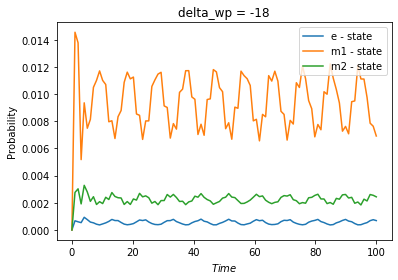

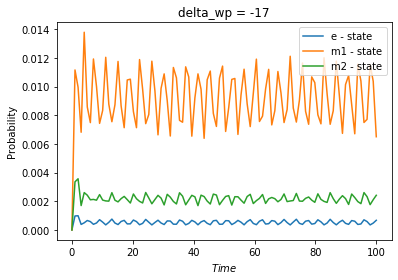

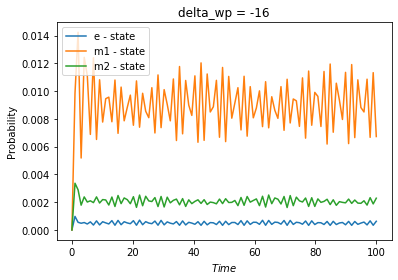

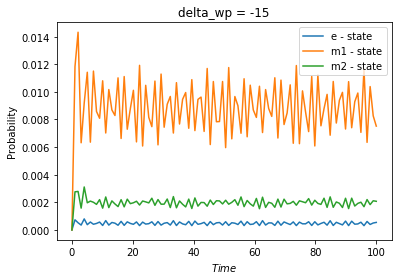

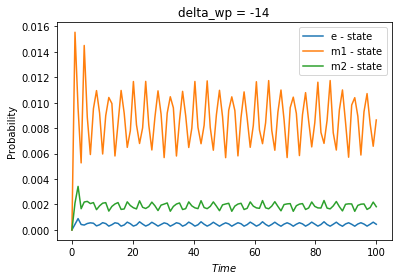

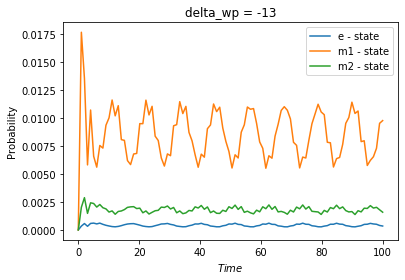

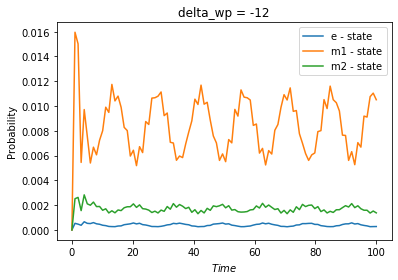

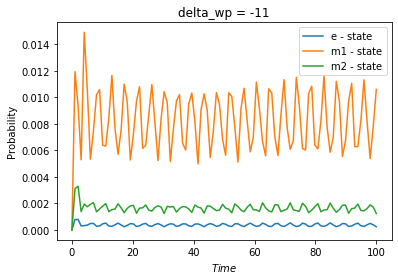

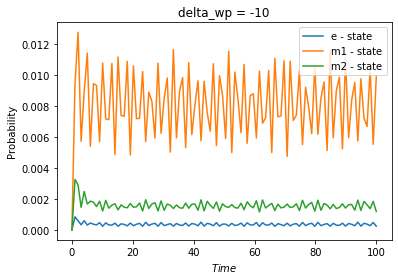

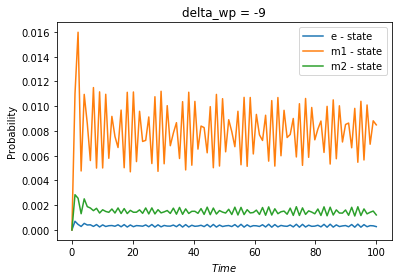

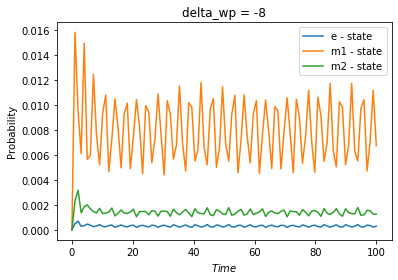

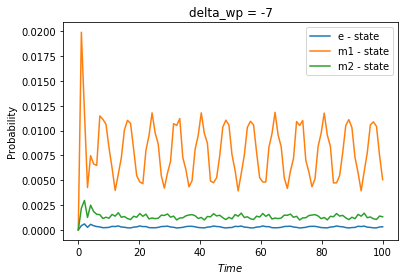

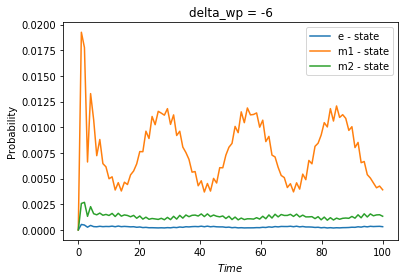

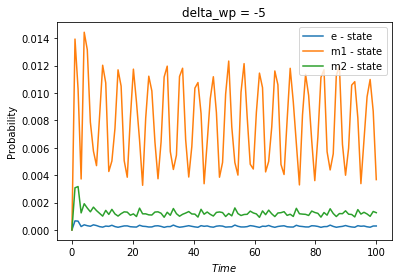

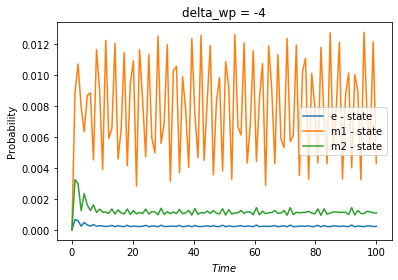

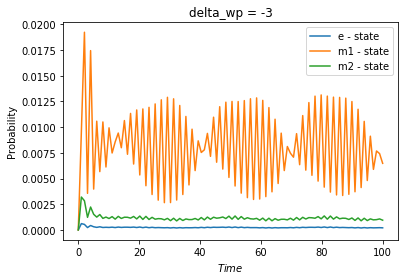

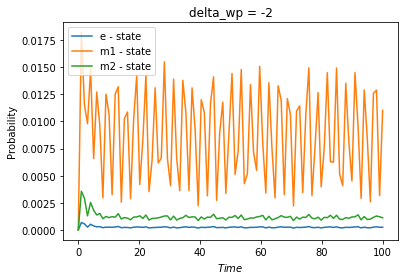

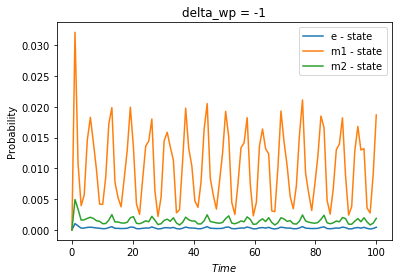

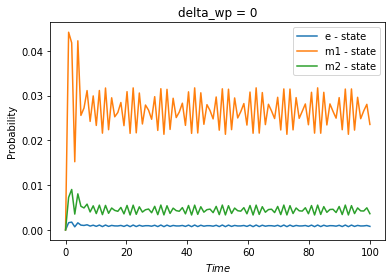

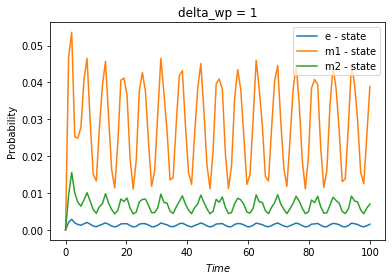

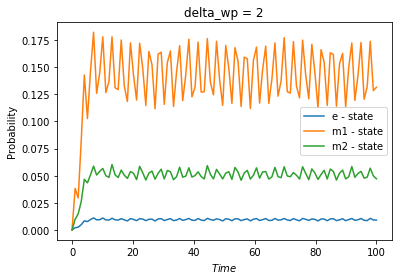

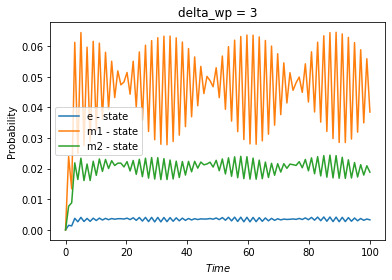

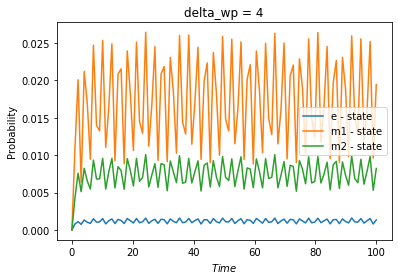

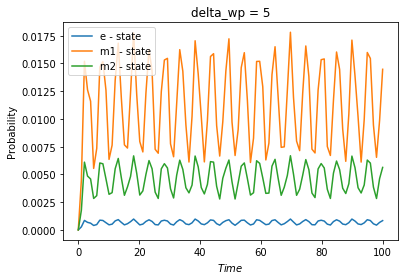

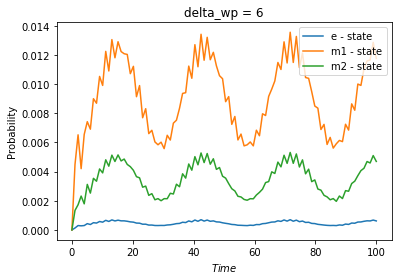

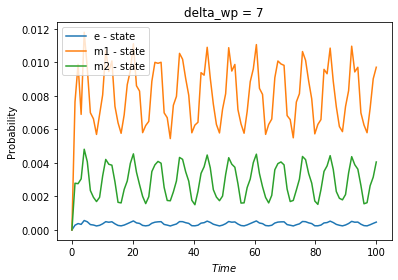

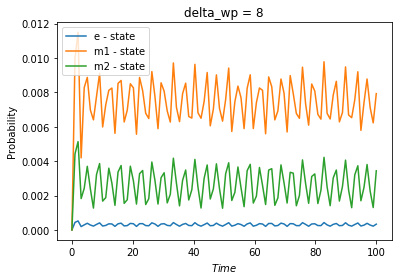

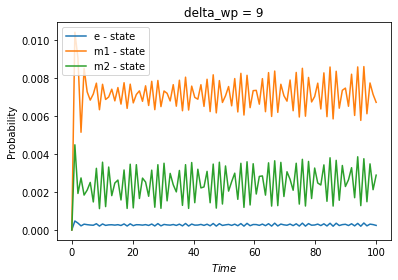

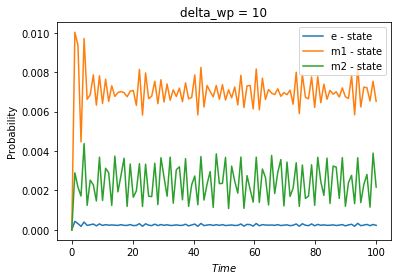

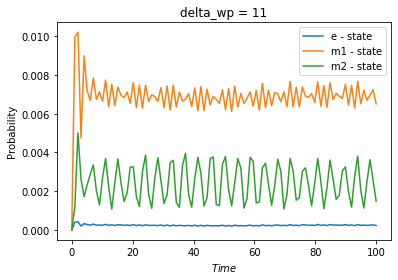

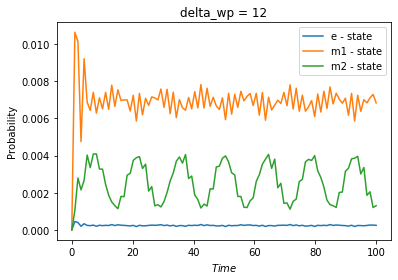

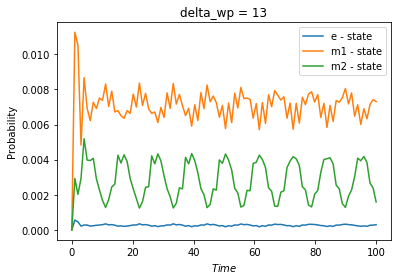

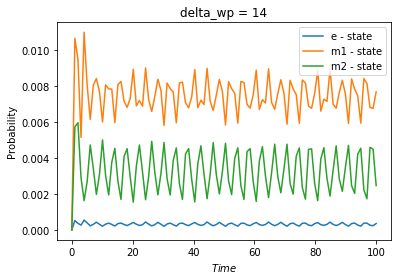

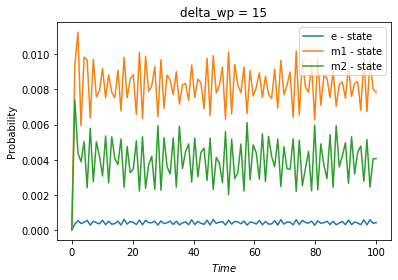

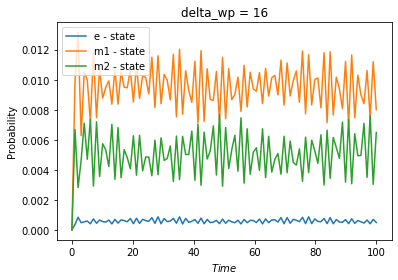

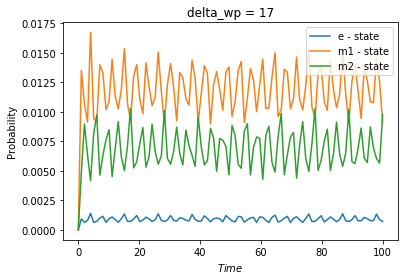

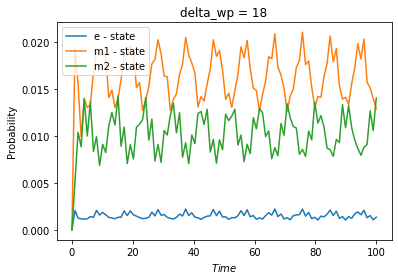

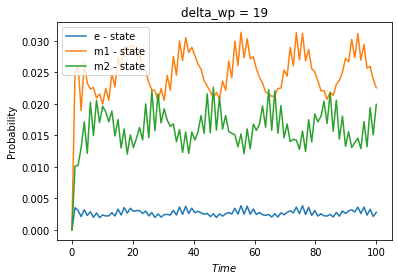

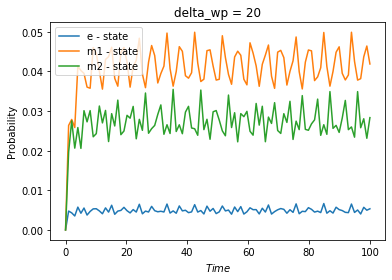

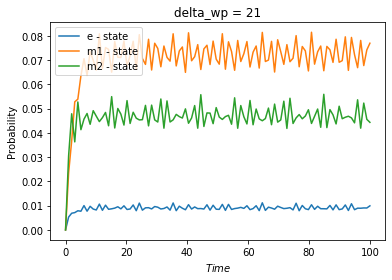

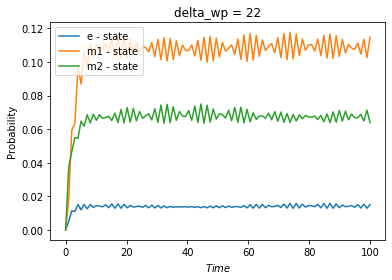

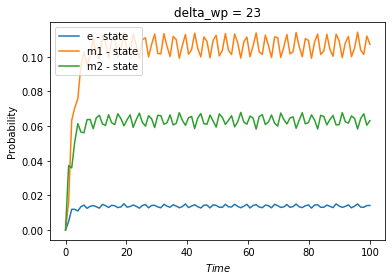

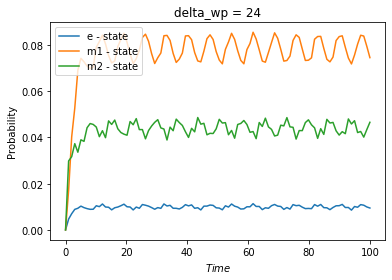

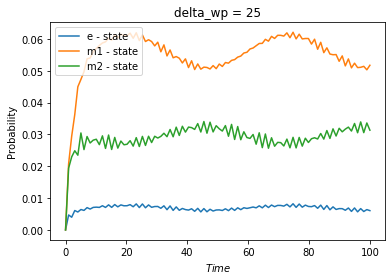

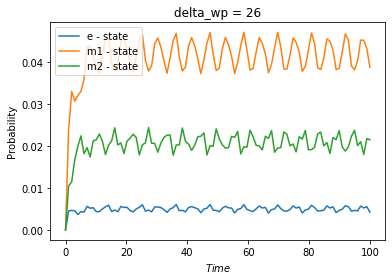

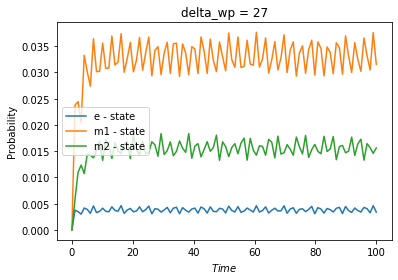

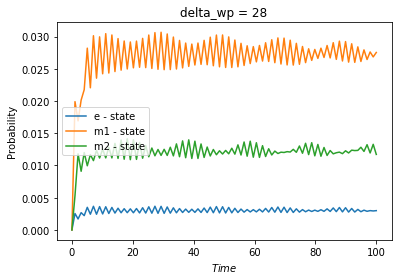

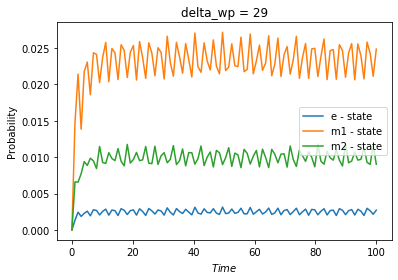

In [260]:
gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7/2
Omega_Minus = 23
Omega_Plus2 = 0.85/2
Omega_Minus2 = 0.85/2
OmegaPi2 = 1.7/2
Omega_Plus2_2 = 0.85/2
Omega_Minus2_2 = 0.85/2

Delta = 50 # pumping beam detuning
Zeeman = 7 # Zeeman shift
Delta_Minus = Delta-Zeeman
Delta_Plus = Delta+Zeeman
Delta_P = -Delta

# Delta_ps = [-16, 48, 68.5]
Delta_ps = [45.8]
delta_wps = np.arange(-30, 30, 1)

final_g = np.zeros((len(Delta_ps),len(delta_wps)))
final_e = np.zeros((len(Delta_ps),len(delta_wps)))
final_m1 = np.zeros((len(Delta_ps),len(delta_wps)))
final_m2 = np.zeros((len(Delta_ps),len(delta_wps)))

cnt_n = 0
for delta_wp in delta_wps:
    cnt_m = 0
    for Delta_p in Delta_ps:
        delta_dp = Delta_Minus - Delta_p
        tlist = np.linspace(0,100,100)
        rho0 = ket2dm(basis(4,2))
        states = DoubleEITNoIonMotion_cryo_mesolve_2probe(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, 
                                   Delta0, Delta_Minus, Delta_p, Delta_Plus, delta_dp, 
                                   Omega_Plus2_2, Omega_Minus2_2, OmegaPi2, delta_wp, 
                                   gammaSP)
        final_e[cnt_m][cnt_n] =  states.expect[0][-1]
        final_m1[cnt_m][cnt_n] =  states.expect[1][-1]
        final_g[cnt_m][cnt_n] =  states.expect[2][-1]
        final_m2[cnt_m][cnt_n] =  states.expect[3][-1]
        cnt_m+=1
        
        plt.figure()
        plt.plot(tlist, states.expect[0], label = 'e - state')
        plt.plot(tlist, states.expect[1], label = 'm1 - state')
#         plt.plot(tlist, states.expect[2], label = 'g - state')
        plt.plot(tlist, states.expect[3], label = 'm2 - state')
        plt.xlabel('$Time$')
        plt.ylabel('Probability')
        plt.title('delta_wp = '+str(delta_wp))
        plt.legend()
        plt.show()

    cnt_n+=1

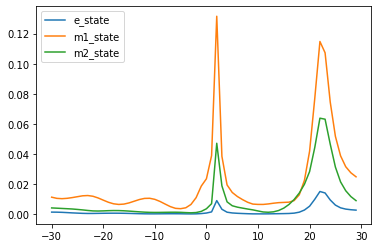

In [266]:
for i in range(len(final_e)):
    plt.plot(delta_wps, final_e[i], label = 'e_state')
    # plt.plot(delta_wps, final_g[i], label = 'g_state')
    plt.plot(delta_wps, final_m1[i], label = 'm1_state')
    plt.plot(delta_wps, final_m2[i], label = 'm2_state')
    plt.legend()
    plt.show()

In [270]:
def DoubleEITWithIonMotion_cryo_2probe_mesolve(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, 
                                             Omega_Minus2, Delta0, Delta1, Delta2, Delta_3, 
                                             nu, eta_pi, eta_sigma, delta_dp, 
                                             Omega_Plus2_2, Omega_Minus2_2, OmegaPi2, delta_wp,gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            - OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            +Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) \
        + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) \
        + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) \
        + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) \
        + nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    
    H_time1 = tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time1_coeff(t, args):
        return Omega_Minus2*np.exp(-1j * delta_dp * t) + \
                Omega_Minus2_2*np.exp(-1j * (delta_dp - delta_wp) * t) ## delta_dp should be negative
    H_time2 = tensor(basis(4,0)*basis(4,1).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time2_coeff(t, args):
        return Omega_Minus2*np.exp(1j * delta_dp * t) + \
                Omega_Minus2_2*np.exp(1j * (delta_dp - delta_wp) * t)
    H_time3 = tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time3_coeff(t, args):
        return Omega_Plus2*np.exp(-1j * delta_dp * t) + \
                Omega_Plus2_2* np.exp(-1j * (delta_dp - delta_wp) * t) 
    H_time4 = tensor(basis(4,0)*basis(4,3).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time4_coeff(t, args):
        return Omega_Plus2*np.exp(1j * delta_dp * t) + \
                Omega_Plus2_2* np.exp(1j * (delta_dp - delta_wp) * t) 
    
    H1 = - OmegaPi2*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H1_coeff(t, args):
        return np.exp(1j * delta_wp * t) 
    H1d = - OmegaPi2*tensor(basis(4,0)*basis(4,2).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H1d_coeff(t, args):
        return np.exp(-1j * delta_wp * t) 
    
    #solve the steady state
    H_full = [H,[H_time1, H_time1_coeff],[H_time2, H_time2_coeff],
              [H_time3, H_time3_coeff],[H_time4, H_time4_coeff],
             [H1, H1_coeff], [H1d, H1d_coeff]]
    
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon)),
            np.sqrt(2/(tau_m))*tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))]
    e_ops = [tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon)),
            tensor(basis(4,0)*basis(4,0).dag(), qeye(MaxPhonon)),
            tensor(basis(4,1)*basis(4,1).dag(), qeye(MaxPhonon)),
            tensor(basis(4,2)*basis(4,2).dag(), qeye(MaxPhonon)),
            tensor(basis(4,3)*basis(4,3).dag(), qeye(MaxPhonon))]
    opts = Options(store_states=True)
    output = mesolve(H_full, rho0, t, c_ops, e_ops, options=opts)
    return output







  0%|          | 0/12 [00:00<?, ?it/s]

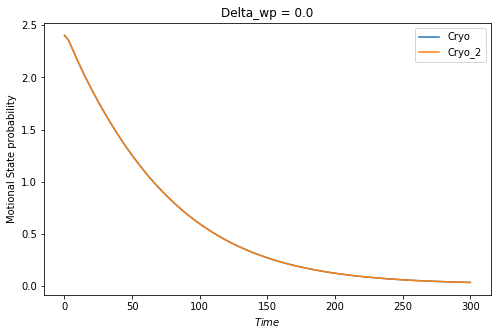






  8%|▊         | 1/12 [00:15<02:50, 15.54s/it]

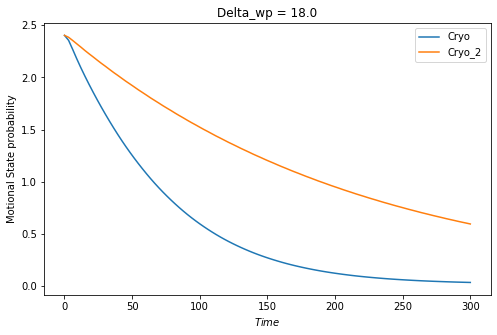






 17%|█▋        | 2/12 [00:41<03:06, 18.61s/it]

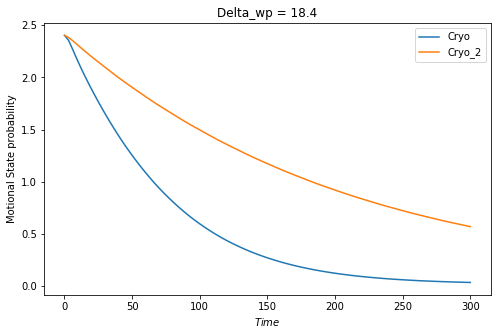






 25%|██▌       | 3/12 [01:08<03:09, 21.03s/it]

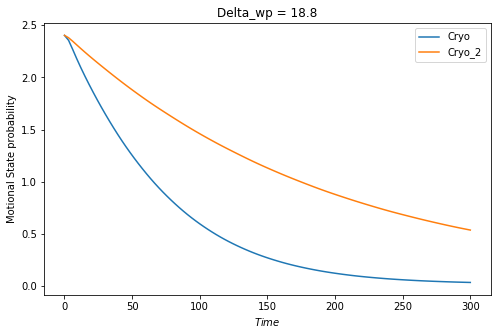






 33%|███▎      | 4/12 [01:33<02:58, 22.26s/it]

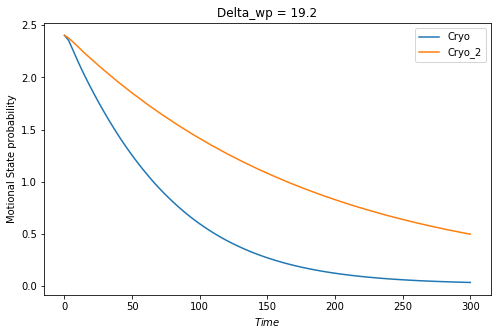






 42%|████▏     | 5/12 [01:58<02:41, 23.12s/it]

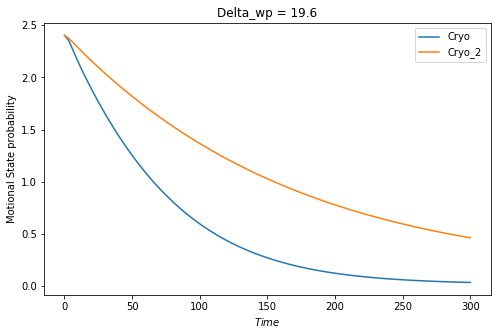






 50%|█████     | 6/12 [02:24<02:24, 24.02s/it]

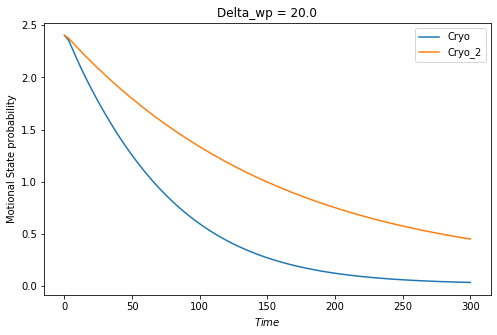






 58%|█████▊    | 7/12 [02:52<02:05, 25.13s/it]

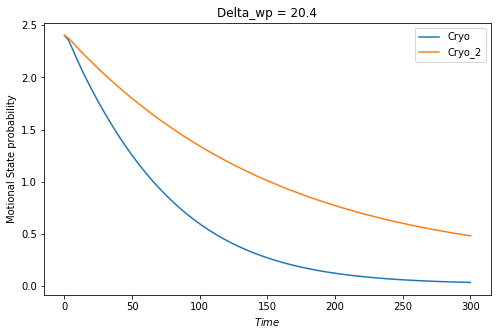






 67%|██████▋   | 8/12 [03:20<01:44, 26.01s/it]

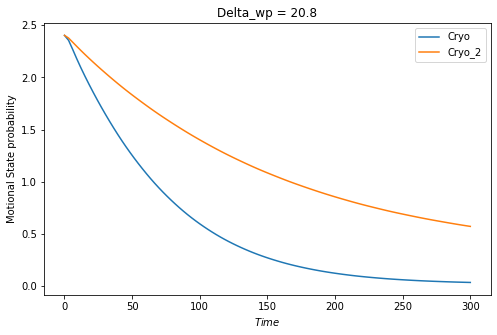






 75%|███████▌  | 9/12 [03:47<01:19, 26.48s/it]

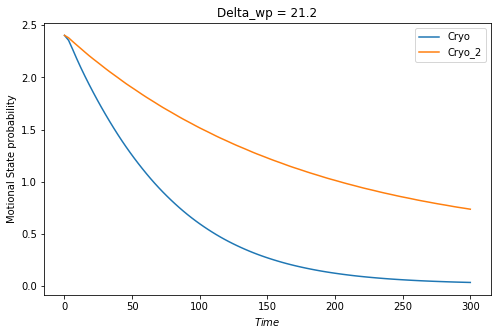






 83%|████████▎ | 10/12 [04:14<00:53, 26.57s/it]

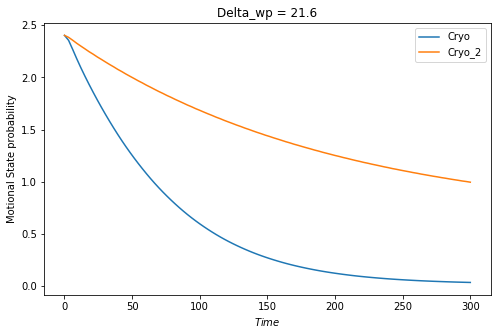






 92%|█████████▏| 11/12 [04:41<00:26, 26.85s/it]

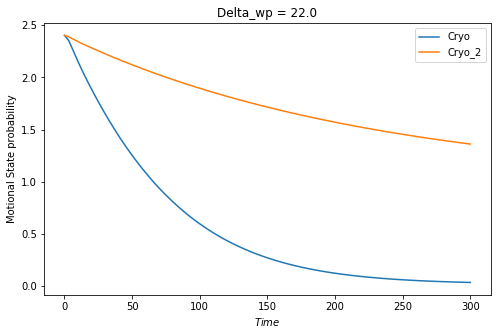






100%|██████████| 12/12 [05:08<00:00, 25.68s/it]


In [274]:
MaxPhonon = 10

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
Omega_Minus = 23
OmegaPi = 1.7/2

Omega_Plus2 = 0.85/2
Omega_Minus2 = 0.85/2

OmegaPi2 = 1.7/2

Omega_Plus2_2 = 0.85/2
Omega_Minus2_2 = 0.85/2
Delta_p = 45.6
delta_dp = Delta_c - Delta_p

delta_wp_list = np.linspace(18, 22, 11)
delta_wp_list = np.append([0], delta_wp_list)
 
States_cryo_2probe = []
motion_cryo_2probe = []

tlist = np.linspace(0, 300, 100)
rho0 = tensor(ket2dm(basis(4,2)), thermal_dm(MaxPhonon, 3))

for delta_wp in tqdm(delta_wp_list):
    States_cryo_2probe.append(DoubleEITSimulationWithIonMotion_cryo_mesolve_2probe(
                         tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, 
                         Delta0, Delta_Minus, Delta_p, Delta_Plus, 
                         nu, eta_pi, eta_sigma, delta_dp, 
                         Omega_Plus2_2, Omega_Minus2_2, OmegaPi2, delta_wp, gammaSP).states)
    motion_cryo_2probe.append([(tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))*state).tr() 
                     for state in States_cryo_2probe[-1]])
      
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, motion_cryo[3], label="Cryo")
    ax.plot(tlist, motion_cryo_2probe[-1], label="Cryo_2")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('Motional State probability')
    ax.set_title('Delta_wp = '+str(delta_wp))
    plt.show()

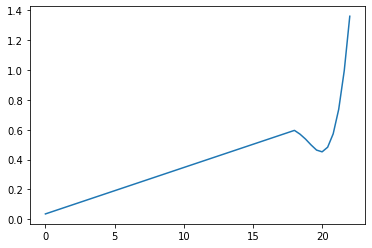

In [275]:
last_motion = [states[-1] for states in motion_cryo_2probe]
plt.plot(delta_wp_list, last_motion)






  0%|          | 0/14 [00:00<?, ?it/s]

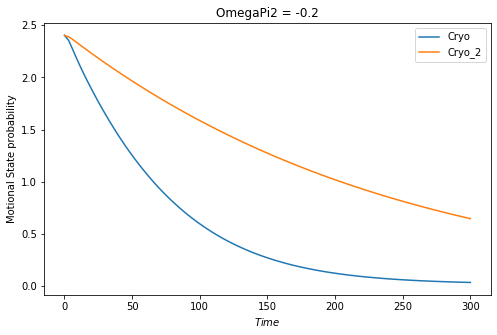






  7%|▋         | 1/14 [00:25<05:25, 25.00s/it]

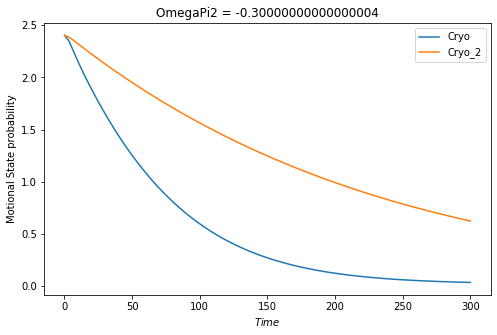






 14%|█▍        | 2/14 [00:49<04:58, 24.84s/it]

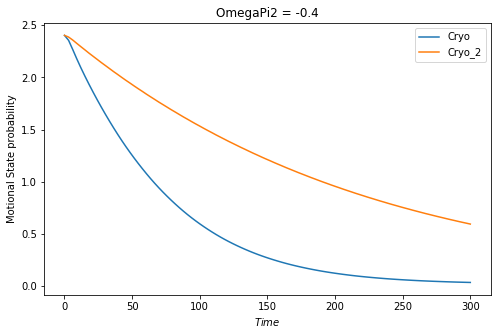






 21%|██▏       | 3/14 [01:15<04:36, 25.11s/it]

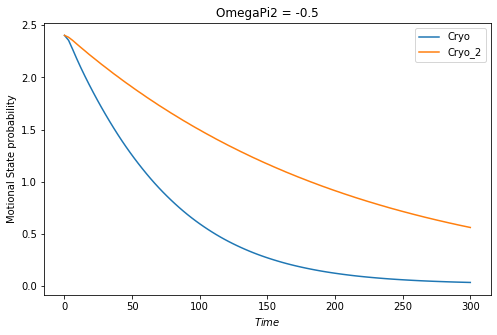






 29%|██▊       | 4/14 [01:39<04:08, 24.88s/it]

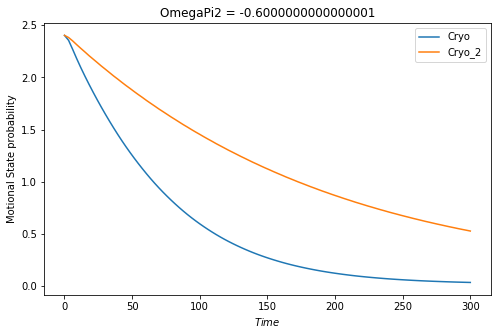






 36%|███▌      | 5/14 [02:05<03:47, 25.30s/it]

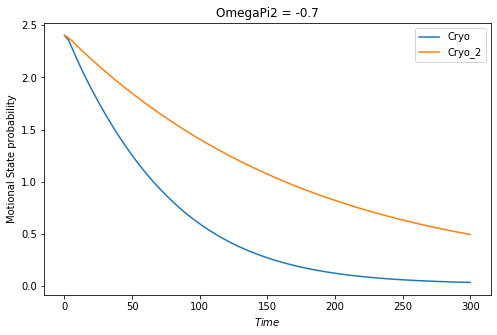






 43%|████▎     | 6/14 [02:32<03:25, 25.66s/it]

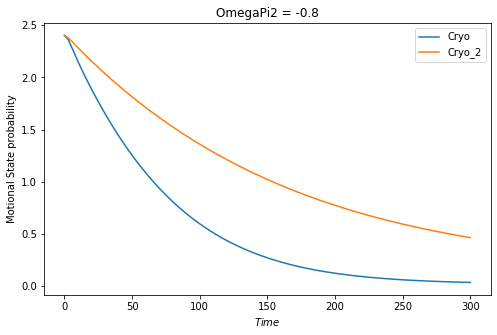






 50%|█████     | 7/14 [02:50<02:43, 23.40s/it]

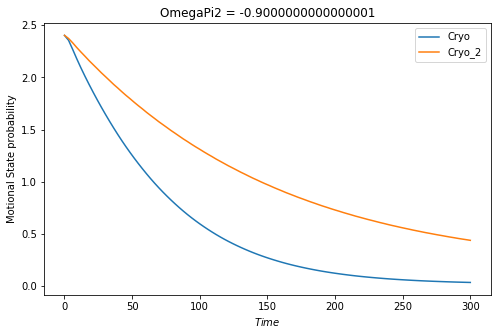






 57%|█████▋    | 8/14 [03:08<02:10, 21.77s/it]

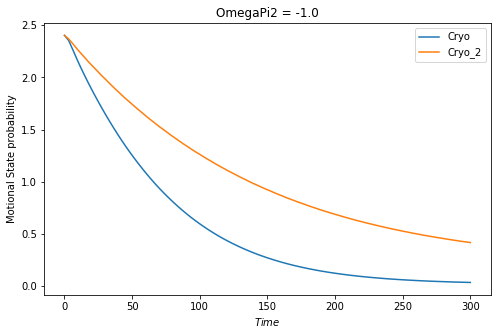






 64%|██████▍   | 9/14 [03:26<01:42, 20.54s/it]

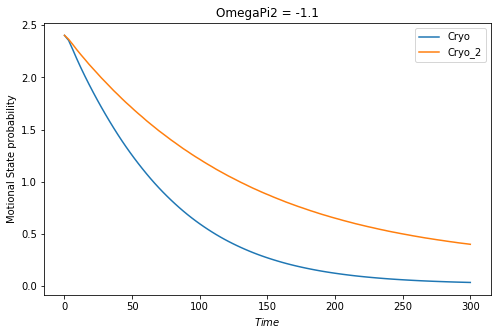






 71%|███████▏  | 10/14 [03:44<01:20, 20.05s/it]

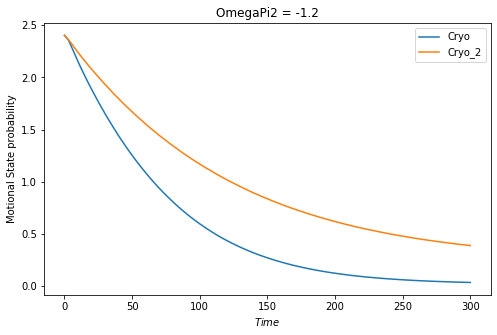






 79%|███████▊  | 11/14 [04:04<00:59, 19.78s/it]

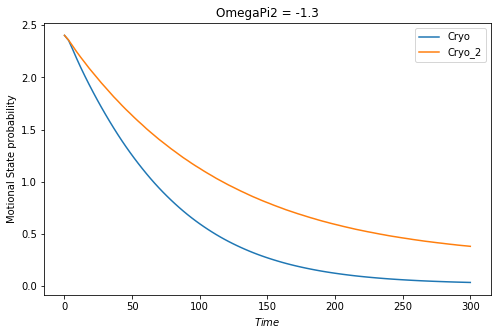






 86%|████████▌ | 12/14 [04:21<00:38, 19.10s/it]

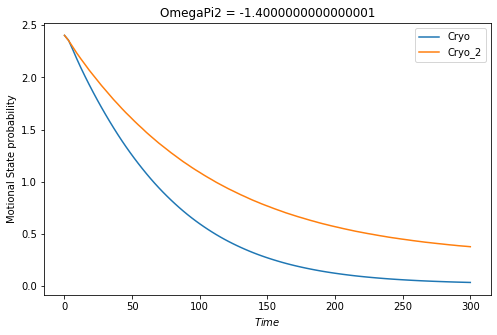






 93%|█████████▎| 13/14 [04:45<00:20, 20.45s/it]

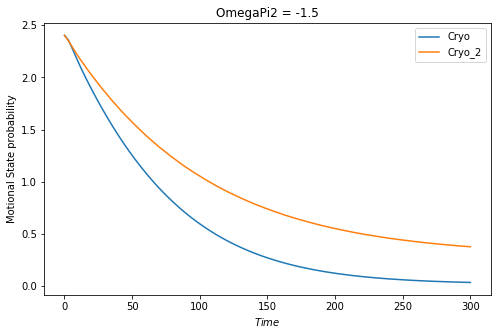






100%|██████████| 14/14 [05:03<00:00, 21.69s/it]


In [282]:
MaxPhonon = 10

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
Omega_Minus = 23
OmegaPi = 1.7/2

Omega_Plus2 = 0.85/2
Omega_Minus2 = 0.85/2

Delta_p = 45.6
delta_dp = Delta_c - Delta_p
 
delta_wp = 20

States_cryo_2probe_amp = []
motion_cryo_2probe_amp = []

tlist = np.linspace(0, 300, 100)
rho0 = tensor(ket2dm(basis(4,2)), thermal_dm(MaxPhonon, 3))


OmegaPi2_list = np.linspace(-0.2, -1.5, 14)

for OmegaPi2 in tqdm(OmegaPi2_list):
    Omega_Plus2_2 = OmegaPi2/2
    Omega_Minus2_2 = OmegaPi2/2
    
    States_cryo_2probe_amp.append(DoubleEITSimulationWithIonMotion_cryo_mesolve_2probe(
                         tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, 
                         Delta0, Delta_Minus, Delta_p, Delta_Plus, 
                         nu, eta_pi, eta_sigma, delta_dp, 
                         Omega_Plus2_2, Omega_Minus2_2, OmegaPi2, delta_wp, gammaSP).states)
    motion_cryo_2probe_amp.append([(tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))*state).tr() 
                     for state in States_cryo_2probe_amp[-1]])
      
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(tlist, motion_cryo[3], label="Cryo")
    ax.plot(tlist, motion_cryo_2probe_amp[-1], label="Cryo_2")
    ax.legend()
    ax.set_xlabel('$Time$')
    ax.set_ylabel('Motional State probability')
    ax.set_title('OmegaPi2 = '+str(OmegaPi2))
    plt.show()

The Hamiltonian having a motional determined term

\begin{equation}
\hat{H}/\hbar=\begin{pmatrix}
\omega_{\left| e \right>}&\frac{\Omega_{\sigma-}}{2}e^{i(\vec{k}_{\rm d}\cdot\vec{r}-\omega_{\rm d}t)}&-\frac{\Omega_\pi}{2}e^{i(\vec{k}_{\rm p}\cdot\vec{r}-\omega_{\rm p}t)}&\frac{\Omega_{\sigma+}}{2}e^{i(\vec{k}_{\rm d}\cdot\vec{r}-\omega_{\rm d}t)}\\
\frac{\Omega_{\sigma-}}{2}e^{-i(\vec{k}_{\rm d}\cdot\vec{r}-\omega_{\rm d}t)}&\omega_{\left| + \right>}&0&0\\
-\frac{\Omega_\pi}{2}e^{-i(\vec{k}_{\rm p}\cdot\vec{r}-\omega_{\rm p}t)}&0&\omega_{\left| 0 \right>}&0\\
\frac{\Omega_{\sigma+}}{2}e^{-i(\vec{k}_{\rm d}\cdot\vec{r}-\omega_{\rm d}t)}&0&0&\omega_{\left| - \right>},
\end{pmatrix}+\nu a^\dagger a, 
\end{equation}

where the basis is {$\left| e \right>$, $\left| + \right>$, $\left| 0 \right>$, $\left| - \right>$}. In the rotating frame the Hamiltonian can be simplified to 

\begin{equation}
\hat{H}_{\rm r}/\hbar=\begin{pmatrix}
0&\frac{\Omega_{\sigma-}}{2}e^{i\vec{k}_{\rm d}\cdot\vec{r}}&-\frac{\Omega_\pi}{2}e^{i\vec{k}_{\rm p}\cdot\vec{r}}&\frac{\Omega_{\sigma+}}{2}e^{i\vec{k}_{\rm d}\cdot\vec{r}}\\
\frac{\Omega_{\sigma-}}{2}e^{-i\vec{k}_{\rm d}\cdot\vec{r}}&\Delta_{\rm d}+\delta_{\rm{B}}&0&0\\
-\frac{\Omega_\pi}{2}e^{-i\vec{k}_{\rm p}\cdot\vec{r}}&0&\Delta_{\rm p}&0\\
\frac{\Omega_{\sigma+}}{2}e^{-i\vec{k}_{\rm d}\cdot\vec{r}}&0&0&\Delta_{\rm d}-\delta_{\rm{B}}
\end{pmatrix}+\nu a^\dagger a.
\end{equation}

The absorption spectrum can be obtained by numerical solving the steady state solution of the master equationcorresponding to the Hamiltonian. The cooling speed can be calculated by solving the time evolution of the master equation corresponding  to $\hat{H}_{\rm r}$ the cooling limit can be calculated by  the average phonon number of the steady statesolution of the master equation.

\begin{equation}
    \frac{d\hat\rho}{dt}=-i [\hat{H}_{\rm s},\hat \rho]+\mathcal{L}\rho,
\end{equation}

where $\mathcal{L}$ is the Lindblad operator corresponding to the three spontaneous decay channel  $\mathcal{L}\rho=\sum_{i=1}^3 c_i\rho c_i^\dagger-\frac{1}{2}[c_i^\dagger c_i,\rho]$ and $c_1=\sqrt{\Gamma/3}\left| + \right>\left< e \right|$, $c_2=\sqrt{\Gamma/3}\left| 0 \right>\left< e \right|$, $c_1=\sqrt{\Gamma/3}\left| - \right>\left< e \right|$. For the Yb ion, $\Gamma \approx 2\pi \times 20$ MHz. In our setup, $\vec{k}_{\rm d}=-\vec{k}_{\rm p}=\hat{x}=\eta(\hat{a}+\hat{a}^\dagger)=\sqrt{\frac{1}{2M\omega_{\rm CM}}}(\hat{a}+\hat{a}^\dagger)$, where $\omega_{\rm CM} = 2\pi \times 3$ MHz.

## Initial setting

In [190]:
MaxPhonon = 10
tau_m = 3000 # motional decoherence time (us)

def DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, nu, eta_pi, eta_sigma, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())- OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())+Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) +\
    nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon)),
            np.sqrt(2/(tau_m))*tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))]
    rho_ss = steadystate(H, c_ops, method='svd')
    return rho_ss

def DoubleEITSimulationWithIonMotion_test(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, nu, eta_pi, eta_sigma, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())- OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())+Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) +\
    nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon)),
            np.sqrt(2/(tau_m))*tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))]
    e_ops = [tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon)),
            tensor(basis(4,0)*basis(4,0).dag(), qeye(MaxPhonon)),
            tensor(basis(4,1)*basis(4,1).dag(), qeye(MaxPhonon)),
            tensor(basis(4,2)*basis(4,2).dag(), qeye(MaxPhonon)),
            tensor(basis(4,3)*basis(4,3).dag(), qeye(MaxPhonon))]
    opts = Options(store_states=True)
    output = mesolve(H, rho0, t, c_ops, e_ops, options=opts)
    return output


def DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, gammaSP, tlist = np.linspace(0,10,100)):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()- OmegaPi*basis(4,2)*basis(4,0).dag()+Omega_Plus*basis(4,3)*basis(4,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() + Delta1*basis(4,1)*basis(4,1).dag() + Delta2*basis(4,2)*basis(4,2).dag()+ Delta_3*basis(4,3)*basis(4,3).dag() 
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]
    rho_ss = steadystate(H, c_ops, method='svd')
    
    return rho_ss

def DoubleEITNoMotion_test(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, gammaSP):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()- OmegaPi*basis(4,2)*basis(4,0).dag()+Omega_Plus*basis(4,3)*basis(4,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() + Delta1*basis(4,1)*basis(4,1).dag() + Delta2*basis(4,2)*basis(4,2).dag()+ Delta_3*basis(4,3)*basis(4,3).dag() 
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]
    
    e_ops = [basis(4,0)*basis(4,0).dag(), 
             basis(4,1)*basis(4,1).dag(), 
             basis(4,2)*basis(4,2).dag(), 
             basis(4,3)*basis(4,3).dag()]
    opts = Options(store_states=True)
    output = mesolve(H, rho0, t, c_ops, e_ops, options=opts)
    return output


def DoubleEITSimulationWithIonMotion_cryo_mesolve(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta1, Delta2, Delta_3, nu, eta_pi, eta_sigma, delta_dp, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            - OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            +Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) +\
    nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    H_time1 = Omega_Minus2*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time1_coeff(t, args):
        return np.exp(-1j * delta_dp * t) ## delta_dp should be negative
    H_time2 = Omega_Minus2*tensor(basis(4,0)*basis(4,1).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time2_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    H_time3 = Omega_Plus2*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time3_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time4 = Omega_Plus2*tensor(basis(4,0)*basis(4,3).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time4_coeff(t, args):
        return np.exp(1j * delta_dp * t)
    
    #solve the final state
    H_full = [H,[H_time1, H_time1_coeff],[H_time2, H_time2_coeff],[H_time3, H_time3_coeff],[H_time4, H_time4_coeff]]
    
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon)),
            np.sqrt(2/(tau_m))*tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))]
    e_ops = [tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon)),
            tensor(basis(4,0)*basis(4,0).dag(), qeye(MaxPhonon)),
            tensor(basis(4,1)*basis(4,1).dag(), qeye(MaxPhonon)),
            tensor(basis(4,2)*basis(4,2).dag(), qeye(MaxPhonon)),
            tensor(basis(4,3)*basis(4,3).dag(), qeye(MaxPhonon))]
    opts = Options(store_states=True)
    output = mesolve(H_full, rho0, t, c_ops, e_ops, options=opts)
    return output

# Need to add motional dephasing term to make the steady-state calculation work
def DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta1, 
                        Delta2, Delta_3, nu, eta_pi, eta_sigma, delta_dp, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            - OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            + Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) +\
    nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    H_time1 = Omega_Minus2*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time1_coeff(t, args):
        return np.exp(-1j * delta_dp * t) ## delta_dp should be negative
    H_time2 = Omega_Minus2*tensor(basis(4,0)*basis(4,1).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time2_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    H_time3 = Omega_Plus2*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time3_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time4 = Omega_Plus2*tensor(basis(4,0)*basis(4,3).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time4_coeff(t, args):
        return np.exp(1j * delta_dp * t)
    
    #solve the final state
    H_full = [H,[H_time1, H_time1_coeff],[H_time2, H_time2_coeff],
              [H_time3, H_time3_coeff],[H_time4, H_time4_coeff]]
    
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon)),
             np.sqrt(2/(tau_m))*tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))]
    
    #rho_ss = steadystate(H_full, c_ops, method='svd')
    rho_ss = steadystate(H, c_ops, method='svd')
    return rho_ss


def DoubleEITNoMotion_cryo_mesolve(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta1, Delta2, Delta_3, delta_dp, gammaSP):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()- OmegaPi*basis(4,2)*basis(4,0).dag()+Omega_Plus*basis(4,3)*basis(4,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() + Delta1*basis(4,1)*basis(4,1).dag() + Delta2*basis(4,2)*basis(4,2).dag()+ Delta_3*basis(4,3)*basis(4,3).dag() 
    H_time1 = Omega_Minus2*basis(4,1)*basis(4,0).dag()
    def H_time1_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time2 = Omega_Minus2*basis(4,0)*basis(4,1).dag()
    def H_time2_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    H_time3 = Omega_Plus2*basis(4,3)*basis(4,0).dag()
    def H_time3_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time4 = Omega_Plus2*basis(4,0)*basis(4,3).dag()
    def H_time4_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    #solve the steady state
    H_full = [H,[H_time1, H_time1_coeff],[H_time2, H_time2_coeff],[H_time3, H_time3_coeff],[H_time4, H_time4_coeff]]
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]
    e_ops = [basis(4,0)*basis(4,0).dag(),
             basis(4,1)*basis(4,1).dag(),
             basis(4,2)*basis(4,2).dag(),
             basis(4,3)*basis(4,3).dag()]
    opts = Options(store_states=True)
    output = mesolve(H_full, rho0, t, c_ops, e_ops, options=opts)
    return output

def DoubleEITNoMotion_cryo_steadystate(Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta1, Delta2, Delta_3, delta_dp, gammaSP):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()- OmegaPi*basis(4,2)*basis(4,0).dag()+Omega_Plus*basis(4,3)*basis(4,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() + Delta1*basis(4,1)*basis(4,1).dag() + Delta2*basis(4,2)*basis(4,2).dag()+ Delta_3*basis(4,3)*basis(4,3).dag() 
    H_time1 = Omega_Minus2*basis(4,1)*basis(4,0).dag()
    def H_time1_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time2 = Omega_Minus2*basis(4,0)*basis(4,1).dag()
    def H_time2_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    H_time3 = Omega_Plus2*basis(4,3)*basis(4,0).dag()
    def H_time3_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time4 = Omega_Plus2*basis(4,0)*basis(4,3).dag()
    def H_time4_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    #solve the steady state
    H_full = [H,[H_time1, H_time1_coeff],[H_time2, H_time2_coeff],[H_time3, H_time3_coeff],[H_time4, H_time4_coeff]]
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]

    rho_ss = steadystate(H, c_ops, method='svd')
    return rho_ss


def BestDetuning(detuningList,phononList):
    small = phononList[0]
    index = 0
    for i in np.arange(len(phononList)):
        if phononList[i]<small:
            small=phononList[i]
            index=i
    return [detuningList[index],small]

## To Understand the machanism

In [47]:
SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 32

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Example
### Red Chamber setting

Temperature limit1： 0.016967
Temperature limit2： 0.344690
Delta =  45.63
Mode frequency =  2.4499999999999993


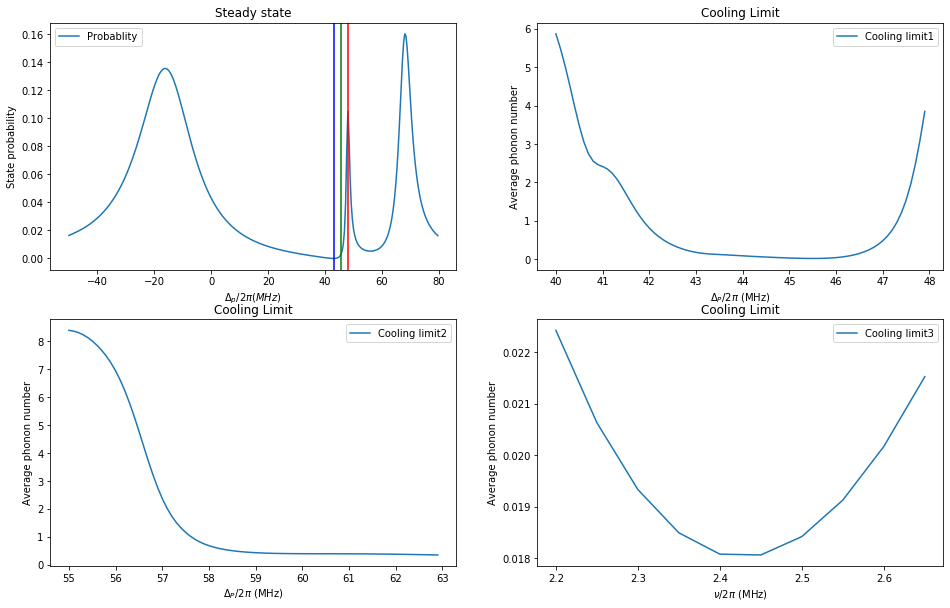

In [7]:
gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 50 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 2.4 # mode frequency
eta = 0.1

DeltaList = np.arange(-50,80,0.4)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

cooling_detuning_list1 = np.arange(40,48,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(55,63,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = 45.63
# Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(2.2,2.7,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=45.63, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=45.63+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=45.63-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta = ',Delta)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

## Cryo setting

Temperature limit1： 0.025301
Temperature limit2： 0.478130


ValueError: x and y must have same first dimension, but have shapes (325,) and (0,)

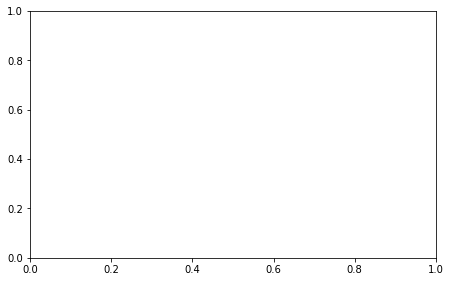

In [149]:
MaxPhonon = 10

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23
Omega_Plus2 = 0.85
Omega_Minus2 = 0.85

Delta_c = 50 # pumping beam detuning
Zeeman = 7 # Zeeman shift
Delta_Minus = Delta_c-Zeeman
Delta_Plus = Delta_c+Zeeman

Delta0 = 0
nu = 2.1 # mode frequency
eta = 0.1

DeltaList = np.arange(-50,80,0.4)

StatePopulation_e = []
# StatePopulation_p = []
# StatePopulation_0 = []
# StatePopulation_m = []
for Delta in DeltaList:
    delta_dp = Delta_c- Delta #???

#     rho_ss = DoubleEITNoMotion_cryo_steadystate(Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, 
#                                 Delta0, Delta_Minus, Delta, Delta_Plus, delta_dp, gammaSP)
#     StatePopulation_e.append(rho_ss.full()[0,0])
    
cooling_detuning_list1 = np.arange(40,48,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                        ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(55,63,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                        ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(1.8,2.4,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, StatePopulation_e, label="Probablity")
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('|e> State probability')
ax.set_title('Steady state')

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta = ',Delta)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

Delta =  45.80000000000008
Mode frequency =  2.2500000000000004


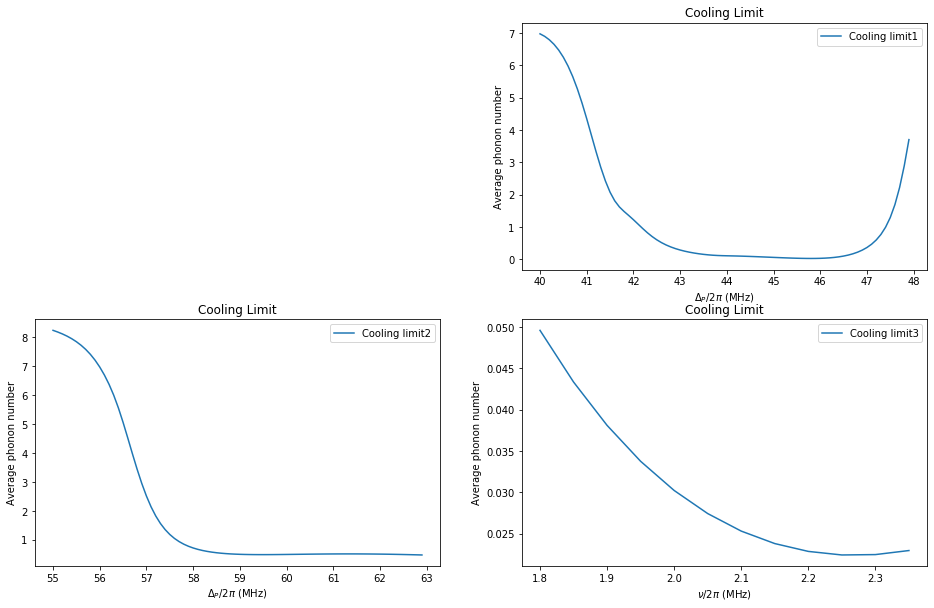

In [150]:
fig = plt.figure(figsize=(16,10))
# ax = fig.add_subplot(2,2,1)
# ax.plot(DeltaList, StatePopulation_e, label="Probablity")
# ax.legend()
# ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
# ax.set_ylabel('|e> State probability')
# ax.set_title('Steady state')

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta = ',Delta)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

In [40]:
Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
Delta

45.70000000000008

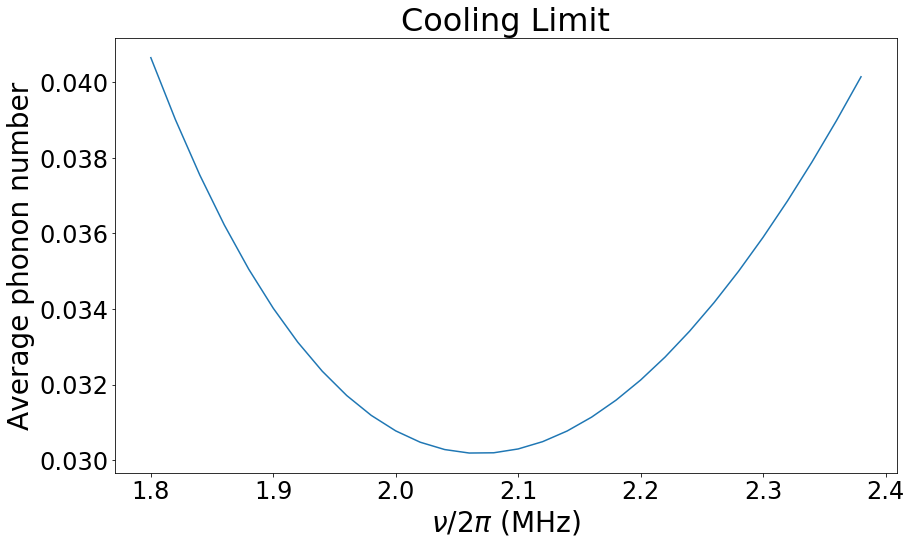

In [52]:
Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]+0.22
motion_frequency_list = np.arange(1.8,2.4,0.02)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.plot(motion_frequency_list, cooling_limit_List3)
#ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');
fig.savefig('CoolingLimit.svg', format='svg', dpi=1200)

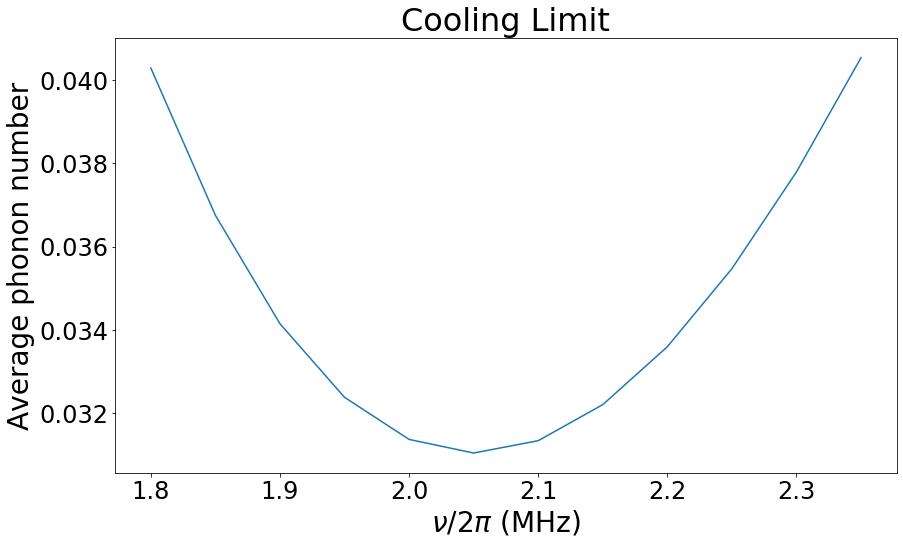

In [50]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.plot(motion_frequency_list, cooling_limit_List3)
#ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');
fig.savefig('CoolingLimit.svg', format='svg', dpi=1200)

Omega_c = 0.5 * Gamma_SP
Temperature limit1： 0.076297
Omega_c = 1.0 * Gamma_SP
Temperature limit1： 0.027316
Omega_c = 1.5 * Gamma_SP
Temperature limit1： 0.013372
Omega_c = 2.0 * Gamma_SP
Temperature limit1： 0.008903
Omega_c = 2.5 * Gamma_SP
Temperature limit1： 0.009858
Omega_c = 3.0 * Gamma_SP
Temperature limit1： 0.011950
Omega_c = 3.5 * Gamma_SP
Temperature limit1： 0.013146
Omega_c = 4.0 * Gamma_SP
Temperature limit1： 0.013657
Omega_c = 4.5 * Gamma_SP
Temperature limit1： 0.013565
Omega_c = 5.0 * Gamma_SP
Temperature limit1： 0.013292


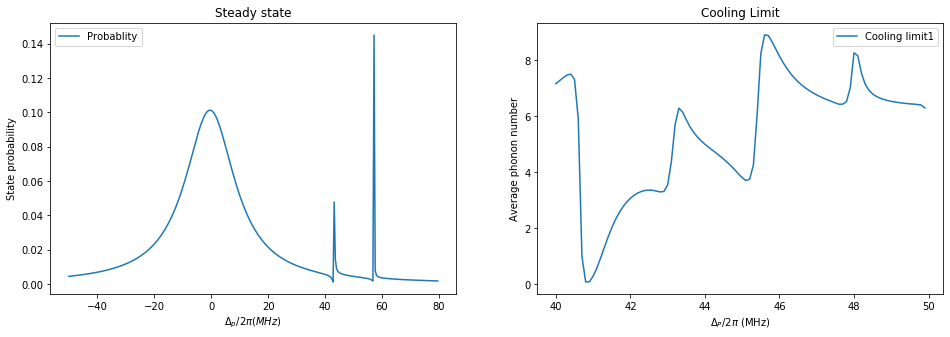

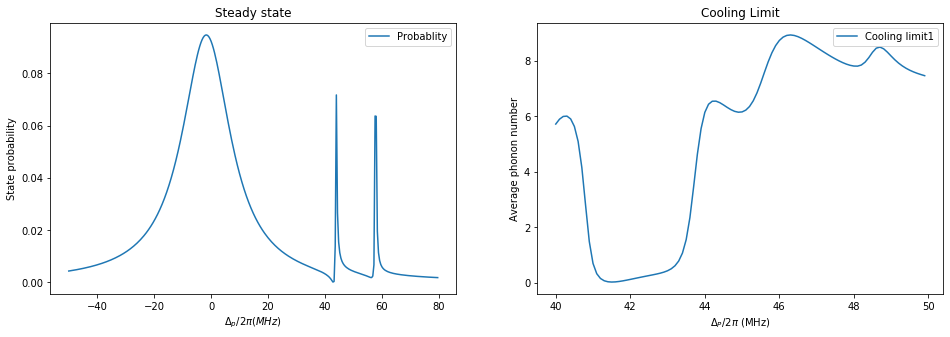

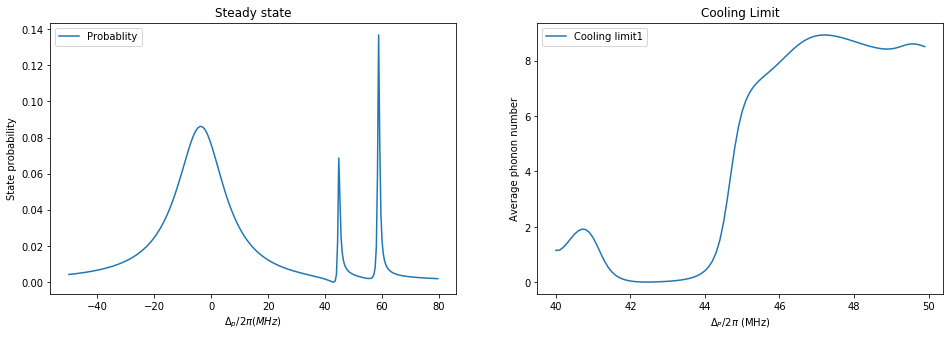

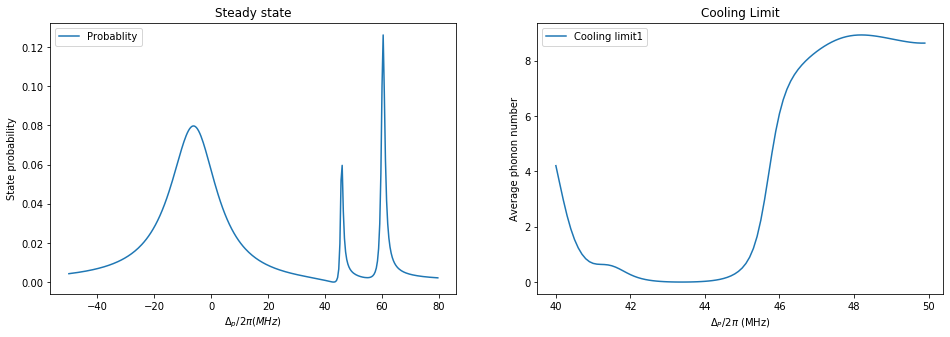

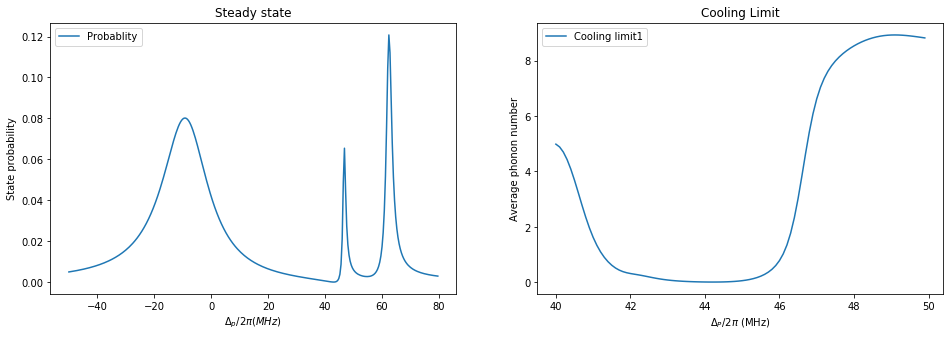

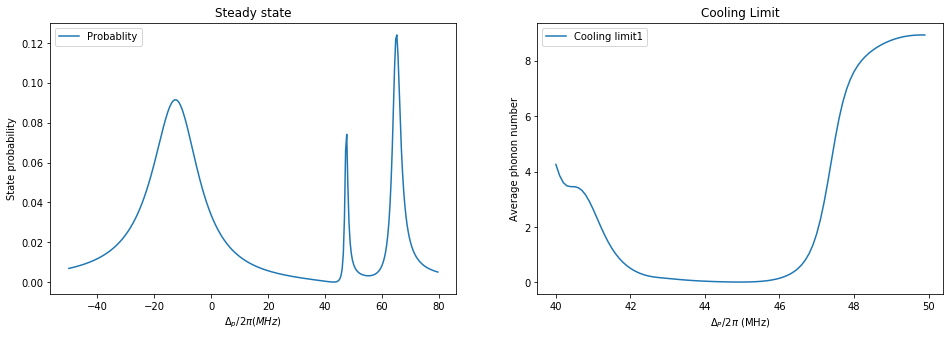

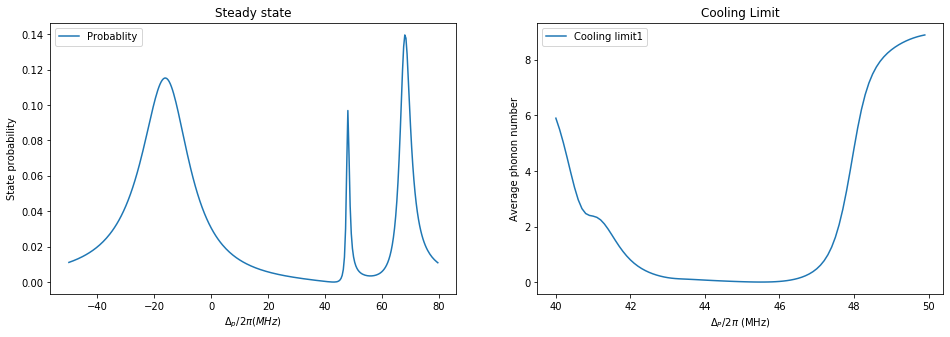

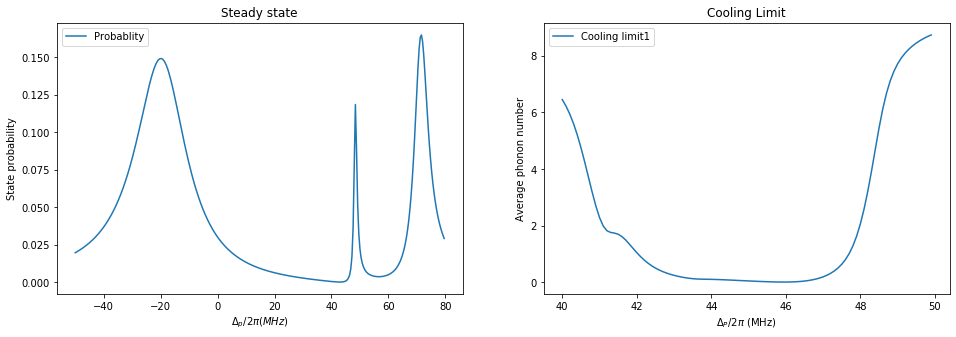

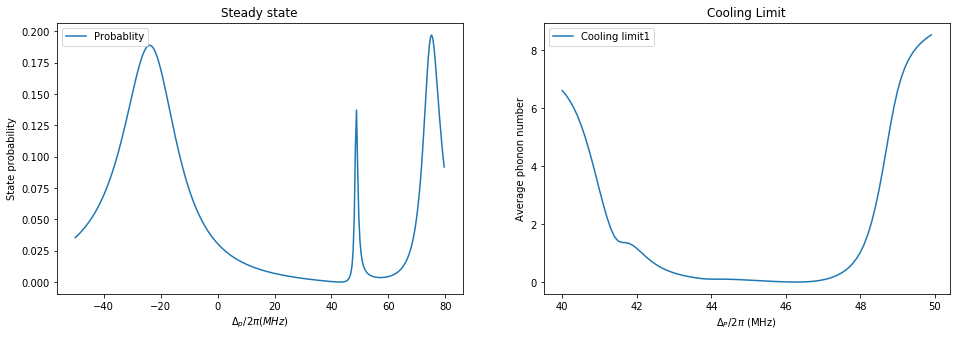

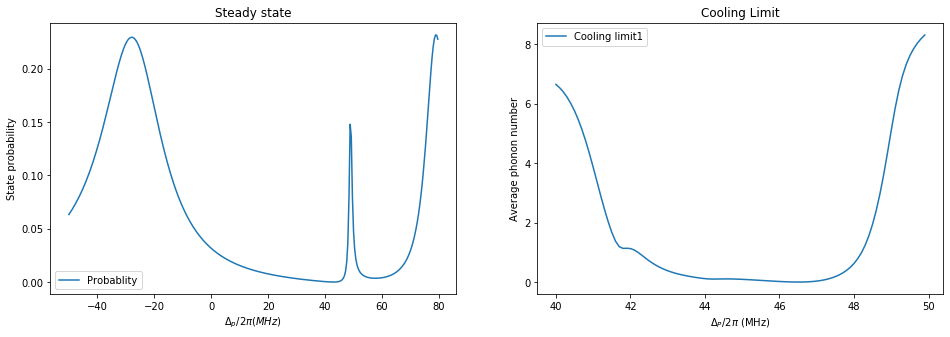

In [10]:
gammaSP = 19.7/3 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 50 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 2.4 # mode frequency
eta = 0.1

cooling_limits = []
ratios = np.linspace(0.5, 5, 10)
for ratio in ratios:
    print('Omega_c = '+str(round(ratio, 2))+' * Gamma_SP')
    Omega_Plus = ratio * gammaSP # Rabi frequency
    OmegaPi = 0.06 * Omega_Plus
    Omega_Minus = ratio * gammaSP

    DeltaList = np.arange(-50,80,0.4)
    ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                              for Delta in DeltaList]

    cooling_detuning_list1 = np.arange(40,50,0.1)
    cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                           Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                          ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                         for Delta in cooling_detuning_list1]

    print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))

    cooling_limits.append(cooling_limit_List1)
          
    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(1,2,1)
    ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
#     ax.axvline(x=45.63, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
#     ax.axvline(x=45.63+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
#     ax.axvline(x=45.63-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
    ax.legend()
    ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
    ax.set_ylabel('State probability')
    ax.set_title('Steady state');

    ax = fig.add_subplot(1,2,2)
    ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
    ax.legend()
    ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
    ax.set_ylabel('Average phonon number')
    ax.set_title('Cooling Limit');

Text(0, 0.5, 'Final average phonon number')

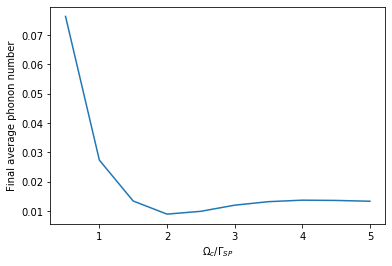

In [19]:
min_avg_num = []
for cooling_data in cooling_limits:
    min_avg_num.append(np.min(np.abs(cooling_data)))
plt.plot(ratios, min_avg_num)
plt.xlabel('$\Omega_c/\Gamma_{SP}$')
plt.ylabel('Final average phonon number')

Temperature limit1： 0.001058
Temperature limit2： 0.002014
Delta =  192.79999999999984
Mode frequency =  2.3999999999999995


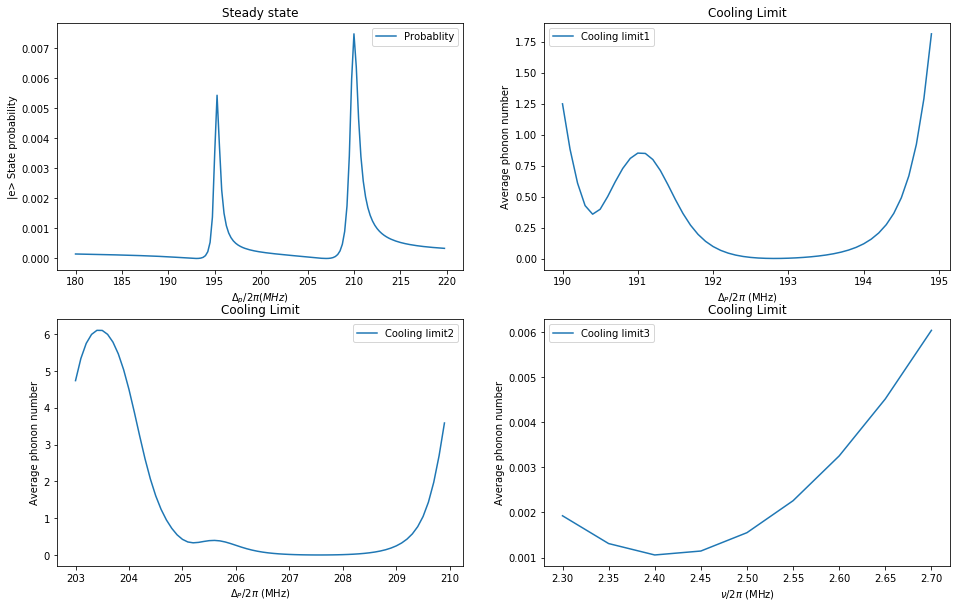

In [17]:
MaxPhonon = 10

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23
Omega_Plus2 = 0.85
Omega_Minus2 = 0.85

Delta = 200 # pumping beam detuning
Zeeman = 7 # Zeeman shift
Delta_Minus = Delta-Zeeman
Delta_Plus = Delta+Zeeman
Delta_P = -Delta
Delta0 = 0
nu = 2.4 # mode frequency
eta = 0.1

DeltaList = np.arange(180,220,0.25)

StatePopulation_e = []
# StatePopulation_p = []
# StatePopulation_0 = []
# StatePopulation_m = []
for Delta in DeltaList:
    delta_dp = Delta_Minus - Delta

    rho_ss = DoubleEITNoMotion_cryo_steadystate(Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, 
                                Delta0, Delta_Minus, Delta, Delta_Plus, delta_dp, gammaSP)
    StatePopulation_e.append(rho_ss.full()[0,0])
    
cooling_detuning_list1 = np.arange(190,195,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                        ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(203,210,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                        ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(2.3,2.7,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, StatePopulation_e, label="Probablity")
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('|e> State probability')
ax.set_title('Steady state')

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta = ',Delta)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

# Cooling Speed

In [83]:
MaxPhonon = 10
def EquilibriumTime(tlist, exp, tol = 1e-6):
    for i in range(len(exp)-1):
        diff = np.abs(exp[i+1]-exp[i])
        if diff < tol:
            break
    return tlist[i]

ratio = 0.04
Time used:0:02:27.877142
ratio = 0.06


/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Time used:0:02:17.688057
ratio = 0.08
Time used:0:02:16.651874
ratio = 0.1
Time used:0:02:22.997940
ratio = 0.12
Time used:0:02:02.442601
ratio = 0.14
Time used:0:01:56.835179
ratio = 0.16
Time used:0:01:58.237301
ratio = 0.18
Time used:0:02:26.685505


Text(0, 0.5, 'Final average phonon number')

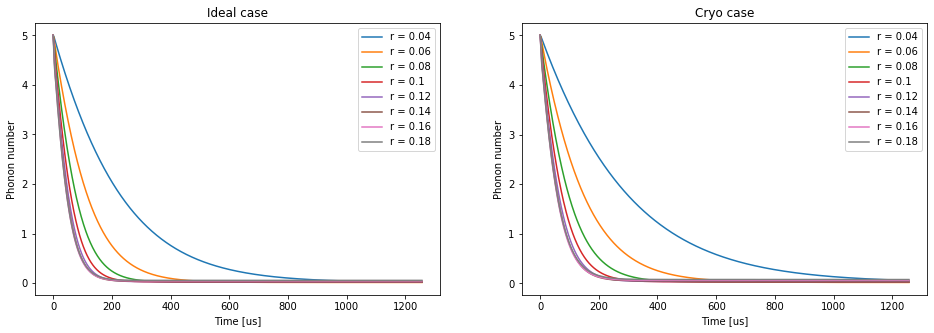

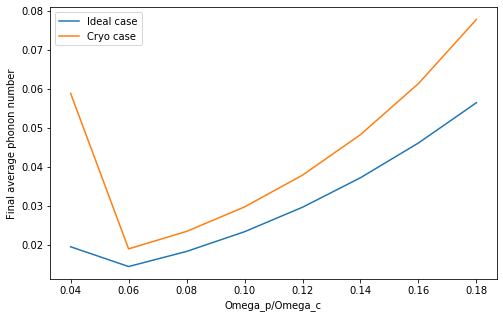

In [70]:
MaxPhonon = 10
tlist = np.arange(0,200*2*np.pi,1)
rho0 = tensor(basis(4,2),basis(MaxPhonon, 5))

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
Omega_Minus = 23

ratios = np.arange(0.04, 0.2, 0.02)
fig = plt.figure(figsize=(16,5))
finalPhononNum1 = []
finalPhononNum2 = []
equilTime1 = []
equilTime2 = []

for ratio in ratios: 
    time1 = datetime.datetime.now()
    print('ratio = '+str(round(ratio, 2)))
    OmegaPi = Omega_Plus*ratio
    Omega_Plus2 = OmegaPi/2
    Omega_Minus2 = OmegaPi/2

    Delta = 50 # pumping beam detuning
    Zeeman = 7 # Zeeman shift
    delta_dp = -Zeeman
    Delta_Minus = Delta-Zeeman
    Delta_Plus = Delta+Zeeman
    Delta_P = -Delta
    Delta0 = 0
    nu = 2.4 # mode frequency
    eta = 0.1
    eta_pi = eta*0.707
    eta_sigma = -eta

    Delta = 45.5
    output1 = DoubleEITSimulationWithIonMotion_test(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP)
    output2 = DoubleEITSimulationWithIonMotion_cryo_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta_pi, eta_sigma, delta_dp, gammaSP)
    
    finalPhononNum1.append(output1.expect[0][-1])
    finalPhononNum2.append(output2.expect[0][-1])
    equilTime1.append(EquilibriumTime(tlist, output1.expect[0], tol = 1e-6))
    equilTime2.append(EquilibriumTime(tlist, output2.expect[0], tol = 1e-6))
    
    ax = fig.add_subplot(1,2,1)
    label = 'r = '+str(round(ratio, 2))
    ax.plot(tlist, output1.expect[0],label = label)
    ax.legend()
    ax.set_title('Ideal case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    ax = fig.add_subplot(1,2,2)
    label = 'r = '+str(round(ratio, 2))
    ax.plot(tlist, output2.expect[0],label = label)
    ax.legend()
    ax.set_title('Cryo case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    time2 = datetime.datetime.now()
    print('Time used:'+str(time2-time1))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)
ax.plot(ratios, finalPhononNum1, label = 'Ideal case')
ax.plot(ratios, finalPhononNum2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Final average phonon number')

ax = fig.add_subplot(1,2,2)
ax.plot(ratios, equilTime1, label = 'Ideal case')
ax.plot(ratios, equilTime2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Time to reach equilbrium [us]')

ratio = 0.04
Time used:0:02:20.528921
ratio = 0.05


/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Time used:0:02:08.471687
ratio = 0.06
Time used:0:02:10.036619
ratio = 0.07
Time used:0:02:12.160201
ratio = 0.08
Time used:0:02:19.126795
ratio = 0.09
Time used:0:02:30.655220
ratio = 0.1
Time used:0:02:29.433070
ratio = 0.11
Time used:0:02:02.405997
ratio = 0.12
Time used:0:02:07.222698
ratio = 0.13
Time used:0:02:43.374618
ratio = 0.14
Time used:0:02:07.499493
ratio = 0.15
Time used:0:02:26.910837
ratio = 0.16
Time used:0:02:08.469254
ratio = 0.17
Time used:0:02:36.953176
ratio = 0.18
Time used:0:02:37.571978
ratio = 0.19
Time used:0:02:46.630131


Text(0, 0.5, 'Time to reach equilbrium [us]')

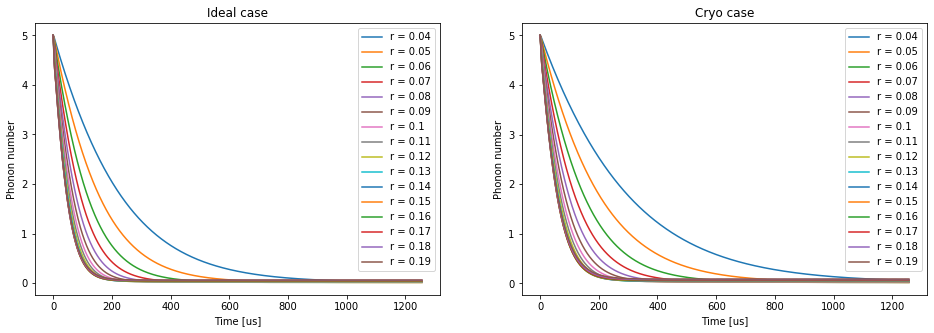

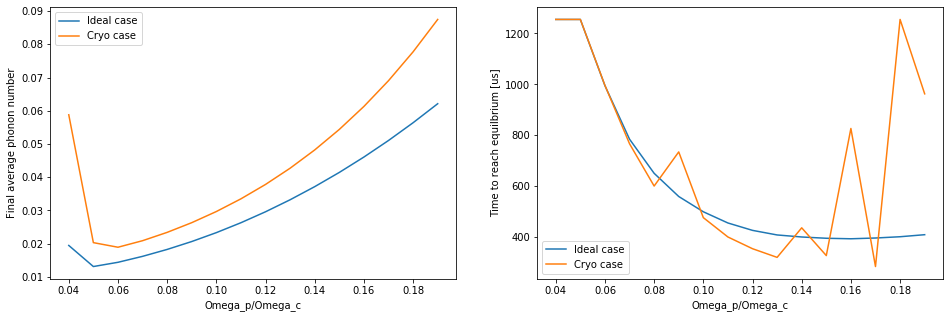

In [87]:
MaxPhonon = 10
tlist = np.arange(0,200*2*np.pi,1)
rho0 = tensor(basis(4,2),basis(MaxPhonon, 5))

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
Omega_Minus = 23

ratios = np.arange(0.04, 0.2, 0.01)
fig = plt.figure(figsize=(16,5))
finalPhononNum1 = []
finalPhononNum2 = []
equilTime1 = []
equilTime2 = []

for ratio in ratios: 
    time1 = datetime.datetime.now()
    print('ratio = '+str(round(ratio, 2)))
    OmegaPi = Omega_Plus*ratio
    Omega_Plus2 = OmegaPi/2
    Omega_Minus2 = OmegaPi/2

    Delta = 50 # pumping beam detuning
    Zeeman = 7 # Zeeman shift
    delta_dp = -Zeeman
    Delta_Minus = Delta-Zeeman
    Delta_Plus = Delta+Zeeman
    Delta_P = -Delta
    Delta0 = 0
    nu = 2.4 # mode frequency
    eta = 0.1
    eta_pi = eta*0.707
    eta_sigma = -eta

    Delta = 45.5
    output1 = DoubleEITSimulationWithIonMotion_test(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP)
    output2 = DoubleEITSimulationWithIonMotion_cryo_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta_pi, eta_sigma, delta_dp, gammaSP)
    
    finalPhononNum1.append(output1.expect[0][-1])
    finalPhononNum2.append(output2.expect[0][-1])
    equilTime1.append(EquilibriumTime(tlist, output1.expect[0], tol = 1e-6))
    equilTime2.append(EquilibriumTime(tlist, output2.expect[0], tol = 1e-6))
    
    ax = fig.add_subplot(1,2,1)
    label = 'r = '+str(round(ratio, 2))
    ax.plot(tlist, output1.expect[0],label = label)
    ax.legend()
    ax.set_title('Ideal case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    ax = fig.add_subplot(1,2,2)
    label = 'r = '+str(round(ratio, 2))
    ax.plot(tlist, output2.expect[0],label = label)
    ax.legend()
    ax.set_title('Cryo case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    time2 = datetime.datetime.now()
    print('Time used:'+str(time2-time1))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)
ax.plot(ratios, finalPhononNum1, label = 'Ideal case')
ax.plot(ratios, finalPhononNum2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Final average phonon number')

ax = fig.add_subplot(1,2,2)
ax.plot(ratios, equilTime1, label = 'Ideal case')
ax.plot(ratios, equilTime2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Time to reach equilbrium [us]')

ratio = 0.02
Time used:0:02:05.985338
ratio = 0.022


/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Time used:0:02:06.721359
ratio = 0.024
Time used:0:02:08.696078
ratio = 0.026
Time used:0:02:09.554043
ratio = 0.028
Time used:0:02:11.418835
ratio = 0.03
Time used:0:02:23.440187
ratio = 0.032
Time used:0:02:22.499717
ratio = 0.034
Time used:0:02:22.805571
ratio = 0.036
Time used:0:02:24.818378
ratio = 0.038
Time used:0:02:36.150344
ratio = 0.04
Time used:0:02:38.014641
ratio = 0.042
Time used:0:02:38.062456
ratio = 0.044
Time used:0:02:33.208869
ratio = 0.046
Time used:0:02:30.260728
ratio = 0.048
Time used:0:02:33.832690
ratio = 0.05
Time used:0:02:12.053528
ratio = 0.052
Time used:0:02:12.194530
ratio = 0.054
Time used:0:02:11.878305
ratio = 0.056
Time used:0:02:11.509537
ratio = 0.058
Time used:0:02:13.063753
ratio = 0.06
Time used:0:02:12.507067
ratio = 0.062
Time used:0:02:13.523501
ratio = 0.064
Time used:0:02:12.610591
ratio = 0.066
Time used:0:02:13.091150
ratio = 0.068
Time used:0:02:13.589000
ratio = 0.07
Time used:0:02:13.862427
ratio = 0.072
Time used:0:02:14.267323
ratio

Text(0, 0.5, 'Time to reach equilbrium [us]')

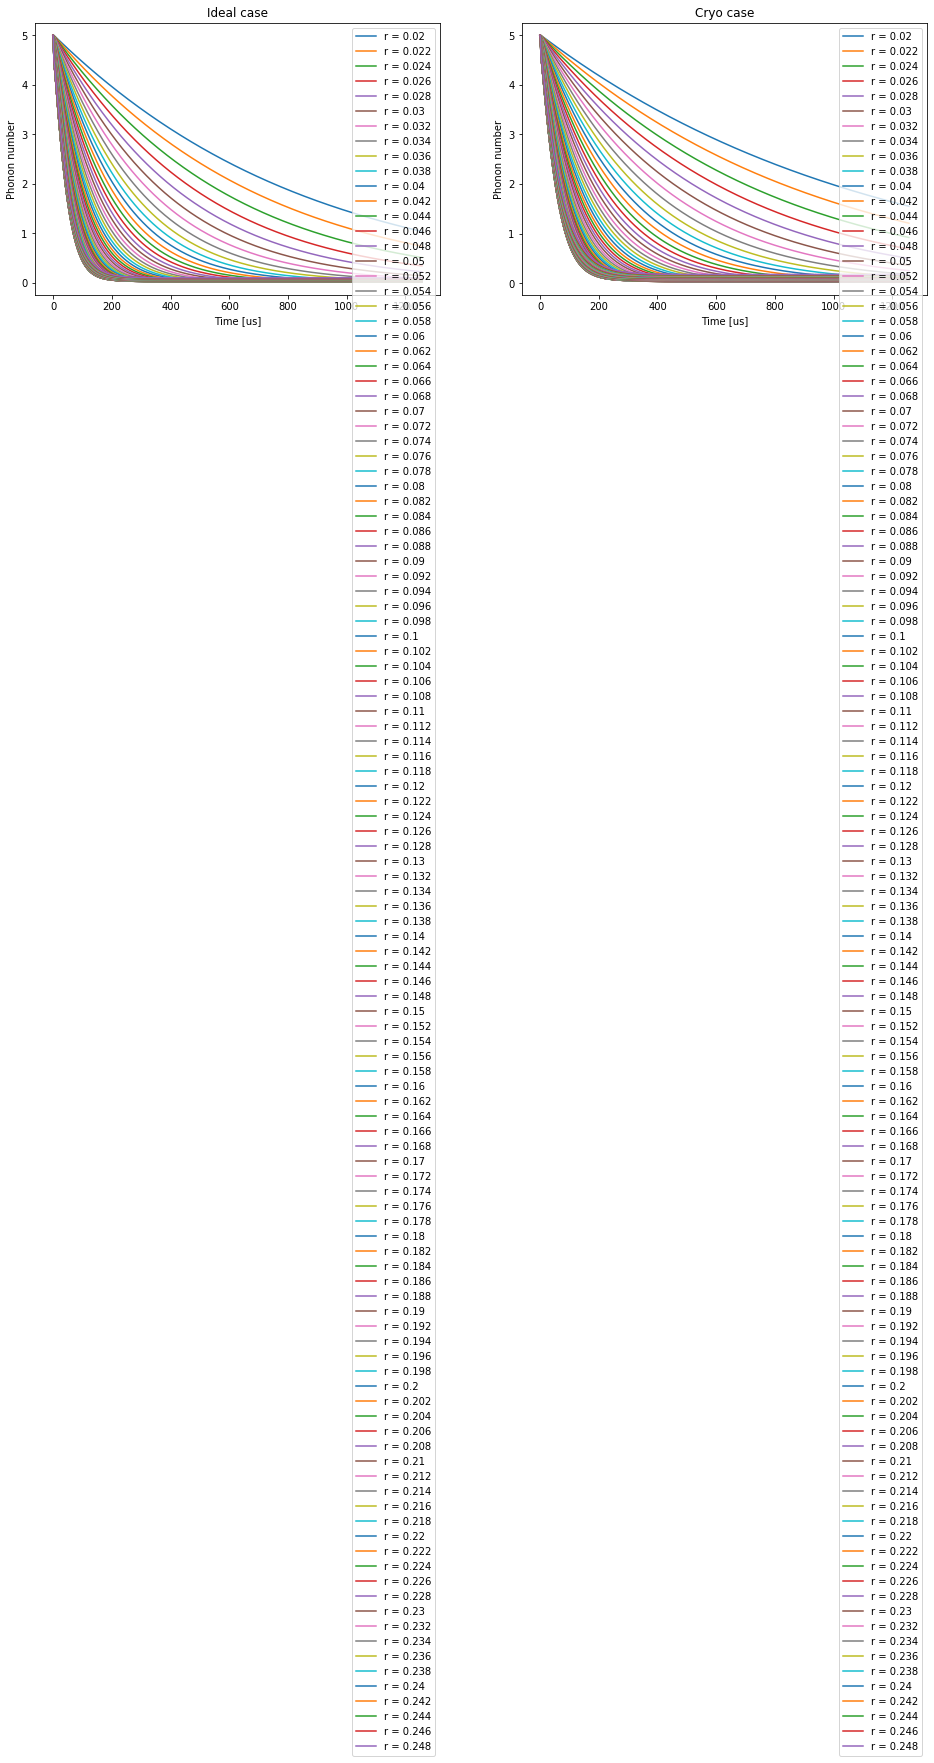

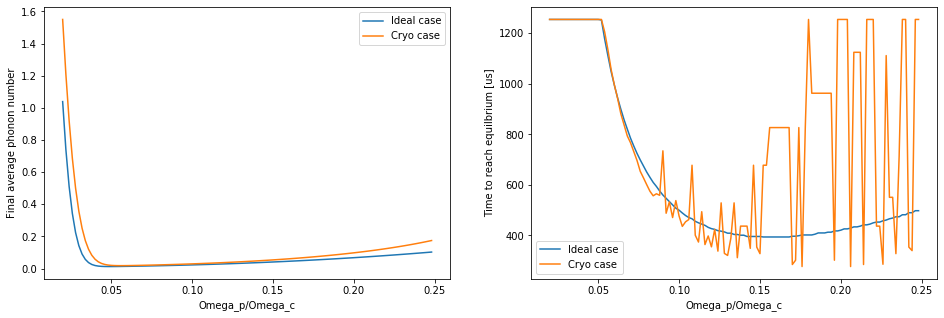

In [89]:
MaxPhonon = 10
tlist = np.arange(0,200*2*np.pi,1)
rho0 = tensor(basis(4,2),basis(MaxPhonon, 5))

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
Omega_Minus = 23

ratios = np.arange(0.02, 0.25, 0.002)
fig = plt.figure(figsize=(16,5))
finalPhononNum1 = []
finalPhononNum2 = []
equilTime1 = []
equilTime2 = []

for ratio in ratios: 
    time1 = datetime.datetime.now()
    print('ratio = '+str(round(ratio, 3)))
    OmegaPi = Omega_Plus*ratio
    Omega_Plus2 = OmegaPi/2
    Omega_Minus2 = OmegaPi/2

    Delta = 50 # pumping beam detuning
    Zeeman = 7 # Zeeman shift
    delta_dp = -Zeeman
    Delta_Minus = Delta-Zeeman
    Delta_Plus = Delta+Zeeman
    Delta_P = -Delta
    Delta0 = 0
    nu = 2.4 # mode frequency
    eta = 0.1
    eta_pi = eta*0.707
    eta_sigma = -eta

    Delta = 45.5
    output1 = DoubleEITSimulationWithIonMotion_test(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP)
    output2 = DoubleEITSimulationWithIonMotion_cryo_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta_pi, eta_sigma, delta_dp, gammaSP)
    
    finalPhononNum1.append(output1.expect[0][-1])
    finalPhononNum2.append(output2.expect[0][-1])
    equilTime1.append(EquilibriumTime(tlist, output1.expect[0], tol = 1e-6))
    equilTime2.append(EquilibriumTime(tlist, output2.expect[0], tol = 1e-6))
    
    ax = fig.add_subplot(1,2,1)
    label = 'r = '+str(round(ratio, 3))
    ax.plot(tlist, output1.expect[0],label = label)
    ax.legend()
    ax.set_title('Ideal case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    ax = fig.add_subplot(1,2,2)
    label = 'r = '+str(round(ratio, 3))
    ax.plot(tlist, output2.expect[0],label = label)
    ax.legend()
    ax.set_title('Cryo case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    time2 = datetime.datetime.now()
    print('Time used:'+str(time2-time1))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)
ax.plot(ratios, finalPhononNum1, label = 'Ideal case')
ax.plot(ratios, finalPhononNum2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Final average phonon number')

ax = fig.add_subplot(1,2,2)
ax.plot(ratios, equilTime1, label = 'Ideal case')
ax.plot(ratios, equilTime2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Time to reach equilbrium [us]')

In [ ]:
MaxPhonon = 10
tlist = np.arange(0,200*2*np.pi,1)
rho0 = tensor(basis(4,2),basis(MaxPhonon, 5))

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
Omega_Minus = 23

ratios = np.arange(0.02, 0.25, 0.002)
fig = plt.figure(figsize=(16,5))
finalPhononNum1 = []
finalPhononNum2 = []
equilTime1 = []
equilTime2 = []
output1_data = []
output2_data = []

for ratio in ratios: 
    time1 = datetime.datetime.now()
    print('ratio = '+str(round(ratio, 3)))
    OmegaPi = Omega_Plus*ratio
    Omega_Plus2 = OmegaPi/2
    Omega_Minus2 = OmegaPi/2

    Delta = 50 # pumping beam detuning
    Zeeman = 7 # Zeeman shift
    delta_dp = -Zeeman
    Delta_Minus = Delta-Zeeman
    Delta_Plus = Delta+Zeeman
    Delta_P = -Delta
    Delta0 = 0
    nu = 2.4 # mode frequency
    eta = 0.1
    eta_pi = eta*0.707
    eta_sigma = -eta

    Delta = 45.5
    output1 = DoubleEITSimulationWithIonMotion_test(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP)
    output2 = DoubleEITSimulationWithIonMotion_cryo_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta_pi, eta_sigma, delta_dp, gammaSP)
    
    output1_data.append(output1)
    output2_data.append(output2)
    
    finalPhononNum1.append(output1.expect[0][-1])
    finalPhononNum2.append(output2.expect[0][-1])
    equilTime1.append(EquilibriumTime(tlist, output1.expect[0], tol = 1e-6))
    equilTime2.append(EquilibriumTime(tlist, output2.expect[0], tol = 1e-6))
    
    ax = fig.add_subplot(1,2,1)
    label = 'r = '+str(round(ratio, 3))
    ax.plot(tlist, output1.expect[0],label = label)
    ax.legend()
    ax.set_title('Ideal case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    ax = fig.add_subplot(1,2,2)
    label = 'r = '+str(round(ratio, 3))
    ax.plot(tlist, output2.expect[0],label = label)
    ax.legend()
    ax.set_title('Cryo case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    time2 = datetime.datetime.now()
    print('Time used:'+str(time2-time1))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)
ax.plot(ratios, finalPhononNum1, label = 'Ideal case')
ax.plot(ratios, finalPhononNum2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Final average phonon number')

ax = fig.add_subplot(1,2,2)
ax.plot(ratios, equilTime1, label = 'Ideal case')
ax.plot(ratios, equilTime2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Time to reach equilbrium [us]')

## Axial direction

Temperature limit1： 0.646366
Temperature limit2： 1.086953


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


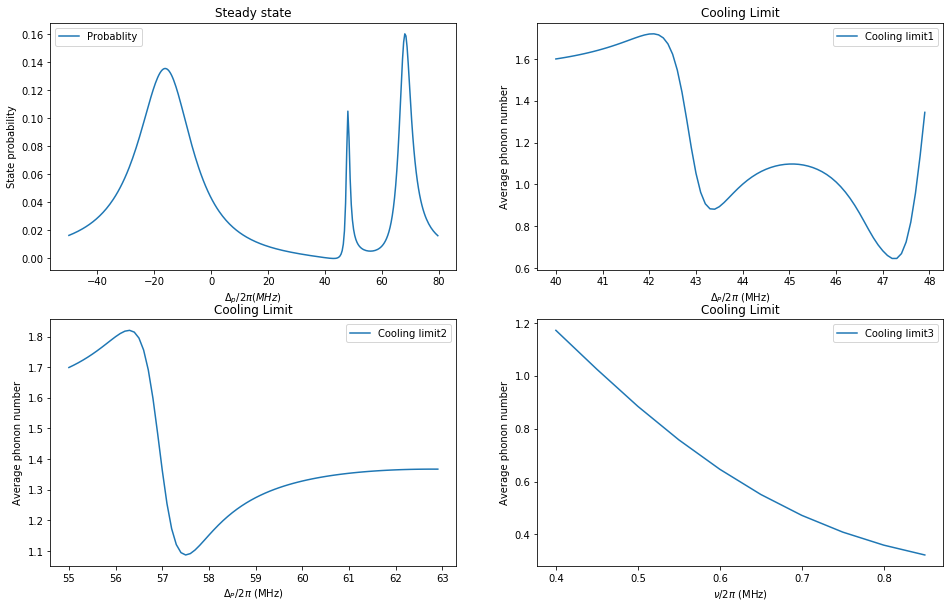

In [3]:
gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23
Delta = 50 # pumping beam detuning
Zeeman = 7 # Zeeman shift
Delta_Minus = Delta-Zeeman
Delta_Plus = Delta+Zeeman
Delta_P = -Delta
Delta0 = 0
nu = 0.6 # mode frequency
eta = 0.12

cooling_detuning_list1 = np.arange(40,48,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(55,63,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  for Delta in cooling_detuning_list2]

DeltaList = np.arange(-50,80,0.4)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] for Delta in DeltaList]

Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(0.4,0.9,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

### Reference setting

In [44]:
gammaSP = 7
Omega_Plus = 17
OmegaPi = 0.5
Omega_Minus = 17
Delta = 55
Zeeman = 5
Delta_Minus = Delta-Zeeman
Delta_Plus = Delta+Zeeman
Delta_P = -Delta
Delta0 = 0
nu = 1.5
eta = 0.1

cooling_detuning_list = np.arange(40,65,0.1)
cooling_limit_List=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP).ptrace(1)*create(4)*destroy(4)).tr()  for Delta in cooling_detuning_list]

DeltaList = np.arange(-50,80,0.4)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] for Delta in DeltaList]


fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.legend()
ax.set_xlabel('$\Delta_p (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list, cooling_limit_List, label="Cooling limit")
ax.legend()
ax.set_xlabel('$\Delta_P$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

### Analytical solution
#### One $\Lambda$ system

gamma = 7
Omega_Plus = 17
OmegaPi = 0.5
Omega_Minus = 17
nu = 3
eta = 0.1
APlus = OmegaPi**2/gamma*gamma**2*nu**2/(gamma**2*nu**2+4*(Omega_Plus**2/4-nu*(nu-Delta))**2)
AMinus = OmegaPi**2/gamma*gamma**2*nu**2/(gamma**2*nu**2+4*(Omega_Plus**2/4-nu*(nu+Delta))**2)
print('Cooling limit: %f'%(APlus/(AMinus-APlus)))

#### Scartting rate

 $$
 R_{Scatt} = \frac{\Gamma}{2} \frac{\Omega^2/2}{\delta^2+\Omega^2/2+\Gamma^2/4}
 $$

In [64]:
gammaSP = 7.
Omega_Plus = 23.
OmegaPi = 1.7
Omega_Minus = 23.
Delta = 30.
Zeeman = 7.
nu = 2.7
eta = 0.1
EITtime = 100 #us
intensityRatio = 10**-3

#Prob beam
RProb = 2*np.pi*gammaSP/2*(OmegaPi*intensityRatio)**2/2/(Delta**2+(OmegaPi*intensityRatio)**2/2+gammaSP**2/4)
print(RProb*EITtime)

#Drive beam
Delta = -2100
RDrive = 2*intensityRatio*2*np.pi*gammaSP/2* (Omega_Plus*intensityRatio)**2/2/(Delta**2+(Omega_Plus*intensityRatio)**2/2+gammaSP**2/4)
RDrive*EITtime

3.483388286185344e-06


2.6379331702639306e-10

In [62]:
Delta = 30
2*np.pi*gammaSP/2*(OmegaPi*intensityRatio)**2/2/(Delta**2+(OmegaPi*intensityRatio)**2/2+gammaSP**2/4)*10**6*100*10**-6

3.483388286185344e-06

## Calculate Isat

$$
I_{sat} = \frac{\pi h c}{3 \lambda^3 \tau}
$$

In [29]:
lam1 = 369.5*10**(-9) #Wavelength of P_{1/2} transition
lam2 = 329.0*10**(-9) #Wavelength of P_{3/2} transition
Gamma1 = 2*np.pi*19.6*10**6
Gamma2 = 2*np.pi*25.9*10**6
tau1 = 1/Gamma1
tau2 = 1/Gamma2
h = 6.626*10**(-34)
c = 2.998*10**8

Isat1 = np.pi*h*c/(3*lam1**3*tau1)
Isat2 = np.pi*h*c/(3*lam2**3*tau2)
print('Isat1 = ',Isat1, 'W/m^2')
print('Isat2 = ',Isat2, 'W/m^2')

Isat1 =  507.81355534750065 W/m^2
Isat2 =  950.6127099268763 W/m^2


In [40]:
r1 = 45/2*10**(-6) # unit: m
r2 = 88/2*10**(-6) # unit: m
Area = np.pi*r1*r2
P_EIT1 = 2.4*10**(-6) # unit: W
P_EIT2 = 3.1*10**(-6) # unit: W
I_EIT1 = P_EIT1/Area
I_EIT2 = P_EIT2/Area
print('I_EIT1 = ',I_EIT1, ' = ',I_EIT1/Isat1,'*Isat \nI_EIT2 = ',I_EIT2, ' = ',I_EIT2/Isat1, '*Isat')

I_EIT1 =  771.6603301425229  =  1.5195741074979179 *Isat 
I_EIT2 =  996.7279264340921  =  1.9627832221848107 *Isat
